In [26]:
#Importing python libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score


In [28]:
# libraries for evaluation
pd.set_option('display.max_columns', 99)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score


In [29]:
# importing time libraries
from datetime import timedelta
from datetime import datetime

# libraries for baseline algorithm
# from sklearn import svm
# from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model, tree, ensemble
from sklearn.neighbors import KNeighborsClassifier

# libraries for advanced algorithm
import xgboost
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# libraries for feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
tables = ['Orders', 'Customers', 'Products', 'Payments', 'Order Items']


In [37]:
#import the datasets from local disk, the dataset is a supply chain logistics data downloaded from Kaggle. 
train_path = '/Users/adityalodha/Desktop/Ecommerce Order Dataset/train/df_'
data_list = ['Orders', 'Customers', 'Products', 'Payments', 'OrderItems']

tr_orders = pd.read_csv(train_path + data_list[0] + '.csv')
tr_custs = pd.read_csv(train_path + data_list[1] + '.csv')
tr_prods = pd.read_csv(train_path + data_list[2] + '.csv')
tr_pays = pd.read_csv(train_path + data_list[3] + '.csv')
tr_items = pd.read_csv(train_path + data_list[4] + '.csv')


In [41]:
#Merging all the different csv files together to process data. 
train_data = [tr_orders, tr_custs, tr_prods, tr_pays, tr_items]
j = 0
print('The content of training data \n')
for i in train_data:
    print('Table', tables[j])
    print(i.info())
    print(i.head())
    print('\n')
    j+=1

The content of training data 

Table Orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       89316 non-null  object
 1   customer_id                    89316 non-null  object
 2   order_status                   89316 non-null  object
 3   order_purchase_timestamp       89316 non-null  object
 4   order_approved_at              89307 non-null  object
 5   order_delivered_timestamp      87427 non-null  object
 6   order_estimated_delivery_date  89316 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB
None
       order_id   customer_id order_status order_purchase_timestamp  \
0  Axfy13Hk4PIk  hCT0x9JiGXBQ    delivered      2017-10-22 18:57:54   
1  v6px92oS8cLG  PxA7fv9spyhx    delivered      2018-06-20 21:40:31   
2  Ulpf9skrhjfm  g3nXeJkGI0Qw    delivered      2018-02-16 

In [42]:
#Now importing test data

In [43]:
test_path = '/Users/adityalodha/Desktop/Ecommerce Order Dataset/test/df_'
data_list = ['Orders', 'Customers', 'Products', 'Payments', 'OrderItems']

ts_orders = pd.read_csv(test_path + data_list[0] + '.csv')
ts_custs = pd.read_csv(test_path + data_list[1] + '.csv')
ts_prods = pd.read_csv(test_path + data_list[2] + '.csv')
ts_pays = pd.read_csv(test_path + data_list[3] + '.csv')
ts_items = pd.read_csv(test_path + data_list[4] + '.csv')


In [44]:
#Merging all the different csv files into single test data
test_data = [ts_orders, ts_custs, ts_prods, ts_pays, ts_items]
j = 0
print('\n The content of test data')
for i in test_data:
    print('Table', tables[j])
    print(i.info())
    print(i.head())
    print('\n')
    j+=1


 The content of test data
Table Orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38279 entries, 0 to 38278
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  38279 non-null  object
 1   customer_id               38279 non-null  object
 2   order_purchase_timestamp  38279 non-null  object
 3   order_approved_at         38272 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB
None
       order_id   customer_id order_purchase_timestamp    order_approved_at
0  u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57  2017-11-18 12:46:08
1  ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12  2018-06-02 20:12:23
2  I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30  2018-01-09 07:24:03
3  bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46  2017-03-10 10:24:46
4  CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07  2017-12-05 04:13:30


Table Customers
<class 'p

In [45]:
#Checking the differences in training data and testing data. 

print(tr_orders.info())
print(ts_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       89316 non-null  object
 1   customer_id                    89316 non-null  object
 2   order_status                   89316 non-null  object
 3   order_purchase_timestamp       89316 non-null  object
 4   order_approved_at              89307 non-null  object
 5   order_delivered_timestamp      87427 non-null  object
 6   order_estimated_delivery_date  89316 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38279 entries, 0 to 38278
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  38279 non-null  object
 1   customer_id               38279 non-null 

In [46]:
# Merging data columns 
tr_prods = tr_prods.drop_duplicates() 
tr_data = tr_orders.merge(tr_custs, on="customer_id", how="left")
tr_data = tr_data.merge(tr_items, on="order_id", how="left")
tr_data = tr_data.merge(tr_pays, on="order_id", how="left")
tr_data = tr_data.merge(tr_prods, on="product_id", how="left")
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       89316 non-null  object 
 1   customer_id                    89316 non-null  object 
 2   order_status                   89316 non-null  object 
 3   order_purchase_timestamp       89316 non-null  object 
 4   order_approved_at              89307 non-null  object 
 5   order_delivered_timestamp      87427 non-null  object 
 6   order_estimated_delivery_date  89316 non-null  object 
 7   customer_zip_code_prefix       89316 non-null  int64  
 8   customer_city                  89316 non-null  object 
 9   customer_state                 89316 non-null  object 
 10  product_id                     89316 non-null  object 
 11  seller_id                      89316 non-null  object 
 12  price                          89316 non-null 

In [47]:
#dropped duplicates values in product table and performed left joins on columns to merge altogether 

In [48]:
#Performing same on test data
ts_data = ts_orders.merge(ts_custs, on="customer_id", how="left")
ts_data = ts_data.merge(ts_items, on="order_id", how="left")
ts_data = ts_data.merge(ts_pays, on="order_id", how="left")
ts_prods = ts_prods.drop_duplicates()
ts_data = ts_data.merge(ts_prods, on="product_id", how="left")
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38279 entries, 0 to 38278
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  38279 non-null  object 
 1   customer_id               38279 non-null  object 
 2   order_purchase_timestamp  38279 non-null  object 
 3   order_approved_at         38272 non-null  object 
 4   customer_zip_code_prefix  38279 non-null  int64  
 5   customer_city             38279 non-null  object 
 6   customer_state            38279 non-null  object 
 7   product_id                38279 non-null  object 
 8   seller_id                 38279 non-null  object 
 9   price                     38279 non-null  float64
 10  shipping_charges          38279 non-null  float64
 11  payment_sequential        38279 non-null  int64  
 12  payment_type              38279 non-null  object 
 13  payment_installments      38279 non-null  int64  
 14  paymen

In [49]:
#checking null values 
print('Null Values in Train Data')
print(tr_data.isna().sum())
print('\n')
print('Null Values in Test Data')
print(ts_data.isna().sum())


Null Values in Train Data
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   9
order_delivered_timestamp        1889
order_estimated_delivery_date       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_id                          0
seller_id                           0
price                               0
shipping_charges                    0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_category_name             308
product_weight_g                   15
product_length_cm                  15
product_height_cm                  15
product_width_cm                   15
dtype: int64


Null Values in Test Data
order_id                      0
customer_id                 

In [50]:
tr_data.head()


order_id   customer_id order_status order_purchase_timestamp  \
0  Axfy13Hk4PIk  hCT0x9JiGXBQ    delivered      2017-10-22 18:57:54   
1  v6px92oS8cLG  PxA7fv9spyhx    delivered      2018-06-20 21:40:31   
2  Ulpf9skrhjfm  g3nXeJkGI0Qw    delivered      2018-02-16 16:19:31   
3  bwJVWupf2keN  EOEsCQ6QlpIg    delivered      2018-08-18 18:04:29   
4  Dd0QnrMk9Cj5  mVz5LO2Vd6cL    delivered      2017-12-22 16:44:04   

     order_approved_at order_delivered_timestamp  \
0  2017-10-22 19:14:13       2017-10-26 22:19:52   
1  2018-06-20 22:20:20       2018-07-03 22:51:22   
2  2018-02-17 16:15:35       2018-02-27 01:29:50   
3  2018-08-18 18:15:16       2018-08-27 20:03:51   
4  2017-12-22 17:31:31       2018-01-05 19:22:49   

  order_estimated_delivery_date  customer_zip_code_prefix       customer_city  \
0                    2017-11-09                     58125     varzea paulista   
1                    2018-07-24                      3112  armacao dos buzios   
2                    2018-03-08                      4119             jandira   
3                    2018-09-19                     18212          uberlandia   
4                    2018-01-18                     88868            ilhabela   

  customer_state    product_id     seller_id   price  shipping_charges  \
0             SP  90K0C1fIyQUf  ZWM05J9LcBSF  223.51             84.65   
1             RJ  qejhpMGGVcsl  IjlpYfhUbRQs  170.80             23.79   
2             SP  qUS5d2pEAyxJ  77p2EYxcM9MD   64.40             17.38   
3             MG  639iGvMyv0De  jWzS0ayv9TGf  264.50             30.72   
4             SP  1lycYGcsic2F  l1pYW6GBnPMr  779.90             30.66   

   payment_sequential payment_type  payment_installments  payment_value  \
0                   1  credit_card                     1         259.14   
1                   1  credit_card                     8         382.39   
2                   1  credit_card                     4         249.25   
3                   1  credit_card                     2          27.79   
4                   1  credit_card                     1          76.15   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys             491.0               19.0   
1             watches_gifts             440.0               18.0   
2  costruction_tools_garden            2200.0               16.0   
3                      toys            1450.0               68.0   
4                      toys             300.0               17.0   

   product_height_cm  product_width_cm  
0               12.0              16.0  
1               14.0              17.0  
2               16.0              16.0  
3                3.0              48.0  
4                4.0              12.0

In [51]:
tr_data = tr_data[tr_data.order_status == 'delivered']
tr_data


order_id   customer_id order_status order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ    delivered      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx    delivered      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw    delivered      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg    delivered      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL    delivered      2017-12-22 16:44:04   
...             ...           ...          ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY    delivered      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g    delivered      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv    delivered      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq    delivered      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs    delivered      2018-06-09 21:46:58   

         order_approved_at order_delivered_timestamp  \
0      2017-10-22 19:14:13       2017-10-26 22:19:52   
1      2018-06-20 22:20:20       2018-07-03 22:51:22   
2      2018-02-17 16:15:35       2018-02-27 01:29:50   
3      2018-08-18 18:15:16       2018-08-27 20:03:51   
4      2017-12-22 17:31:31       2018-01-05 19:22:49   
...                    ...                       ...   
89311  2018-08-21 04:35:30       2018-08-30 14:47:46   
89312  2017-12-16 02:37:32       2017-12-20 19:23:40   
89313  2018-07-24 11:20:39       2018-07-27 01:41:40   
89314  2018-08-11 08:24:40       2018-08-14 21:43:51   
89315  2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06

In [52]:
#removing duplicates and merging
tr_prods = tr_prods.drop_duplicates() 
tr_data = tr_orders.merge(tr_custs, on="customer_id", how="left")
tr_data = tr_data.merge(tr_items, on="order_id", how="left")
tr_data = tr_data.merge(tr_pays, on="order_id", how="left")
tr_data = tr_data.merge(tr_prods, on="product_id", how="left")
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       89316 non-null  object 
 1   customer_id                    89316 non-null  object 
 2   order_status                   89316 non-null  object 
 3   order_purchase_timestamp       89316 non-null  object 
 4   order_approved_at              89307 non-null  object 
 5   order_delivered_timestamp      87427 non-null  object 
 6   order_estimated_delivery_date  89316 non-null  object 
 7   customer_zip_code_prefix       89316 non-null  int64  
 8   customer_city                  89316 non-null  object 
 9   customer_state                 89316 non-null  object 
 10  product_id                     89316 non-null  object 
 11  seller_id                      89316 non-null  object 
 12  price                          89316 non-null 

In [53]:
# Converting object datatype of order date and shipping date features to datetime type
tr_data[["order_purchase_timestamp", "order_approved_at", "order_delivered_timestamp", "order_estimated_delivery_date"]] = tr_data[["order_purchase_timestamp", "order_approved_at", "order_delivered_timestamp", "order_estimated_delivery_date"]].apply(pd.to_datetime)
ts_data[["order_purchase_timestamp", "order_approved_at"]] = ts_data[["order_purchase_timestamp", "order_approved_at"]].apply(pd.to_datetime)

print('Training Data Info\n')
print(tr_data.info())
print('Null Info in Training Data')
print(tr_data.isna().sum())
print('\nTesting Data')
print(ts_data.info())
print('Null Info in Testing Data')
print(ts_data.isna().sum())

Training Data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       89316 non-null  object        
 1   customer_id                    89316 non-null  object        
 2   order_status                   89316 non-null  object        
 3   order_purchase_timestamp       89316 non-null  datetime64[ns]
 4   order_approved_at              89307 non-null  datetime64[ns]
 5   order_delivered_timestamp      87427 non-null  datetime64[ns]
 6   order_estimated_delivery_date  89316 non-null  datetime64[ns]
 7   customer_zip_code_prefix       89316 non-null  int64         
 8   customer_city                  89316 non-null  object        
 9   customer_state                 89316 non-null  object        
 10  product_id                     89316 non-null  object        


In [54]:
#Let's assume that the null values in approved_at in the testing data will result in delays
ts_data['order_approved_at'] = ts_data['order_approved_at'].fillna(ts_data['order_purchase_timestamp'] + timedelta(days=25))

In [55]:
#Dropping status column as it just "Delievered", as we already know the goods are delievered 
tr_data = tr_data.drop(['order_status'], axis=1)
tr_data


order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [56]:
#Checking with null values
tr_data.isna().sum()


order_id                            0
customer_id                         0
order_purchase_timestamp            0
order_approved_at                   9
order_delivered_timestamp        1889
order_estimated_delivery_date       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_id                          0
seller_id                           0
price                               0
shipping_charges                    0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_category_name             308
product_weight_g                   15
product_length_cm                  15
product_height_cm                  15
product_width_cm                   15
dtype: int64

In [57]:
#Late delivery is if the order_delivered_timestamp feature is greater than the order_estimated_delivery_date feature
tr_data.select_dtypes(include=["datetime64"]).columns


Index(['order_purchase_timestamp', 'order_approved_at',
       'order_delivered_timestamp', 'order_estimated_delivery_date'],
      dtype='object')

In [58]:
tr_data = tr_data.dropna(subset=['order_approved_at', 'order_delivered_timestamp'])


In [59]:
tr_data.isna().sum()


order_id                           0
customer_id                        0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_timestamp          0
order_estimated_delivery_date      0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
product_id                         0
seller_id                          0
price                              0
shipping_charges                   0
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
product_category_name            289
product_weight_g                  15
product_length_cm                 15
product_height_cm                 15
product_width_cm                  15
dtype: int64

In [60]:
#Creating column "is_late_s" which has calculations based on order_delievered_timestamp and order_estimated_delievery_data 
tr_data['is_late_s'] = (tr_data['order_delivered_timestamp'] > tr_data['order_estimated_delivery_date']).astype(int)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [61]:
tr_data.isna().sum()


order_id                           0
customer_id                        0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_timestamp          0
order_estimated_delivery_date      0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
product_id                         0
seller_id                          0
price                              0
shipping_charges                   0
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
product_category_name            289
product_weight_g                  15
product_length_cm                 15
product_height_cm                 15
product_width_cm                  15
is_late_s                          0
dtype: int64

In [62]:
#checking is_late count



In [63]:
tr_data['is_late_s'].value_counts()



is_late_s
0    80680
1     6738
Name: count, dtype: int64

In [64]:
#there are 6738 late delieveries

In [65]:
#Adding product volumn column to analyze better 
tr_data['prod_vol'] = tr_data['product_length_cm'] * tr_data['product_height_cm'] * tr_data['product_width_cm']
tr_data.head()

order_id   customer_id order_purchase_timestamp   order_approved_at  \
0  Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54 2017-10-22 19:14:13   
1  v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31 2018-06-20 22:20:20   
2  Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31 2018-02-17 16:15:35   
3  bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29 2018-08-18 18:15:16   
4  Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04 2017-12-22 17:31:31   

  order_delivered_timestamp order_estimated_delivery_date  \
0       2017-10-26 22:19:52                    2017-11-09   
1       2018-07-03 22:51:22                    2018-07-24   
2       2018-02-27 01:29:50                    2018-03-08   
3       2018-08-27 20:03:51                    2018-09-19   
4       2018-01-05 19:22:49                    2018-01-18   

   customer_zip_code_prefix       customer_city customer_state    product_id  \
0                     58125     varzea paulista             SP  90K0C1fIyQUf   
1                      3112  armacao dos buzios             RJ  qejhpMGGVcsl   
2                      4119             jandira             SP  qUS5d2pEAyxJ   
3                     18212          uberlandia             MG  639iGvMyv0De   
4                     88868            ilhabela             SP  1lycYGcsic2F   

      seller_id   price  shipping_charges  payment_sequential payment_type  \
0  ZWM05J9LcBSF  223.51             84.65                   1  credit_card   
1  IjlpYfhUbRQs  170.80             23.79                   1  credit_card   
2  77p2EYxcM9MD   64.40             17.38                   1  credit_card   
3  jWzS0ayv9TGf  264.50             30.72                   1  credit_card   
4  l1pYW6GBnPMr  779.90             30.66                   1  credit_card   

   payment_installments  payment_value     product_category_name  \
0                     1         259.14                      toys   
1                     8         382.39             watches_gifts   
2                     4         249.25  costruction_tools_garden   
3                     2          27.79                      toys   
4                     1          76.15                      toys   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             491.0               19.0               12.0              16.0   
1             440.0               18.0               14.0              17.0   
2            2200.0               16.0               16.0              16.0   
3            1450.0               68.0                3.0              48.0   
4             300.0               17.0                4.0              12.0   

   is_late_s  prod_vol  
0          0    3648.0  
1          0    4284.0  
2          0    4096.0  
3          0    9792.0  
4          0     816.0

In [66]:
ts_data['prod_vol'] = ts_data['product_length_cm'] * ts_data['product_height_cm'] * ts_data['product_width_cm']
ts_data.head()


order_id   customer_id order_purchase_timestamp   order_approved_at  \
0  u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57 2017-11-18 12:46:08   
1  ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12 2018-06-02 20:12:23   
2  I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30 2018-01-09 07:24:03   
3  bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46 2017-03-10 10:24:46   
4  CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07 2017-12-05 04:13:30   

   customer_zip_code_prefix        customer_city customer_state    product_id  \
0                      6020              goiania             GO  1slxdgbgWFax   
1                     23020               viamao             RS  77PgsiElQLeB   
2                     75094             campinas             SP  QVlD26X1y7NI   
3                     89284  santana de parnaiba             SP  yWlFGkKYfrpa   
4                     39810             aripuana             MT  h6MCbrwh5kiC   

      seller_id    price  shipping_charges  payment_sequential payment_type  \
0  3jwvL6ihC45G    24.10             20.90                   1  credit_card   
1  GlLj704QXlDB    42.89             12.28                   1  credit_card   
2  V3iKL8r9W9NR    50.21             67.11                   1       wallet   
3  RNBdBKsXebna    89.10             62.05                   1  credit_card   
4  5Ja2lH0N2OZt  2139.99              9.41                   1       wallet   

   payment_installments  payment_value product_category_name  \
0                     2         155.77                  toys   
1                     1           4.07           electronics   
2                     1         381.59       furniture_decor   
3                     3          14.76                  toys   
4                     1         284.09                  toys   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0              50.0               16.0                5.0              11.0   
1             200.0               21.0                7.0              14.0   
2            1000.0              100.0                5.0              20.0   
3            8950.0               40.0               30.0              40.0   
4            2301.0               32.0               35.0              34.0   

   prod_vol  
0     880.0  
1    2058.0  
2   10000.0  
3   48000.0  
4   38080.0

In [67]:
ts_data.shape


(38279, 21)

In [68]:
#Categorizing the product volumes into 3 main categories 
tr_data['prod_vol'].describe()


count     87403.000000
mean      15179.770397
std       23140.434576
min         168.000000
25%        2856.000000
50%        6555.000000
75%       18375.000000
max      294000.000000
Name: prod_vol, dtype: float64

In [69]:
sectil = tr_data['prod_vol'].quantile([0.25]).values[0]
thirtil = tr_data['prod_vol'].quantile([0.75]).values[0]
tr_data['vol_category'] = tr_data['prod_vol'].apply(lambda x:'large' if x>=thirtil else ('medium' if x>=sectil and x<thirtil else 'small'))
tr_data.head()

order_id   customer_id order_purchase_timestamp   order_approved_at  \
0  Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54 2017-10-22 19:14:13   
1  v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31 2018-06-20 22:20:20   
2  Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31 2018-02-17 16:15:35   
3  bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29 2018-08-18 18:15:16   
4  Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04 2017-12-22 17:31:31   

  order_delivered_timestamp order_estimated_delivery_date  \
0       2017-10-26 22:19:52                    2017-11-09   
1       2018-07-03 22:51:22                    2018-07-24   
2       2018-02-27 01:29:50                    2018-03-08   
3       2018-08-27 20:03:51                    2018-09-19   
4       2018-01-05 19:22:49                    2018-01-18   

   customer_zip_code_prefix       customer_city customer_state    product_id  \
0                     58125     varzea paulista             SP  90K0C1fIyQUf   
1                      3112  armacao dos buzios             RJ  qejhpMGGVcsl   
2                      4119             jandira             SP  qUS5d2pEAyxJ   
3                     18212          uberlandia             MG  639iGvMyv0De   
4                     88868            ilhabela             SP  1lycYGcsic2F   

      seller_id   price  shipping_charges  payment_sequential payment_type  \
0  ZWM05J9LcBSF  223.51             84.65                   1  credit_card   
1  IjlpYfhUbRQs  170.80             23.79                   1  credit_card   
2  77p2EYxcM9MD   64.40             17.38                   1  credit_card   
3  jWzS0ayv9TGf  264.50             30.72                   1  credit_card   
4  l1pYW6GBnPMr  779.90             30.66                   1  credit_card   

   payment_installments  payment_value     product_category_name  \
0                     1         259.14                      toys   
1                     8         382.39             watches_gifts   
2                     4         249.25  costruction_tools_garden   
3                     2          27.79                      toys   
4                     1          76.15                      toys   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             491.0               19.0               12.0              16.0   
1             440.0               18.0               14.0              17.0   
2            2200.0               16.0               16.0              16.0   
3            1450.0               68.0                3.0              48.0   
4             300.0               17.0                4.0              12.0   

   is_late_s  prod_vol vol_category  
0          0    3648.0       medium  
1          0    4284.0       medium  
2          0    4096.0       medium  
3          0    9792.0       medium  
4          0     816.0        small

In [70]:
ts_data['vol_category'] = ts_data['prod_vol'].apply(lambda x:'large' if x>=thirtil else ('medium' if x>=sectil and x<thirtil else 'small'))
ts_data.head()

order_id   customer_id order_purchase_timestamp   order_approved_at  \
0  u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57 2017-11-18 12:46:08   
1  ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12 2018-06-02 20:12:23   
2  I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30 2018-01-09 07:24:03   
3  bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46 2017-03-10 10:24:46   
4  CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07 2017-12-05 04:13:30   

   customer_zip_code_prefix        customer_city customer_state    product_id  \
0                      6020              goiania             GO  1slxdgbgWFax   
1                     23020               viamao             RS  77PgsiElQLeB   
2                     75094             campinas             SP  QVlD26X1y7NI   
3                     89284  santana de parnaiba             SP  yWlFGkKYfrpa   
4                     39810             aripuana             MT  h6MCbrwh5kiC   

      seller_id    price  shipping_charges  payment_sequential payment_type  \
0  3jwvL6ihC45G    24.10             20.90                   1  credit_card   
1  GlLj704QXlDB    42.89             12.28                   1  credit_card   
2  V3iKL8r9W9NR    50.21             67.11                   1       wallet   
3  RNBdBKsXebna    89.10             62.05                   1  credit_card   
4  5Ja2lH0N2OZt  2139.99              9.41                   1       wallet   

   payment_installments  payment_value product_category_name  \
0                     2         155.77                  toys   
1                     1           4.07           electronics   
2                     1         381.59       furniture_decor   
3                     3          14.76                  toys   
4                     1         284.09                  toys   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0              50.0               16.0                5.0              11.0   
1             200.0               21.0                7.0              14.0   
2            1000.0              100.0                5.0              20.0   
3            8950.0               40.0               30.0              40.0   
4            2301.0               32.0               35.0              34.0   

   prod_vol vol_category  
0     880.0        small  
1    2058.0        small  
2   10000.0       medium  
3   48000.0        large  
4   38080.0        large

<Axes: xlabel='vol_category', ylabel='count'>

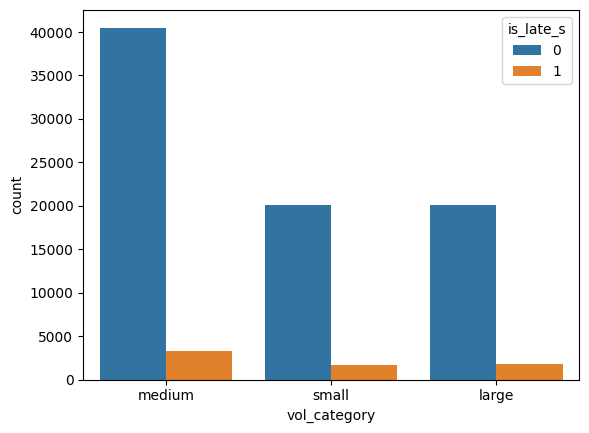

In [71]:
#Ploting bar graph based on late deliveries and volume of product 
sns.countplot(x=tr_data['vol_category'], hue=tr_data['is_late_s'])



In [72]:
vol_late = tr_data[tr_data.is_late_s == 1]['vol_category'].value_counts().rename_axis('vol_category').reset_index(name='late_counts')
vol_all = tr_data['vol_category'].value_counts().rename_axis('vol_category').reset_index(name='all_counts')
vol_late['all_count'] = vol_late.vol_category.map(vol_all.set_index('vol_category')['all_counts'])
vol_late['late_prop'] = vol_late['late_counts'] / vol_late['all_count']
vol_list = vol_late['vol_category'].to_list()
vol_late


vol_category  late_counts  all_count  late_prop
0       medium         3264      43771   0.074570
1        large         1815      21864   0.083013
2        small         1659      21783   0.076160

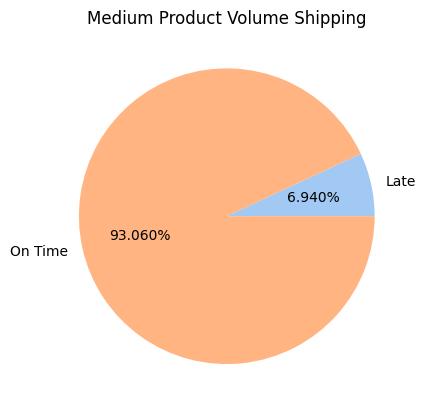

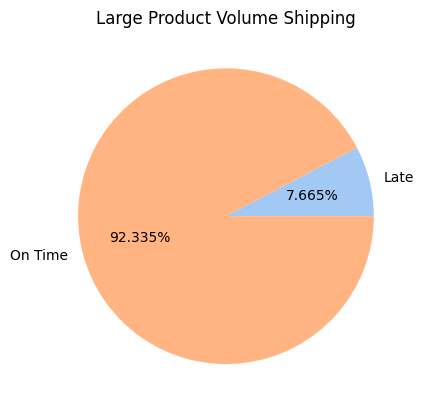

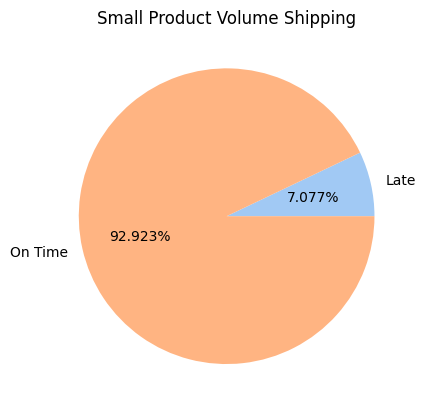

In [74]:
for i in range(0, len(vol_late)):
    data = [vol_late['late_counts'][i], vol_late['all_count'][i]]
    labels = ['Late', 'On Time']
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:5]
    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.3f%%')
    plt.title(vol_late['vol_category'][i].title() + ' Product Volume Shipping')
    plt.show()

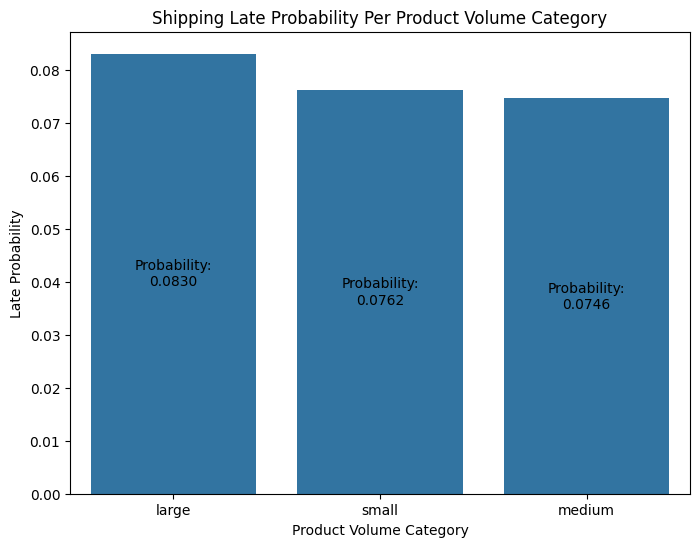

In [75]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(x='vol_category', y='late_prop', data=vol_late, capsize=0.2, ax=ax, order=vol_late.sort_values(by='late_prop', ascending=False).vol_category).set(title='Shipping Late Probability Per Product Volume Category')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Probability:\n%.4f', label_type='center')

ax.set(xlabel='Product Volume Category')
ax.set(ylabel='Late Probability')
plt.show()

In [76]:
#User Defined function which calculates the proportion of late transactions for each vol_category in the tr_data DataFrame.
def propVolLate(data):
    if(data in vol_list):
        return vol_late[vol_late.vol_category == data]['late_prop'].values[0]
    else:
        return 0

tr_data['vol_late_prop'] = tr_data['vol_category'].apply(propVolLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [77]:
ts_data['vol_late_prop'] = ts_data['vol_category'].apply(propVolLate)
ts_data


order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [78]:
#Calc the day of week to perform detail analysis on late delieveries 
tr_data['purchase_day_of_week'] = tr_data['order_purchase_timestamp'].dt.dayofweek
tr_data['approved_day_of_week'] = tr_data['order_approved_at'].dt.dayofweek
tr_data.head()

order_id   customer_id order_purchase_timestamp   order_approved_at  \
0  Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54 2017-10-22 19:14:13   
1  v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31 2018-06-20 22:20:20   
2  Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31 2018-02-17 16:15:35   
3  bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29 2018-08-18 18:15:16   
4  Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04 2017-12-22 17:31:31   

  order_delivered_timestamp order_estimated_delivery_date  \
0       2017-10-26 22:19:52                    2017-11-09   
1       2018-07-03 22:51:22                    2018-07-24   
2       2018-02-27 01:29:50                    2018-03-08   
3       2018-08-27 20:03:51                    2018-09-19   
4       2018-01-05 19:22:49                    2018-01-18   

   customer_zip_code_prefix       customer_city customer_state    product_id  \
0                     58125     varzea paulista             SP  90K0C1fIyQUf   
1                      3112  armacao dos buzios             RJ  qejhpMGGVcsl   
2                      4119             jandira             SP  qUS5d2pEAyxJ   
3                     18212          uberlandia             MG  639iGvMyv0De   
4                     88868            ilhabela             SP  1lycYGcsic2F   

      seller_id   price  shipping_charges  payment_sequential payment_type  \
0  ZWM05J9LcBSF  223.51             84.65                   1  credit_card   
1  IjlpYfhUbRQs  170.80             23.79                   1  credit_card   
2  77p2EYxcM9MD   64.40             17.38                   1  credit_card   
3  jWzS0ayv9TGf  264.50             30.72                   1  credit_card   
4  l1pYW6GBnPMr  779.90             30.66                   1  credit_card   

   payment_installments  payment_value     product_category_name  \
0                     1         259.14                      toys   
1                     8         382.39             watches_gifts   
2                     4         249.25  costruction_tools_garden   
3                     2          27.79                      toys   
4                     1          76.15                      toys   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             491.0               19.0               12.0              16.0   
1             440.0               18.0               14.0              17.0   
2            2200.0               16.0               16.0              16.0   
3            1450.0               68.0                3.0              48.0   
4             300.0               17.0                4.0              12.0   

   is_late_s  prod_vol vol_category  vol_late_prop  purchase_day_of_week  \
0          0    3648.0       medium        0.07457                     6   
1          0    4284.0       medium        0.07457                     2   
2          0    4096.0       medium        0.07457                     4   
3          0    9792.0       medium        0.07457                     5   
4          0     816.0        small        0.07616                     4   

   approved_day_of_week  
0                     6  
1                     2  
2                     5  
3                     5  
4                     4

In [79]:
ts_data['purchase_day_of_week'] = ts_data['order_purchase_timestamp'].dt.dayofweek
ts_data['approved_day_of_week'] = ts_data['order_approved_at'].dt.dayofweek
ts_data.head()

order_id   customer_id order_purchase_timestamp   order_approved_at  \
0  u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57 2017-11-18 12:46:08   
1  ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12 2018-06-02 20:12:23   
2  I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30 2018-01-09 07:24:03   
3  bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46 2017-03-10 10:24:46   
4  CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07 2017-12-05 04:13:30   

   customer_zip_code_prefix        customer_city customer_state    product_id  \
0                      6020              goiania             GO  1slxdgbgWFax   
1                     23020               viamao             RS  77PgsiElQLeB   
2                     75094             campinas             SP  QVlD26X1y7NI   
3                     89284  santana de parnaiba             SP  yWlFGkKYfrpa   
4                     39810             aripuana             MT  h6MCbrwh5kiC   

      seller_id    price  shipping_charges  payment_sequential payment_type  \
0  3jwvL6ihC45G    24.10             20.90                   1  credit_card   
1  GlLj704QXlDB    42.89             12.28                   1  credit_card   
2  V3iKL8r9W9NR    50.21             67.11                   1       wallet   
3  RNBdBKsXebna    89.10             62.05                   1  credit_card   
4  5Ja2lH0N2OZt  2139.99              9.41                   1       wallet   

   payment_installments  payment_value product_category_name  \
0                     2         155.77                  toys   
1                     1           4.07           electronics   
2                     1         381.59       furniture_decor   
3                     3          14.76                  toys   
4                     1         284.09                  toys   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0              50.0               16.0                5.0              11.0   
1             200.0               21.0                7.0              14.0   
2            1000.0              100.0                5.0              20.0   
3            8950.0               40.0               30.0              40.0   
4            2301.0               32.0               35.0              34.0   

   prod_vol vol_category  vol_late_prop  purchase_day_of_week  \
0     880.0        small       0.076160                     5   
1    2058.0        small       0.076160                     5   
2   10000.0       medium       0.074570                     0   
3   48000.0        large       0.083013                     4   
4   38080.0        large       0.083013                     5   

   approved_day_of_week  
0                     5  
1                     5  
2                     1  
3                     4  
4                     1

<Axes: xlabel='purchase_day_of_week', ylabel='count'>

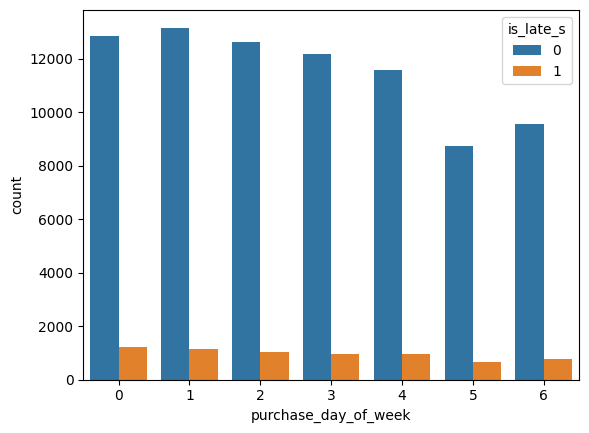

In [80]:
sns.countplot(x=tr_data['purchase_day_of_week'], hue=tr_data['is_late_s'])


In [81]:
pur_late = tr_data[tr_data.is_late_s == 1]['purchase_day_of_week'].value_counts().rename_axis('purchase_day_of_week').reset_index(name='late_counts')
pur_all = tr_data['purchase_day_of_week'].value_counts().rename_axis('purchase_day_of_week').reset_index(name='all_counts')
pur_late['all_count'] = pur_late.purchase_day_of_week.map(pur_all.set_index('purchase_day_of_week')['all_counts'])
pur_late['late_prop'] = pur_late['late_counts'] / pur_late['all_count']
pur_late['day_of_week'] = pur_late['purchase_day_of_week'].map({0: 'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
pur_list = pur_late['purchase_day_of_week'].to_list()
pur_late

purchase_day_of_week  late_counts  all_count  late_prop day_of_week
0                     0         1226      14087   0.087031      Monday
1                     1         1137      14300   0.079510     Tuesday
2                     2         1017      13629   0.074620   Wednesday
3                     3          973      13159   0.073942    Thursday
4                     4          957      12516   0.076462      Friday
5                     6          779      10339   0.075346      Sunday
6                     5          649       9388   0.069131    Saturday

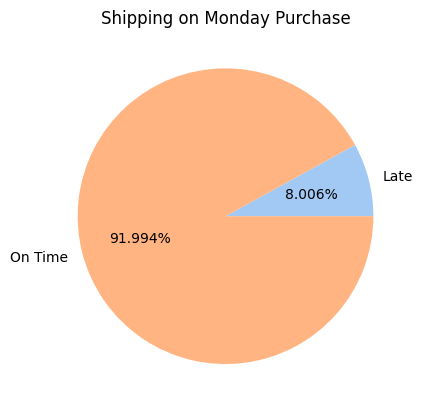

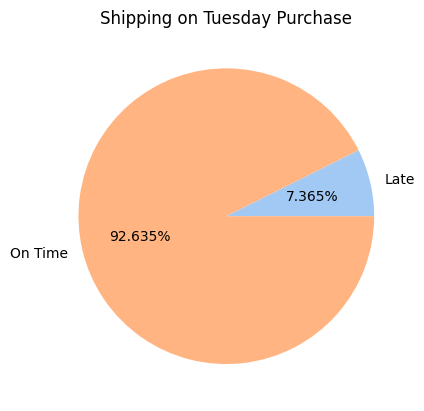

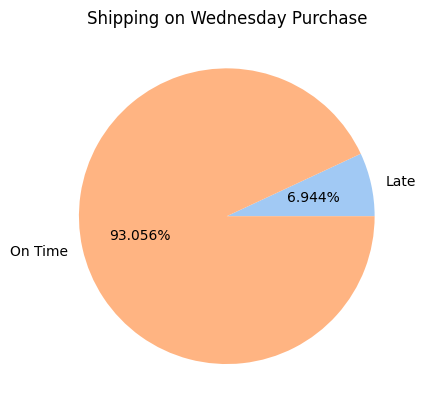

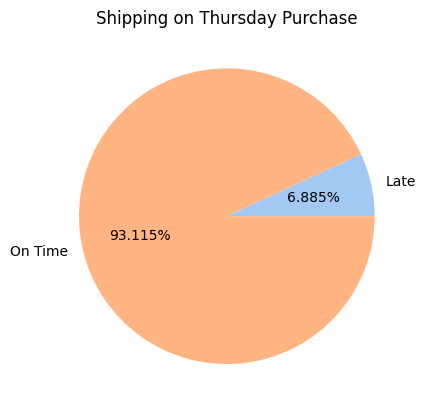

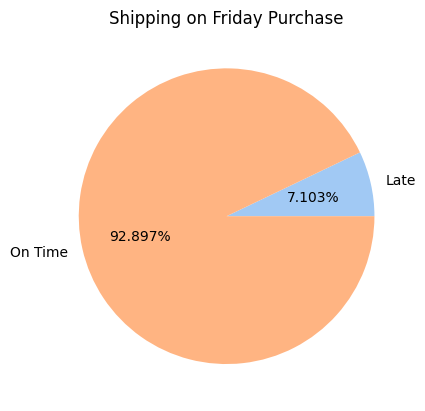

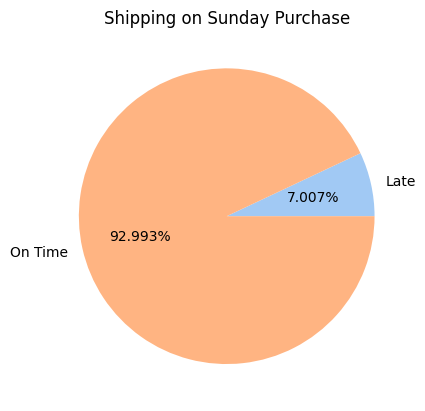

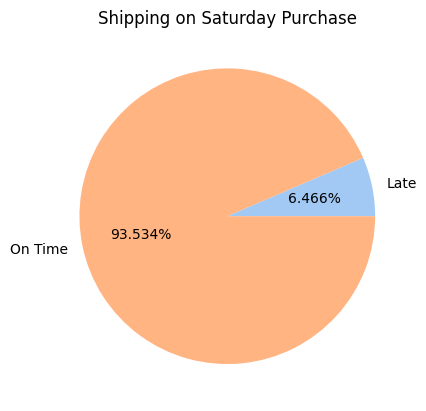

In [83]:
for i in range(0, len(pur_late)):
    data = [pur_late['late_counts'][i], pur_late['all_count'][i]]
    labels = ['Late', 'On Time']
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:5]
    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.3f%%')
    plt.title('Shipping on '+pur_late['day_of_week'][i].title()+' ' + 'Purchase')
    plt.show()
    

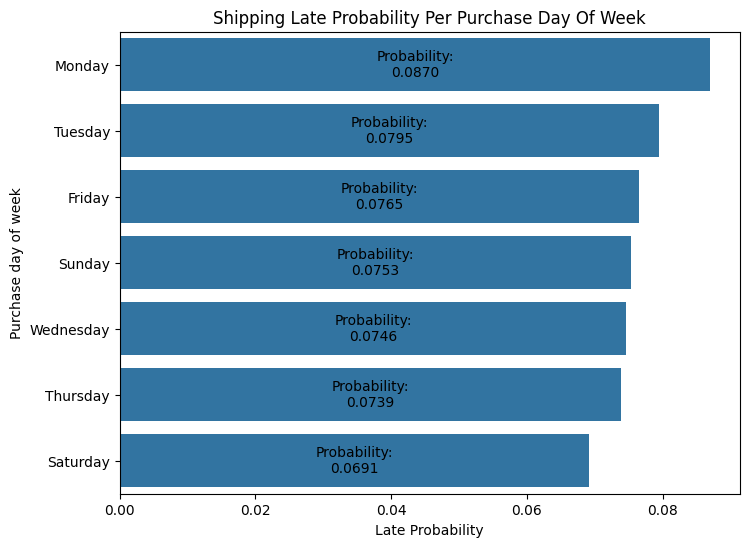

In [84]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(y='day_of_week', x='late_prop', data=pur_late, capsize=0.2, ax=ax, order=pur_late.sort_values(by='late_prop', ascending=False).day_of_week).set(title='Shipping Late Probability Per Purchase Day Of Week')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Probability:\n%.4f', label_type='center')

ax.set(ylabel='Purchase day of week')
ax.set(xlabel='Late Probability')
plt.show()

In [85]:
#it appears that the highest probability of data delays occurs on Monday purchases, the lowest on Saturday purchases

def propPurLate(data):
    if(data in pur_list):
        return pur_late[pur_late.purchase_day_of_week == data]['late_prop'].values[0]
    else:
        return 0

tr_data['pur_late_prop'] = tr_data['purchase_day_of_week'].apply(propPurLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [86]:
ts_data['pur_late_prop'] = ts_data['purchase_day_of_week'].apply(propPurLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [87]:
app_late = tr_data[tr_data.is_late_s == 1]['approved_day_of_week'].value_counts().rename_axis('approved_day_of_week').reset_index(name='late_counts')
app_all = tr_data['approved_day_of_week'].value_counts().rename_axis('approved_day_of_week').reset_index(name='all_counts')
app_late['all_count'] = app_late.approved_day_of_week.map(app_all.set_index('approved_day_of_week')['all_counts'])
app_late['late_prop'] = app_late['late_counts'] / app_late['all_count']
app_late['day_of_week'] = app_late['approved_day_of_week'].map({0: 'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
app_list = app_late['approved_day_of_week'].to_list()
app_late

approved_day_of_week  late_counts  all_count  late_prop day_of_week
0                     1         1314      16914   0.077687     Tuesday
1                     2         1090      13775   0.079129   Wednesday
2                     4         1079      13041   0.082739      Friday
3                     0          965      11345   0.085059      Monday
4                     3          951      13795   0.068938    Thursday
5                     5          778      10769   0.072244    Saturday
6                     6          561       7779   0.072117      Sunday

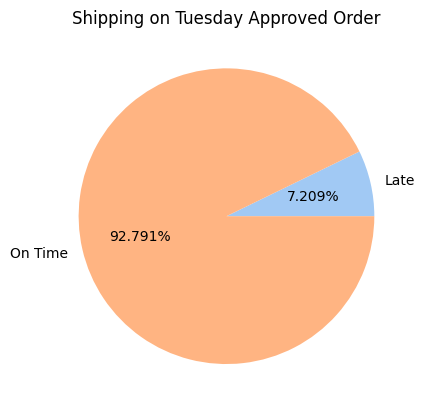

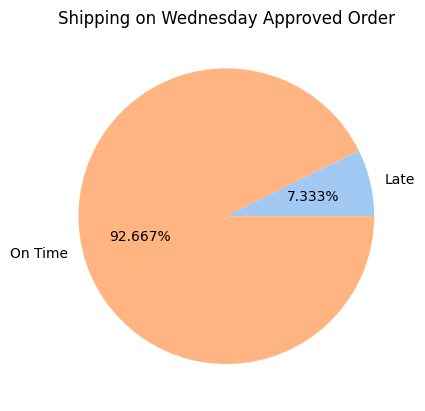

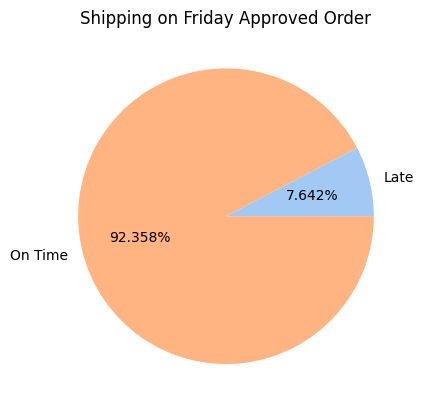

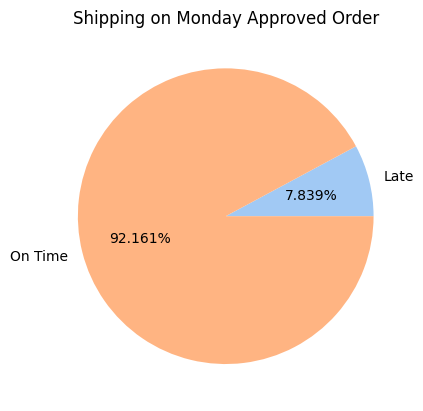

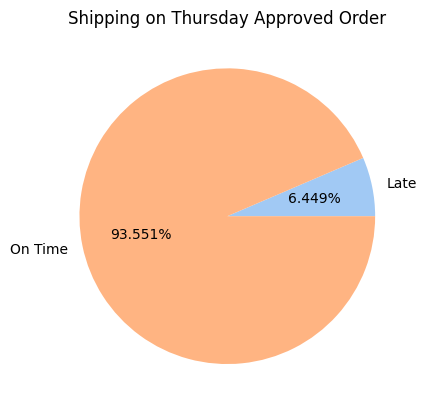

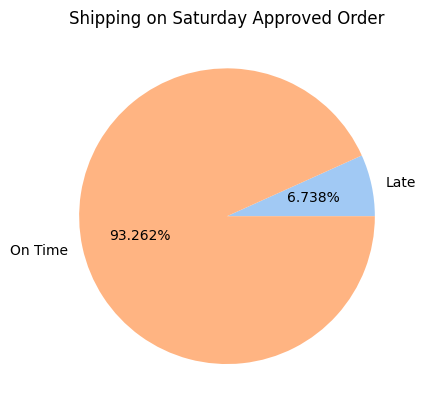

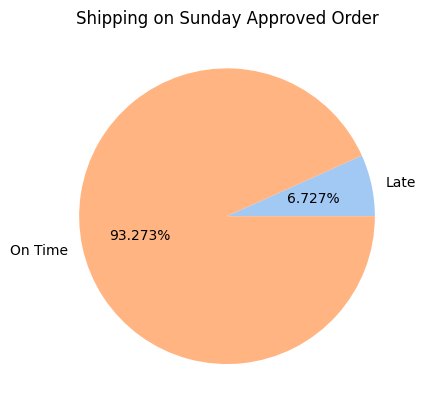

In [88]:
for i in range(0, len(app_late)):
    data = [app_late['late_counts'][i], app_late['all_count'][i]]
    labels = ['Late', 'On Time']
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:5]
    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.3f%%')
    plt.title('Shipping on '+app_late['day_of_week'][i].title()+' ' + 'Approved Order')
    plt.show()

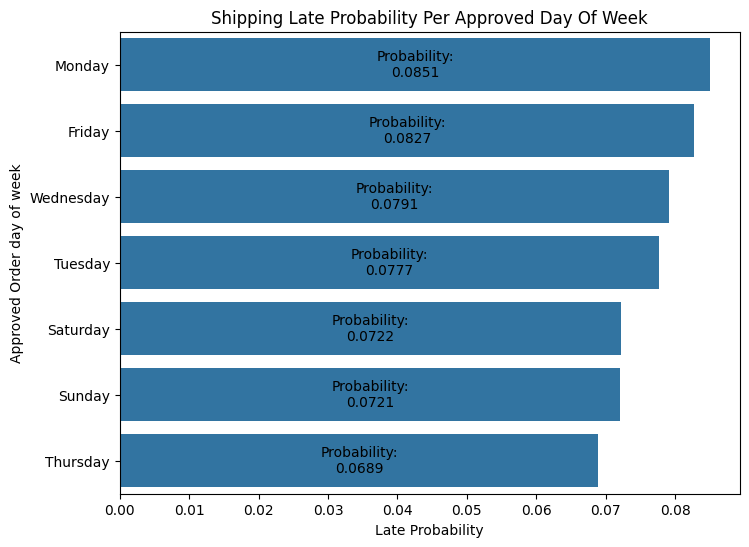

In [89]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(y='day_of_week', x='late_prop', data=app_late, capsize=0.2, ax=ax, order=app_late.sort_values(by='late_prop', ascending=False).day_of_week).set(title='Shipping Late Probability Per Approved Day Of Week')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Probability:\n%.4f', label_type='center')

ax.set(ylabel='Approved Order day of week')
ax.set(xlabel='Late Probability')
plt.show()

In [90]:
#It appears that the risk of delays is highest for approved orders on Mondays, lowest on Tuesdays

def propAppLate(data):
    if(data in app_list):
        return app_late[app_late.approved_day_of_week == data]['late_prop'].values[0]
    else:
        return 0

tr_data['app_late_prop'] = tr_data['approved_day_of_week'].apply(propAppLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [91]:
ts_data['app_late_prop'] = ts_data['approved_day_of_week'].apply(propAppLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [94]:
tr_data['purchase_hour'] = tr_data['order_purchase_timestamp'].dt.hour
tr_data['approved_hour'] = tr_data['order_approved_at'].dt.hour
tr_data.head()

order_id   customer_id order_purchase_timestamp   order_approved_at  \
0  Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54 2017-10-22 19:14:13   
1  v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31 2018-06-20 22:20:20   
2  Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31 2018-02-17 16:15:35   
3  bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29 2018-08-18 18:15:16   
4  Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04 2017-12-22 17:31:31   

  order_delivered_timestamp order_estimated_delivery_date  \
0       2017-10-26 22:19:52                    2017-11-09   
1       2018-07-03 22:51:22                    2018-07-24   
2       2018-02-27 01:29:50                    2018-03-08   
3       2018-08-27 20:03:51                    2018-09-19   
4       2018-01-05 19:22:49                    2018-01-18   

   customer_zip_code_prefix       customer_city customer_state    product_id  \
0                     58125     varzea paulista             SP  90K0C1fIyQUf   
1                      3112  armacao dos buzios             RJ  qejhpMGGVcsl   
2                      4119             jandira             SP  qUS5d2pEAyxJ   
3                     18212          uberlandia             MG  639iGvMyv0De   
4                     88868            ilhabela             SP  1lycYGcsic2F   

      seller_id   price  shipping_charges  payment_sequential payment_type  \
0  ZWM05J9LcBSF  223.51             84.65                   1  credit_card   
1  IjlpYfhUbRQs  170.80             23.79                   1  credit_card   
2  77p2EYxcM9MD   64.40             17.38                   1  credit_card   
3  jWzS0ayv9TGf  264.50             30.72                   1  credit_card   
4  l1pYW6GBnPMr  779.90             30.66                   1  credit_card   

   payment_installments  payment_value     product_category_name  \
0                     1         259.14                      toys   
1                     8         382.39             watches_gifts   
2                     4         249.25  costruction_tools_garden   
3                     2          27.79                      toys   
4                     1          76.15                      toys   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             491.0               19.0               12.0              16.0   
1             440.0               18.0               14.0              17.0   
2            2200.0               16.0               16.0              16.0   
3            1450.0               68.0                3.0              48.0   
4             300.0               17.0                4.0              12.0   

   is_late_s  prod_vol vol_category  vol_late_prop  purchase_day_of_week  \
0          0    3648.0       medium        0.07457                     6   
1          0    4284.0       medium        0.07457                     2   
2          0    4096.0       medium        0.07457                     4   
3          0    9792.0       medium        0.07457                     5   
4          0     816.0        small        0.07616                     4   

   approved_day_of_week  pur_late_prop  app_late_prop  purchase_hour  \
0                     6       0.075346       0.072117             18   
1                     2       0.074620       0.079129             21   
2                     5       0.076462       0.072244             16   
3                     5       0.069131       0.072244             18   
4                     4       0.076462       0.082739             16   

   approved_hour  
0             19  
1             22  
2             16  
3             18  
4             17

In [95]:
ts_data['purchase_hour'] = ts_data['order_purchase_timestamp'].dt.hour
ts_data['approved_hour'] = ts_data['order_approved_at'].dt.hour
ts_data.head()

order_id   customer_id order_purchase_timestamp   order_approved_at  \
0  u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57 2017-11-18 12:46:08   
1  ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12 2018-06-02 20:12:23   
2  I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30 2018-01-09 07:24:03   
3  bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46 2017-03-10 10:24:46   
4  CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07 2017-12-05 04:13:30   

   customer_zip_code_prefix        customer_city customer_state    product_id  \
0                      6020              goiania             GO  1slxdgbgWFax   
1                     23020               viamao             RS  77PgsiElQLeB   
2                     75094             campinas             SP  QVlD26X1y7NI   
3                     89284  santana de parnaiba             SP  yWlFGkKYfrpa   
4                     39810             aripuana             MT  h6MCbrwh5kiC   

      seller_id    price  shipping_charges  payment_sequential payment_type  \
0  3jwvL6ihC45G    24.10             20.90                   1  credit_card   
1  GlLj704QXlDB    42.89             12.28                   1  credit_card   
2  V3iKL8r9W9NR    50.21             67.11                   1       wallet   
3  RNBdBKsXebna    89.10             62.05                   1  credit_card   
4  5Ja2lH0N2OZt  2139.99              9.41                   1       wallet   

   payment_installments  payment_value product_category_name  \
0                     2         155.77                  toys   
1                     1           4.07           electronics   
2                     1         381.59       furniture_decor   
3                     3          14.76                  toys   
4                     1         284.09                  toys   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0              50.0               16.0                5.0              11.0   
1             200.0               21.0                7.0              14.0   
2            1000.0              100.0                5.0              20.0   
3            8950.0               40.0               30.0              40.0   
4            2301.0               32.0               35.0              34.0   

   prod_vol vol_category  vol_late_prop  purchase_day_of_week  \
0     880.0        small       0.076160                     5   
1    2058.0        small       0.076160                     5   
2   10000.0       medium       0.074570                     0   
3   48000.0        large       0.083013                     4   
4   38080.0        large       0.083013                     5   

   approved_day_of_week  pur_late_prop  app_late_prop  purchase_hour  \
0                     5       0.069131       0.072244             12   
1                     5       0.069131       0.072244             17   
2                     1       0.087031       0.077687             11   
3                     4       0.076462       0.082739             10   
4                     1       0.069131       0.077687             10   

   approved_hour  
0             12  
1             20  
2              7  
3             10  
4              4

<Axes: xlabel='purchase_hour', ylabel='count'>

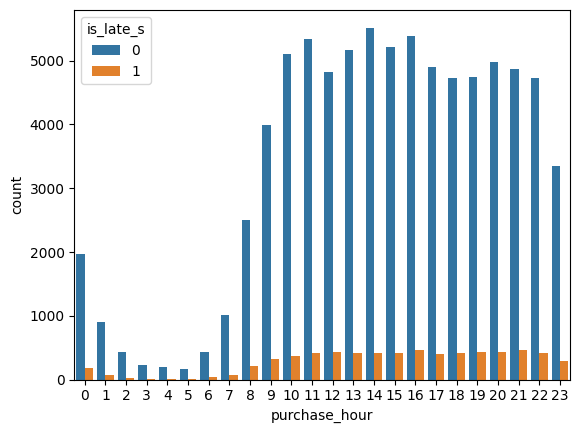

In [96]:
sns.countplot(x=tr_data['purchase_hour'], hue=tr_data['is_late_s'])


In [97]:
purh_late = tr_data[tr_data.is_late_s == 1]['purchase_hour'].value_counts().rename_axis('purchase_hour').reset_index(name='late_counts')
purh_all = tr_data['purchase_hour'].value_counts().rename_axis('purchase_hour').reset_index(name='all_counts')
purh_late['all_count'] = purh_late.purchase_hour.map(purh_all.set_index('purchase_hour')['all_counts'])
purh_late['late_prop'] = purh_late['late_counts'] / purh_late['all_count']
purh_list =purh_late['purchase_hour'].to_list()
purh_late['hour'] = purh_late['purchase_hour'].map({0: '00.00', 1: '01.00', 2: '02.00', 3:'03.00', 4:'04.00', 5:'05.00', 6:'06.00', 7:'07.00',8:'08.00',9:'09.00',10:'10.00',11:'11.00',12:'12.00',13:'13.00',14:'14.00',15:'15.00',16:'16.00',17:'17.00',18:'18.00',19:'19.00',20:'20.00',21:'21.00',22:'22.00',23:'23.00'})
purh_late

purchase_hour  late_counts  all_count  late_prop   hour
0              21          462       5331   0.086663  21.00
1              16          457       5844   0.078200  16.00
2              20          440       5417   0.081226  20.00
3              19          427       5173   0.082544  19.00
4              12          425       5244   0.081045  12.00
5              14          424       5943   0.071344  14.00
6              13          424       5589   0.075863  13.00
7              15          418       5628   0.074271  15.00
8              18          416       5149   0.080792  18.00
9              11          414       5749   0.072013  11.00
10             22          411       5136   0.080023  22.00
11             17          402       5306   0.075763  17.00
12             10          376       5486   0.068538  10.00
13              9          321       4307   0.074530  09.00
14             23          293       3641   0.080472  23.00
15              8          207       2702   0.076610  08.00
16              0          176       2143   0.082128  00.00
17              1           77        980   0.078571  01.00
18              7           75       1087   0.068997  07.00
19              6           33        466   0.070815  06.00
20              2           30        467   0.064240  02.00
21              3           12        240   0.050000  03.00
22              5           10        177   0.056497  05.00
23              4            8        213   0.037559  04.00

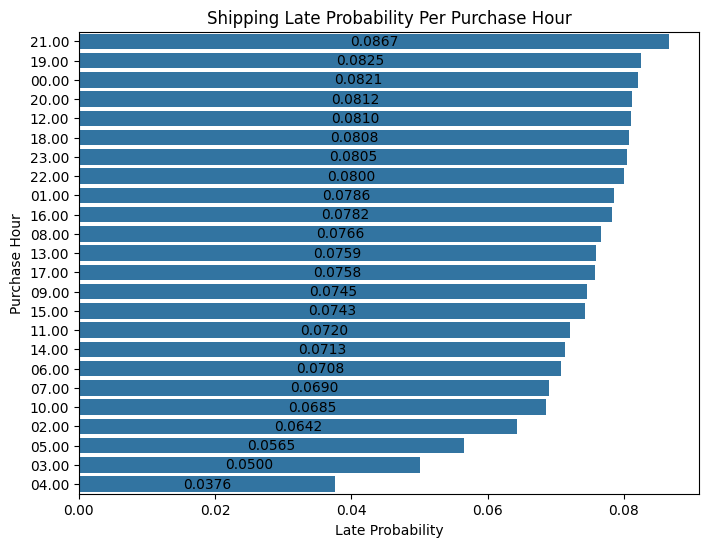

In [98]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(y='hour', x='late_prop', data=purh_late, capsize=0.2, ax=ax, order=purh_late.sort_values(by='late_prop', ascending=False).hour).set(title='Shipping Late Probability Per Purchase Hour')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='%.4f', label_type='center')

ax.set(ylabel='Purchase Hour')
ax.set(xlabel='Late Probability')
plt.show()

In [99]:
#Based on the data, it is known that the probability of being late is highest at 5 am

In [100]:
def propPurhLate(data):
    if(data in purh_list):
        return purh_late[purh_late.purchase_hour == data]['late_prop'].values[0]
    else:
        return 0

tr_data['purh_late_prop'] = tr_data['purchase_hour'].apply(propPurhLate)
tr_data


order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [101]:
ts_data['purh_late_prop'] = ts_data['purchase_hour'].apply(propPurhLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [102]:
apph_late = tr_data[tr_data.is_late_s == 1]['approved_hour'].value_counts().rename_axis('approved_hour').reset_index(name='late_counts')
apph_all = tr_data['approved_hour'].value_counts().rename_axis('approved_hour').reset_index(name='all_counts')
apph_late['all_count'] = apph_late.approved_hour.map(apph_all.set_index('approved_hour')['all_counts'])
apph_late['late_prop'] = apph_late['late_counts'] / apph_late['all_count']
apph_list =apph_late['approved_hour'].to_list()
apph_late['hour'] = apph_late['approved_hour'].map({0: '00.00', 1: '01.00', 2: '02.00', 3:'03.00', 4:'04.00', 5:'05.00', 6:'06.00', 7:'07.00',8:'08.00',9:'09.00',10:'10.00',11:'11.00',12:'12.00',13:'13.00',14:'14.00',15:'15.00',16:'16.00',17:'17.00',18:'18.00',19:'19.00',20:'20.00',21:'21.00',22:'22.00',23:'23.00'})
apph_late

approved_hour  late_counts  all_count  late_prop   hour
0               2          531       6175   0.085992  02.00
1               3          441       4816   0.091570  03.00
2              16          372       5192   0.071649  16.00
3              18          368       4432   0.083032  18.00
4              14          368       4732   0.077768  14.00
5              21          363       4129   0.087915  21.00
6              11          361       4791   0.075350  11.00
7              15          359       4677   0.076759  15.00
8              13          347       4764   0.072838  13.00
9              17          342       4806   0.071161  17.00
10             19          330       4472   0.073792  19.00
11             12          328       4050   0.080988  12.00
12             20          323       4304   0.075046  20.00
13             22          303       4114   0.073651  22.00
14             10          290       4252   0.068203  10.00
15              9          255       3415   0.074671  09.00
16             23          235       3206   0.073300  23.00
17              4          202       2862   0.070580  04.00
18              0          163       1744   0.093463  00.00
19              8          132       2063   0.063984  08.00
20              7          109       1336   0.081587  07.00
21              1          100       1364   0.073314  01.00
22              5           63        916   0.068777  05.00
23              6           53        806   0.065757  06.00

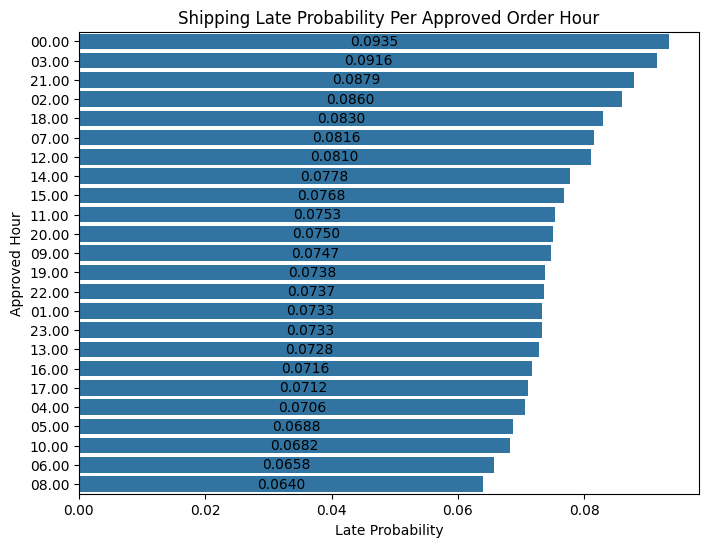

In [103]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(y='hour', x='late_prop', data=apph_late, capsize=0.2, ax=ax, order=apph_late.sort_values(by='late_prop', ascending=False).hour).set(title='Shipping Late Probability Per Approved Order Hour')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='%.4f', label_type='center')

ax.set(ylabel='Approved Hour')
ax.set(xlabel='Late Probability')
plt.show()

In [104]:
#Based on the data, it is known that the highest risk of delivery delays occurs at 3 am

In [105]:
def propApphLate(data):
    if(data in apph_list):
        return apph_late[apph_late.approved_hour == data]['late_prop'].values[0]
    else:
        return 0

tr_data['apph_late_prop'] = tr_data['approved_hour'].apply(propApphLate)
tr_data


order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [106]:
ts_data['apph_late_prop'] = ts_data['approved_hour'].apply(propApphLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [107]:
# tr_data['approved_min_purchase'] = ((tr_data['order_approved_at'] - tr_data['order_purchase_timestamp']).astype('timedelta64[s]')).astype(int)
tr_data['approved_min_purchase'] = ((tr_data['order_approved_at'] - tr_data['order_purchase_timestamp']).astype('timedelta64[s]') / pd.Timedelta(hours=1)).astype(int)
tr_data['approved_min_purchase'].astype(float)
tr_data.head()

order_id   customer_id order_purchase_timestamp   order_approved_at  \
0  Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54 2017-10-22 19:14:13   
1  v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31 2018-06-20 22:20:20   
2  Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31 2018-02-17 16:15:35   
3  bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29 2018-08-18 18:15:16   
4  Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04 2017-12-22 17:31:31   

  order_delivered_timestamp order_estimated_delivery_date  \
0       2017-10-26 22:19:52                    2017-11-09   
1       2018-07-03 22:51:22                    2018-07-24   
2       2018-02-27 01:29:50                    2018-03-08   
3       2018-08-27 20:03:51                    2018-09-19   
4       2018-01-05 19:22:49                    2018-01-18   

   customer_zip_code_prefix       customer_city customer_state    product_id  \
0                     58125     varzea paulista             SP  90K0C1fIyQUf   
1                      3112  armacao dos buzios             RJ  qejhpMGGVcsl   
2                      4119             jandira             SP  qUS5d2pEAyxJ   
3                     18212          uberlandia             MG  639iGvMyv0De   
4                     88868            ilhabela             SP  1lycYGcsic2F   

      seller_id   price  shipping_charges  payment_sequential payment_type  \
0  ZWM05J9LcBSF  223.51             84.65                   1  credit_card   
1  IjlpYfhUbRQs  170.80             23.79                   1  credit_card   
2  77p2EYxcM9MD   64.40             17.38                   1  credit_card   
3  jWzS0ayv9TGf  264.50             30.72                   1  credit_card   
4  l1pYW6GBnPMr  779.90             30.66                   1  credit_card   

   payment_installments  payment_value     product_category_name  \
0                     1         259.14                      toys   
1                     8         382.39             watches_gifts   
2                     4         249.25  costruction_tools_garden   
3                     2          27.79                      toys   
4                     1          76.15                      toys   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             491.0               19.0               12.0              16.0   
1             440.0               18.0               14.0              17.0   
2            2200.0               16.0               16.0              16.0   
3            1450.0               68.0                3.0              48.0   
4             300.0               17.0                4.0              12.0   

   is_late_s  prod_vol vol_category  vol_late_prop  purchase_day_of_week  \
0          0    3648.0       medium        0.07457                     6   
1          0    4284.0       medium        0.07457                     2   
2          0    4096.0       medium        0.07457                     4   
3          0    9792.0       medium        0.07457                     5   
4          0     816.0        small        0.07616                     4   

   approved_day_of_week  pur_late_prop  app_late_prop  purchase_hour  \
0                     6       0.075346       0.072117             18   
1                     2       0.074620       0.079129             21   
2                     5       0.076462       0.072244             16   
3                     5       0.069131       0.072244             18   
4                     4       0.076462       0.082739             16   

   approved_hour  purh_late_prop  apph_late_prop  approved_min_purchase  
0             19        0.080792        0.073792                      0  
1             22        0.086663        0.073651                      0  
2             16        0.078200        0.071649                     23  
3             18        0.080792        0.083032                      0  
4             17        0.078200        0.071161                      0

In [108]:
tr_data[tr_data['is_late_s'] == 1]['approved_min_purchase'].describe()


count    6738.000000
mean       12.368804
std        29.678677
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max       741.000000
Name: approved_min_purchase, dtype: float64

In [109]:
ts_data['approved_min_purchase'] = ((ts_data['order_approved_at'] - ts_data['order_purchase_timestamp']).astype('timedelta64[s]') / pd.Timedelta(hours=1)).astype(int)
ts_data['approved_min_purchase'].astype(float)
ts_data.head()

order_id   customer_id order_purchase_timestamp   order_approved_at  \
0  u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57 2017-11-18 12:46:08   
1  ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12 2018-06-02 20:12:23   
2  I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30 2018-01-09 07:24:03   
3  bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46 2017-03-10 10:24:46   
4  CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07 2017-12-05 04:13:30   

   customer_zip_code_prefix        customer_city customer_state    product_id  \
0                      6020              goiania             GO  1slxdgbgWFax   
1                     23020               viamao             RS  77PgsiElQLeB   
2                     75094             campinas             SP  QVlD26X1y7NI   
3                     89284  santana de parnaiba             SP  yWlFGkKYfrpa   
4                     39810             aripuana             MT  h6MCbrwh5kiC   

      seller_id    price  shipping_charges  payment_sequential payment_type  \
0  3jwvL6ihC45G    24.10             20.90                   1  credit_card   
1  GlLj704QXlDB    42.89             12.28                   1  credit_card   
2  V3iKL8r9W9NR    50.21             67.11                   1       wallet   
3  RNBdBKsXebna    89.10             62.05                   1  credit_card   
4  5Ja2lH0N2OZt  2139.99              9.41                   1       wallet   

   payment_installments  payment_value product_category_name  \
0                     2         155.77                  toys   
1                     1           4.07           electronics   
2                     1         381.59       furniture_decor   
3                     3          14.76                  toys   
4                     1         284.09                  toys   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0              50.0               16.0                5.0              11.0   
1             200.0               21.0                7.0              14.0   
2            1000.0              100.0                5.0              20.0   
3            8950.0               40.0               30.0              40.0   
4            2301.0               32.0               35.0              34.0   

   prod_vol vol_category  vol_late_prop  purchase_day_of_week  \
0     880.0        small       0.076160                     5   
1    2058.0        small       0.076160                     5   
2   10000.0       medium       0.074570                     0   
3   48000.0        large       0.083013                     4   
4   38080.0        large       0.083013                     5   

   approved_day_of_week  pur_late_prop  app_late_prop  purchase_hour  \
0                     5       0.069131       0.072244             12   
1                     5       0.069131       0.072244             17   
2                     1       0.087031       0.077687             11   
3                     4       0.076462       0.082739             10   
4                     1       0.069131       0.077687             10   

   approved_hour  purh_late_prop  apph_late_prop  approved_min_purchase  
0             12        0.081045        0.080988                      0  
1             20        0.075763        0.075046                      2  
2              7        0.072013        0.081587                     20  
3             10        0.068538        0.068203                      0  
4              4        0.068538        0.070580                     66

In [110]:
sectil = tr_data['approved_min_purchase'].quantile([0.25]).values[0]
thirtil = tr_data['approved_min_purchase'].quantile([0.75]).values[0]
tr_data['apmpu_category'] = tr_data['approved_min_purchase'].apply(lambda x:'slow' if x>=thirtil else ('fast' if x>=sectil and x<thirtil else 'fast'))
ts_data['apmpu_category'] = ts_data['approved_min_purchase'].apply(lambda x:'slow' if x>=thirtil else ('fast' if x>=sectil and x<thirtil else 'fast'))

tr_data.head()

order_id   customer_id order_purchase_timestamp   order_approved_at  \
0  Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54 2017-10-22 19:14:13   
1  v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31 2018-06-20 22:20:20   
2  Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31 2018-02-17 16:15:35   
3  bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29 2018-08-18 18:15:16   
4  Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04 2017-12-22 17:31:31   

  order_delivered_timestamp order_estimated_delivery_date  \
0       2017-10-26 22:19:52                    2017-11-09   
1       2018-07-03 22:51:22                    2018-07-24   
2       2018-02-27 01:29:50                    2018-03-08   
3       2018-08-27 20:03:51                    2018-09-19   
4       2018-01-05 19:22:49                    2018-01-18   

   customer_zip_code_prefix       customer_city customer_state    product_id  \
0                     58125     varzea paulista             SP  90K0C1fIyQUf   
1                      3112  armacao dos buzios             RJ  qejhpMGGVcsl   
2                      4119             jandira             SP  qUS5d2pEAyxJ   
3                     18212          uberlandia             MG  639iGvMyv0De   
4                     88868            ilhabela             SP  1lycYGcsic2F   

      seller_id   price  shipping_charges  payment_sequential payment_type  \
0  ZWM05J9LcBSF  223.51             84.65                   1  credit_card   
1  IjlpYfhUbRQs  170.80             23.79                   1  credit_card   
2  77p2EYxcM9MD   64.40             17.38                   1  credit_card   
3  jWzS0ayv9TGf  264.50             30.72                   1  credit_card   
4  l1pYW6GBnPMr  779.90             30.66                   1  credit_card   

   payment_installments  payment_value     product_category_name  \
0                     1         259.14                      toys   
1                     8         382.39             watches_gifts   
2                     4         249.25  costruction_tools_garden   
3                     2          27.79                      toys   
4                     1          76.15                      toys   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             491.0               19.0               12.0              16.0   
1             440.0               18.0               14.0              17.0   
2            2200.0               16.0               16.0              16.0   
3            1450.0               68.0                3.0              48.0   
4             300.0               17.0                4.0              12.0   

   is_late_s  prod_vol vol_category  vol_late_prop  purchase_day_of_week  \
0          0    3648.0       medium        0.07457                     6   
1          0    4284.0       medium        0.07457                     2   
2          0    4096.0       medium        0.07457                     4   
3          0    9792.0       medium        0.07457                     5   
4          0     816.0        small        0.07616                     4   

   approved_day_of_week  pur_late_prop  app_late_prop  purchase_hour  \
0                     6       0.075346       0.072117             18   
1                     2       0.074620       0.079129             21   
2                     5       0.076462       0.072244             16   
3                     5       0.069131       0.072244             18   
4                     4       0.076462       0.082739             16   

   approved_hour  purh_late_prop  apph_late_prop  approved_min_purchase  \
0             19        0.080792        0.073792                      0   
1             22        0.086663        0.073651                      0   
2             16        0.078200        0.071649                     23   
3             18        0.080792        0.083032                      0   
4             17        0.078200        0.071161                      0 

In [111]:
apmpu_late = tr_data[tr_data.is_late_s == 1]['apmpu_category'].value_counts().rename_axis('apmpu_category').reset_index(name='late_counts')
apmpu_all = tr_data['apmpu_category'].value_counts().rename_axis('apmpu_category').reset_index(name='all_counts')
apmpu_late['all_count'] = apmpu_late.apmpu_category.map(apmpu_all.set_index('apmpu_category')['all_counts'])
apmpu_late['late_prop'] = apmpu_late['late_counts'] / apmpu_late['all_count']
apmpu_list = apmpu_late['apmpu_category'].to_list()
apmpu_late

apmpu_category  late_counts  all_count  late_prop
0           fast         4688      64944   0.072185
1           slow         2050      22474   0.091217

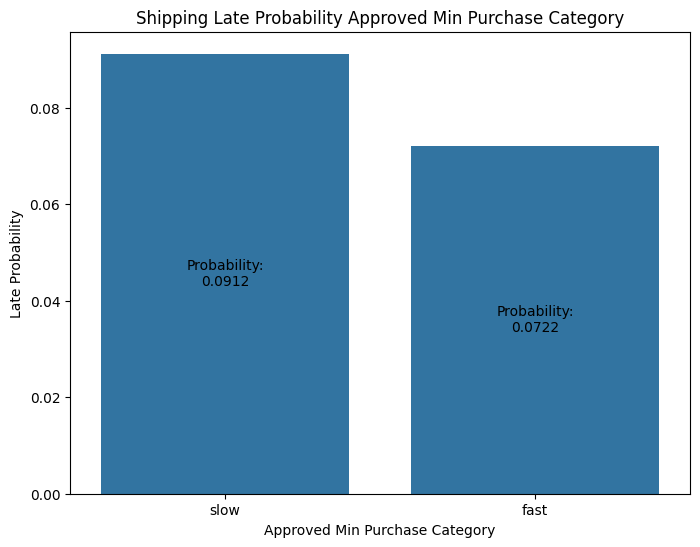

In [112]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(x='apmpu_category', y='late_prop', data=apmpu_late, capsize=0.2, ax=ax, order=apmpu_late.sort_values(by='late_prop', ascending=False).apmpu_category).set(title='Shipping Late Probability Approved Min Purchase Category')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Probability:\n%.4f', label_type='center')

ax.set(xlabel='Approved Min Purchase Category')
ax.set(ylabel='Late Probability')
plt.show()

In [113]:
#Based on the data, it is known that the greater the gap between the time the order is paid (order_purchased) and the time the order is received (order_approved), the greater the risk of delivery delays.

In [114]:
def propApmpuLate(data):
    if(data in apmpu_list):
        return apmpu_late[apmpu_late.apmpu_category == data]['late_prop'].values[0]
    else:
        return 0

tr_data['apmpu_late_prop'] = tr_data['apmpu_category'].apply(propApmpuLate)
ts_data['apmpu_late_prop'] = ts_data['apmpu_category'].apply(propApmpuLate)

tr_data


order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [115]:
tr_data['price'].describe()


count    87418.000000
mean       342.290084
std        559.765708
min          0.850000
25%         59.650000
50%        136.900000
75%        399.200000
max       6735.000000
Name: price, dtype: float64

In [116]:
sectil = tr_data['price'].quantile([0.25]).values[0]
thirtil = tr_data['price'].quantile([0.75]).values[0]
tr_data['price_category'] = tr_data['price'].apply(lambda x:'expensive' if x>=thirtil else ('affordable' if x>=sectil and x<thirtil else 'cheap'))
tr_data.head()

order_id   customer_id order_purchase_timestamp   order_approved_at  \
0  Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54 2017-10-22 19:14:13   
1  v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31 2018-06-20 22:20:20   
2  Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31 2018-02-17 16:15:35   
3  bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29 2018-08-18 18:15:16   
4  Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04 2017-12-22 17:31:31   

  order_delivered_timestamp order_estimated_delivery_date  \
0       2017-10-26 22:19:52                    2017-11-09   
1       2018-07-03 22:51:22                    2018-07-24   
2       2018-02-27 01:29:50                    2018-03-08   
3       2018-08-27 20:03:51                    2018-09-19   
4       2018-01-05 19:22:49                    2018-01-18   

   customer_zip_code_prefix       customer_city customer_state    product_id  \
0                     58125     varzea paulista             SP  90K0C1fIyQUf   
1                      3112  armacao dos buzios             RJ  qejhpMGGVcsl   
2                      4119             jandira             SP  qUS5d2pEAyxJ   
3                     18212          uberlandia             MG  639iGvMyv0De   
4                     88868            ilhabela             SP  1lycYGcsic2F   

      seller_id   price  shipping_charges  payment_sequential payment_type  \
0  ZWM05J9LcBSF  223.51             84.65                   1  credit_card   
1  IjlpYfhUbRQs  170.80             23.79                   1  credit_card   
2  77p2EYxcM9MD   64.40             17.38                   1  credit_card   
3  jWzS0ayv9TGf  264.50             30.72                   1  credit_card   
4  l1pYW6GBnPMr  779.90             30.66                   1  credit_card   

   payment_installments  payment_value     product_category_name  \
0                     1         259.14                      toys   
1                     8         382.39             watches_gifts   
2                     4         249.25  costruction_tools_garden   
3                     2          27.79                      toys   
4                     1          76.15                      toys   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             491.0               19.0               12.0              16.0   
1             440.0               18.0               14.0              17.0   
2            2200.0               16.0               16.0              16.0   
3            1450.0               68.0                3.0              48.0   
4             300.0               17.0                4.0              12.0   

   is_late_s  prod_vol vol_category  vol_late_prop  purchase_day_of_week  \
0          0    3648.0       medium        0.07457                     6   
1          0    4284.0       medium        0.07457                     2   
2          0    4096.0       medium        0.07457                     4   
3          0    9792.0       medium        0.07457                     5   
4          0     816.0        small        0.07616                     4   

   approved_day_of_week  pur_late_prop  app_late_prop  purchase_hour  \
0                     6       0.075346       0.072117             18   
1                     2       0.074620       0.079129             21   
2                     5       0.076462       0.072244             16   
3                     5       0.069131       0.072244             18   
4                     4       0.076462       0.082739             16   

   approved_hour  purh_late_prop  apph_late_prop  approved_min_purchase  \
0             19        0.080792        0.073792                      0   
1             22        0.086663        0.073651                      0   
2             16        0.078200        0.071649                     23   
3             18        0.080792        0.083032                      0   
4             17        0.078200        0.071161                      0 

In [117]:
price_late = tr_data[tr_data.is_late_s == 1]['price_category'].value_counts().rename_axis('price_category').reset_index(name='late_counts')
price_all = tr_data['price_category'].value_counts().rename_axis('price_category').reset_index(name='all_counts')
price_late['all_count'] = price_late.price_category.map(price_all.set_index('price_category')['all_counts'])
price_late['late_prop'] =price_late['late_counts'] / price_late['all_count']
price_list =price_late['price_category'].to_list()
price_late

price_category  late_counts  all_count  late_prop
0     affordable         3376      43326   0.077921
1          cheap         1691      21792   0.077597
2      expensive         1671      22300   0.074933

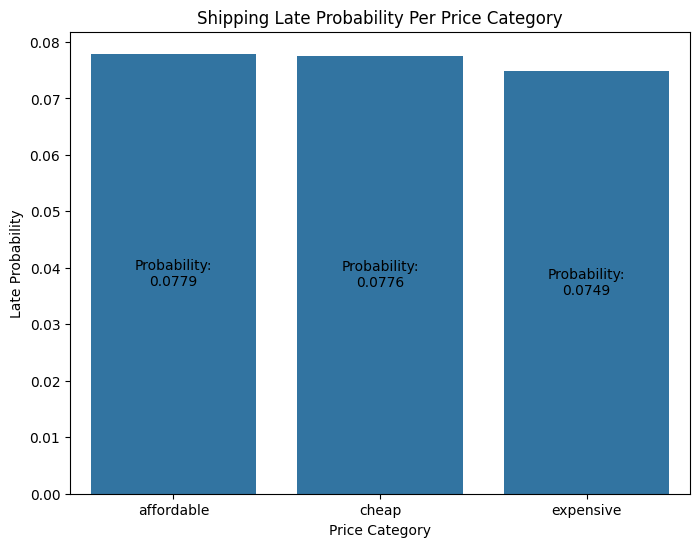

In [118]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(x='price_category', y='late_prop', data=price_late, capsize=0.2, ax=ax, order=price_late.sort_values(by='late_prop', ascending=False).price_category).set(title='Shipping Late Probability Per Price Category')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Probability:\n%.4f', label_type='center')

ax.set(xlabel='Price Category')
ax.set(ylabel='Late Probability')
plt.show()

In [119]:
#Based on the data, it is known that expensive goods tend to be the most at risk of late delivery, followed by cheap goods and moderate prices (affordable).

In [120]:
def priceLate(data):
    if(data in price_list):
        return price_late[price_late.price_category == data]['late_prop'].values[0]
    else:
        return 0

tr_data['price_late_prop'] = tr_data['price_category'].apply(priceLate)
tr_data


order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [121]:
ts_data['price_category'] = ts_data['price'].apply(lambda x:'expensive' if x>=thirtil else ('affordable' if x>=sectil and x<thirtil else 'cheap'))
ts_data.head()

order_id   customer_id order_purchase_timestamp   order_approved_at  \
0  u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57 2017-11-18 12:46:08   
1  ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12 2018-06-02 20:12:23   
2  I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30 2018-01-09 07:24:03   
3  bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46 2017-03-10 10:24:46   
4  CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07 2017-12-05 04:13:30   

   customer_zip_code_prefix        customer_city customer_state    product_id  \
0                      6020              goiania             GO  1slxdgbgWFax   
1                     23020               viamao             RS  77PgsiElQLeB   
2                     75094             campinas             SP  QVlD26X1y7NI   
3                     89284  santana de parnaiba             SP  yWlFGkKYfrpa   
4                     39810             aripuana             MT  h6MCbrwh5kiC   

      seller_id    price  shipping_charges  payment_sequential payment_type  \
0  3jwvL6ihC45G    24.10             20.90                   1  credit_card   
1  GlLj704QXlDB    42.89             12.28                   1  credit_card   
2  V3iKL8r9W9NR    50.21             67.11                   1       wallet   
3  RNBdBKsXebna    89.10             62.05                   1  credit_card   
4  5Ja2lH0N2OZt  2139.99              9.41                   1       wallet   

   payment_installments  payment_value product_category_name  \
0                     2         155.77                  toys   
1                     1           4.07           electronics   
2                     1         381.59       furniture_decor   
3                     3          14.76                  toys   
4                     1         284.09                  toys   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0              50.0               16.0                5.0              11.0   
1             200.0               21.0                7.0              14.0   
2            1000.0              100.0                5.0              20.0   
3            8950.0               40.0               30.0              40.0   
4            2301.0               32.0               35.0              34.0   

   prod_vol vol_category  vol_late_prop  purchase_day_of_week  \
0     880.0        small       0.076160                     5   
1    2058.0        small       0.076160                     5   
2   10000.0       medium       0.074570                     0   
3   48000.0        large       0.083013                     4   
4   38080.0        large       0.083013                     5   

   approved_day_of_week  pur_late_prop  app_late_prop  purchase_hour  \
0                     5       0.069131       0.072244             12   
1                     5       0.069131       0.072244             17   
2                     1       0.087031       0.077687             11   
3                     4       0.076462       0.082739             10   
4                     1       0.069131       0.077687             10   

   approved_hour  purh_late_prop  apph_late_prop  approved_min_purchase  \
0             12        0.081045        0.080988                      0   
1             20        0.075763        0.075046                      2   
2              7        0.072013        0.081587                     20   
3             10        0.068538        0.068203                      0   
4              4        0.068538        0.070580                     66   

  apmpu_category  apmpu_late_prop price_category  
0           fast         0.072185          cheap  
1           fast         0.072185          cheap  
2           slow         0.091217          cheap  
3           fast         0.072185     affordable  
4           slow         0.091217      expensive

In [122]:
ts_data['price_late_prop'] = ts_data['price_category'].apply(priceLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [123]:
#Installments 

<Axes: xlabel='payment_installments', ylabel='count'>

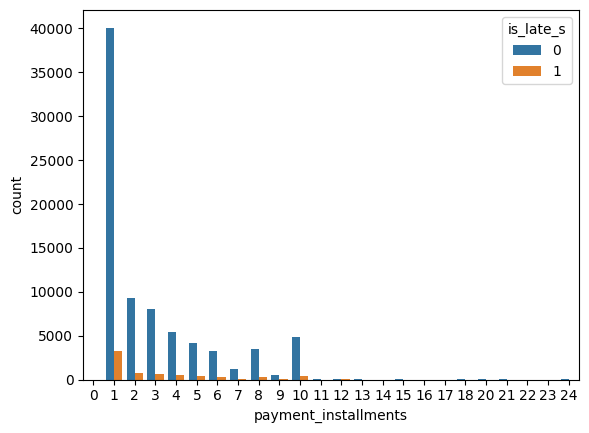

In [124]:
sns.countplot(x=tr_data['payment_installments'], hue=tr_data['is_late_s'])



In [125]:
install_late = tr_data[tr_data.is_late_s == 1]['payment_installments'].value_counts().rename_axis('payment_installments').reset_index(name='late_counts')
install_all = tr_data['payment_installments'].value_counts().rename_axis('payment_installments').reset_index(name='all_counts')
install_late['all_count'] = install_late.payment_installments.map(install_all.set_index('payment_installments')['all_counts'])
install_late['late_prop'] =install_late['late_counts'] / install_late['all_count']
install_list =install_late['payment_installments'].to_list()
install_late['install'] = install_late['payment_installments'].map({1: '1', 2: '2', 3: '3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8',9:'9',10:'10',11:'11',12:'12',13:'13',14:'14',15:'15',16:'16',17:'17',18:'18',19:'19',20:'20',21:'21',22:'22',23:'23',24:'24'})
install_late

payment_installments  late_counts  all_count  late_prop install
0                      1         3274      43375   0.075481       1
1                      2          797      10124   0.078724       2
2                      3          677       8703   0.077789       3
3                      4          484       5917   0.081798       4
4                     10          380       5210   0.072937      10
5                      5          366       4513   0.081099       5
6                      8          304       3837   0.079229       8
7                      6          267       3503   0.076220       6
8                      7          107       1357   0.078850       7
9                      9           56        547   0.102377       9
10                    12           15        126   0.119048      12
11                    15            5         70   0.071429      15
12                    20            1         15   0.066667      20
13                    17            1          6   0.166667      17
14                    18            1         26   0.038462      18
15                    22            1          1   1.000000      22
16                    11            1         18   0.055556      11
17                    24            1         24   0.041667      24

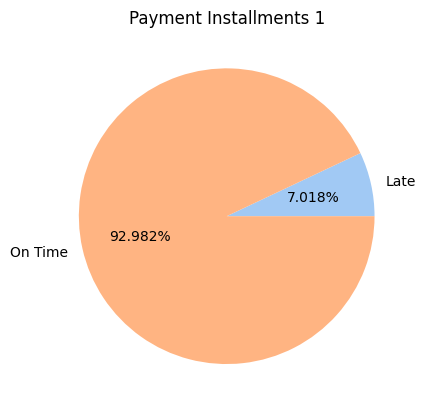

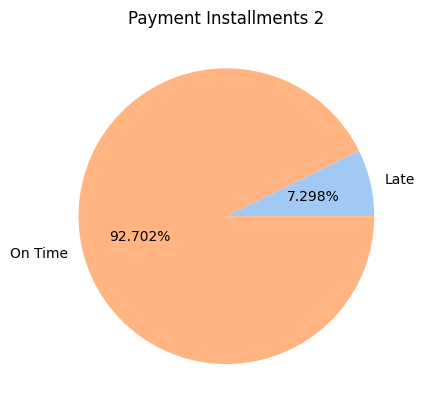

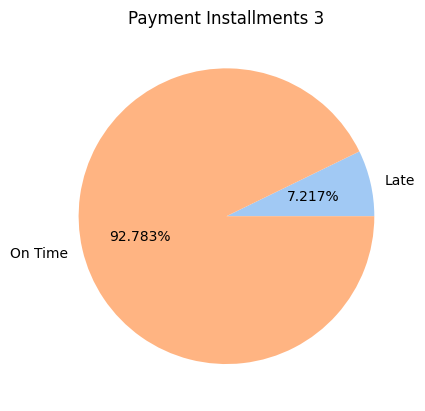

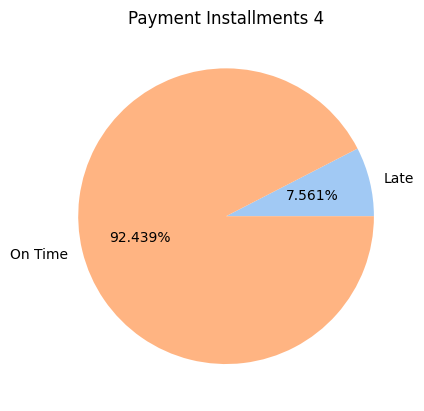

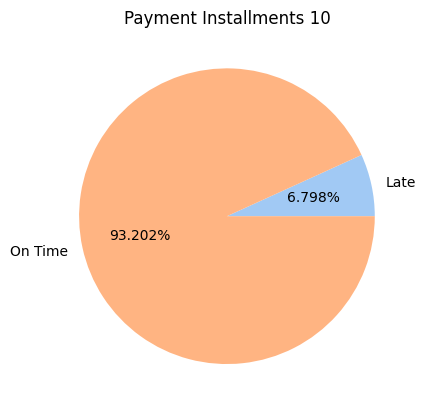

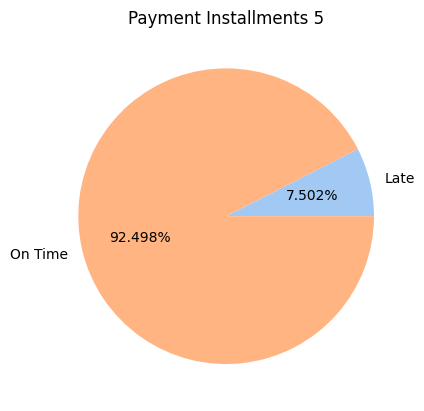

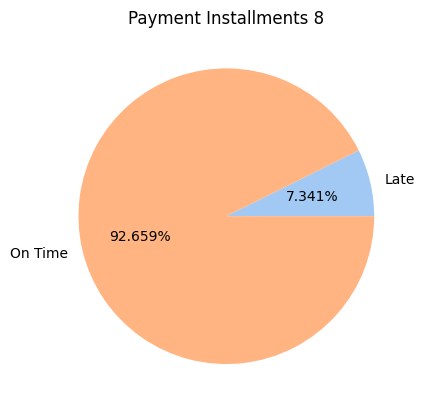

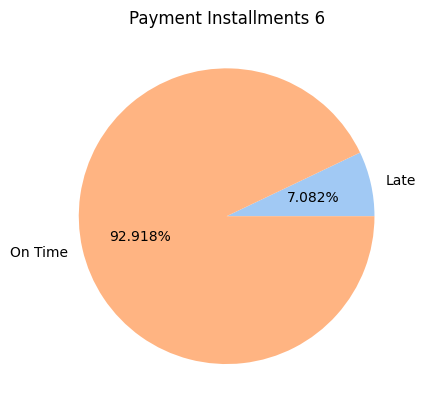

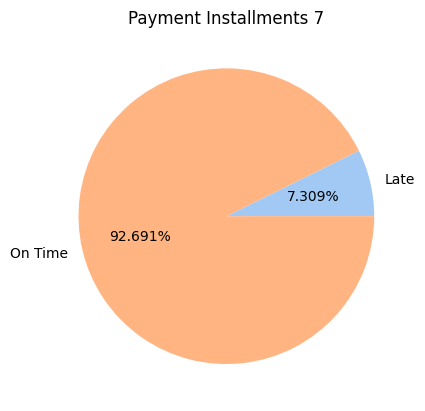

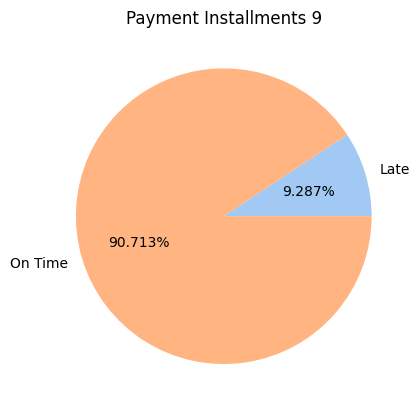

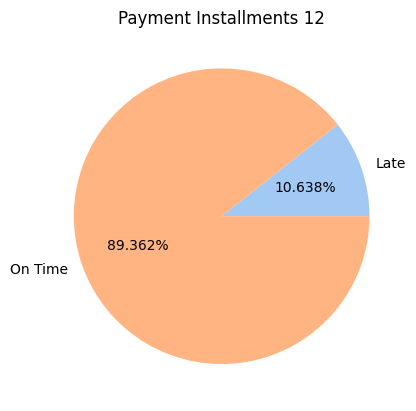

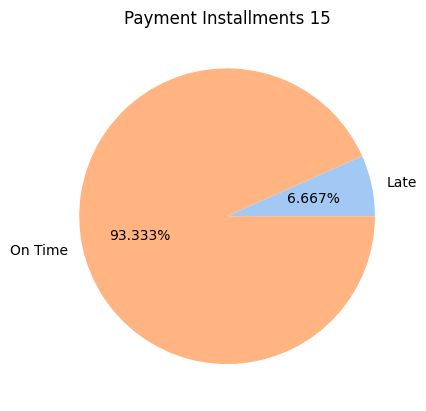

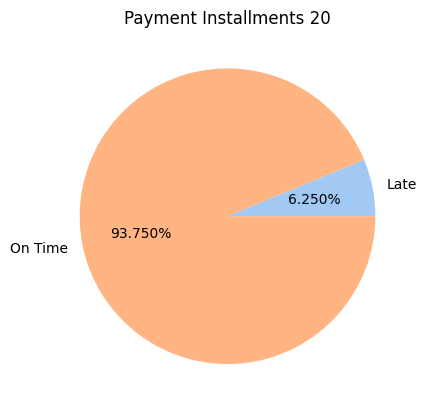

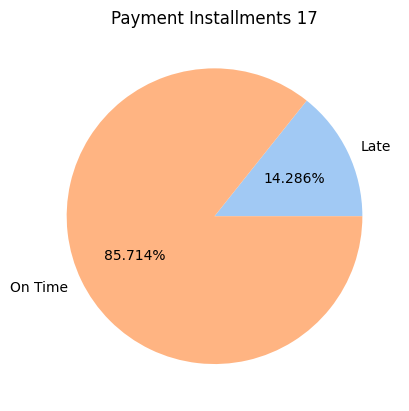

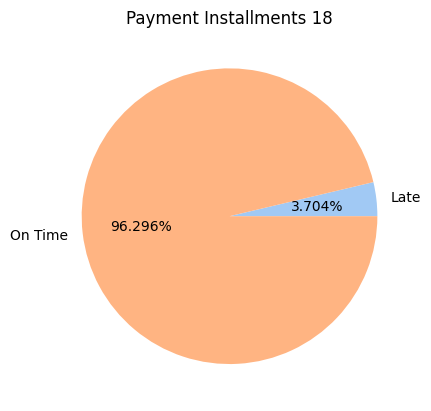

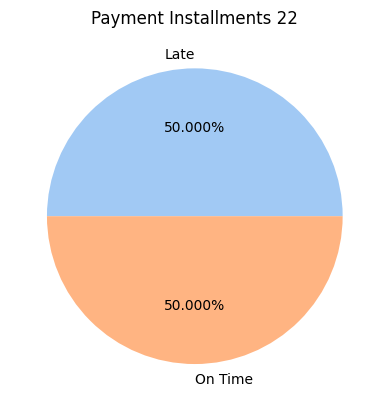

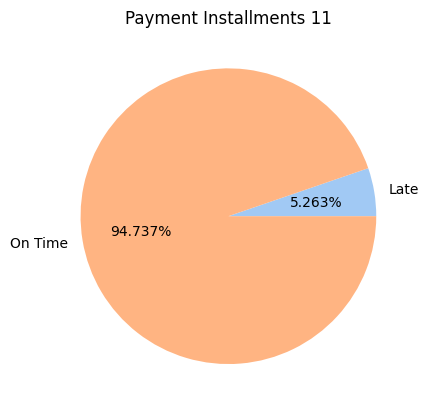

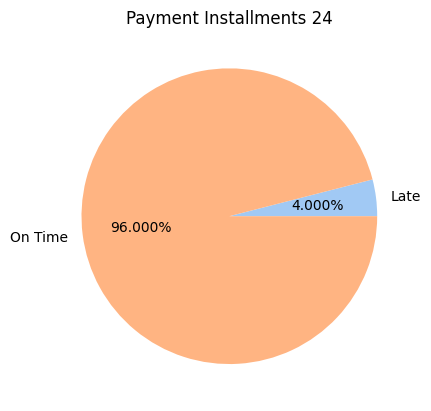

In [126]:
for i in range(0, len(install_late)):
    data = [install_late['late_counts'][i], install_late['all_count'][i]]
    labels = ['Late', 'On Time']
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:5]
    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.3f%%')
    plt.title('Payment Installments'+' '+install_late['install'][i].title())
    plt.show()

In [127]:
def installLate(data):
    if(data in install_list):
        return install_late[install_late.payment_installments == data]['late_prop'].values[0]
    else:
        return 0

tr_data['install_late_prop'] = tr_data['payment_installments'].apply(installLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [128]:
ts_data['install_late_prop'] = ts_data['payment_installments'].apply(installLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

<Axes: xlabel='payment_type', ylabel='count'>

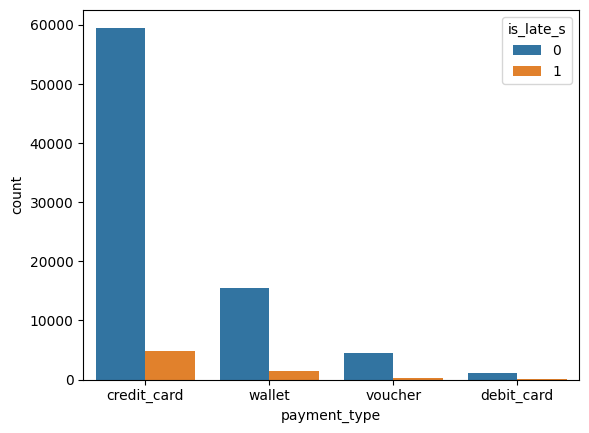

In [129]:
sns.countplot(x=tr_data['payment_type'], hue=tr_data['is_late_s'])


In [130]:
pt_late = tr_data[tr_data.is_late_s == 1]['payment_type'].value_counts().rename_axis('payment_type').reset_index(name='late_counts')
pt_all = tr_data['payment_type'].value_counts().rename_axis('payment_type').reset_index(name='all_counts')
pt_late['all_count'] = pt_late.payment_type.map(pt_all.set_index('payment_type')['all_counts'])
pt_late['late_prop'] =pt_late['late_counts'] / pt_late['all_count']
pt_list =pt_late['payment_type'].to_list()
pt_late

payment_type  late_counts  all_count  late_prop
0  credit_card         4876      64435   0.075673
1       wallet         1443      16930   0.085233
2      voucher          313       4790   0.065344
3   debit_card          106       1263   0.083927

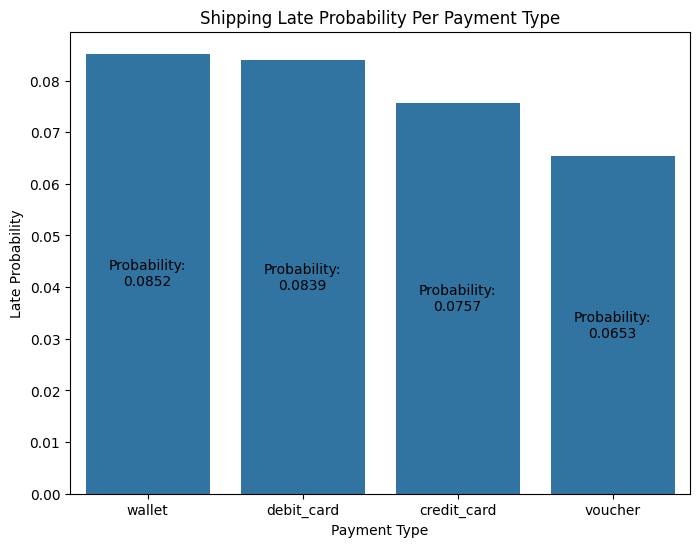

In [131]:
fig, ax = plt.subplots(figsize=(8, 6))
# add the plot
sns.barplot(x='payment_type', y='late_prop', data=pt_late, capsize=0.2, ax=ax, order=pt_late.sort_values(by='late_prop', ascending=False).payment_type).set(title='Shipping Late Probability Per Payment Type')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Probability:\n%.4f', label_type='center')

ax.set(xlabel='Payment Type')
ax.set(ylabel='Late Probability')
plt.show()

In [132]:
#It is known that the debit card payment type has the highest risk of delays, the lowest is the voucher payment type

In [133]:
def ptLate(data):
    if(data in pt_list):
        return pt_late[pt_late.payment_type == data]['late_prop'].values[0]
    else:
        return 0

tr_data['pt_late_prop'] = tr_data['payment_type'].apply(ptLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [134]:
ts_data['pt_late_prop'] = ts_data['payment_type'].apply(ptLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [135]:
tr_data['product_weight_g'].describe()


count    87403.000000
mean      2082.112284
std       3735.127194
min          0.000000
25%        300.000000
50%        700.000000
75%       1800.000000
max      40425.000000
Name: product_weight_g, dtype: float64

In [136]:
sectil = tr_data['product_weight_g'].quantile([0.25]).values[0]
thirtil = tr_data['product_weight_g'].quantile([0.75]).values[0]
tr_data['weight_category'] = tr_data['product_weight_g'].apply(lambda x:'heavy' if x>=thirtil else ('medium' if x>=sectil and x<thirtil else 'light'))
tr_data.head()

order_id   customer_id order_purchase_timestamp   order_approved_at  \
0  Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54 2017-10-22 19:14:13   
1  v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31 2018-06-20 22:20:20   
2  Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31 2018-02-17 16:15:35   
3  bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29 2018-08-18 18:15:16   
4  Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04 2017-12-22 17:31:31   

  order_delivered_timestamp order_estimated_delivery_date  \
0       2017-10-26 22:19:52                    2017-11-09   
1       2018-07-03 22:51:22                    2018-07-24   
2       2018-02-27 01:29:50                    2018-03-08   
3       2018-08-27 20:03:51                    2018-09-19   
4       2018-01-05 19:22:49                    2018-01-18   

   customer_zip_code_prefix       customer_city customer_state    product_id  \
0                     58125     varzea paulista             SP  90K0C1fIyQUf   
1                      3112  armacao dos buzios             RJ  qejhpMGGVcsl   
2                      4119             jandira             SP  qUS5d2pEAyxJ   
3                     18212          uberlandia             MG  639iGvMyv0De   
4                     88868            ilhabela             SP  1lycYGcsic2F   

      seller_id   price  shipping_charges  payment_sequential payment_type  \
0  ZWM05J9LcBSF  223.51             84.65                   1  credit_card   
1  IjlpYfhUbRQs  170.80             23.79                   1  credit_card   
2  77p2EYxcM9MD   64.40             17.38                   1  credit_card   
3  jWzS0ayv9TGf  264.50             30.72                   1  credit_card   
4  l1pYW6GBnPMr  779.90             30.66                   1  credit_card   

   payment_installments  payment_value     product_category_name  \
0                     1         259.14                      toys   
1                     8         382.39             watches_gifts   
2                     4         249.25  costruction_tools_garden   
3                     2          27.79                      toys   
4                     1          76.15                      toys   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             491.0               19.0               12.0              16.0   
1             440.0               18.0               14.0              17.0   
2            2200.0               16.0               16.0              16.0   
3            1450.0               68.0                3.0              48.0   
4             300.0               17.0                4.0              12.0   

   is_late_s  prod_vol vol_category  vol_late_prop  purchase_day_of_week  \
0          0    3648.0       medium        0.07457                     6   
1          0    4284.0       medium        0.07457                     2   
2          0    4096.0       medium        0.07457                     4   
3          0    9792.0       medium        0.07457                     5   
4          0     816.0        small        0.07616                     4   

   approved_day_of_week  pur_late_prop  app_late_prop  purchase_hour  \
0                     6       0.075346       0.072117             18   
1                     2       0.074620       0.079129             21   
2                     5       0.076462       0.072244             16   
3                     5       0.069131       0.072244             18   
4                     4       0.076462       0.082739             16   

   approved_hour  purh_late_prop  apph_late_prop  approved_min_purchase  \
0             19        0.080792        0.073792                      0   
1             22        0.086663        0.073651                      0   
2             16        0.078200        0.071649                     23   
3             18        0.080792        0.083032                      0   
4             17        0.078200        0.071161                      0 

In [137]:
ts_data['weight_category'] = ts_data['product_weight_g'].apply(lambda x:'heavy' if x>=thirtil else ('medium' if x>=sectil and x<thirtil else 'light'))
ts_data.head()


order_id   customer_id order_purchase_timestamp   order_approved_at  \
0  u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57 2017-11-18 12:46:08   
1  ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12 2018-06-02 20:12:23   
2  I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30 2018-01-09 07:24:03   
3  bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46 2017-03-10 10:24:46   
4  CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07 2017-12-05 04:13:30   

   customer_zip_code_prefix        customer_city customer_state    product_id  \
0                      6020              goiania             GO  1slxdgbgWFax   
1                     23020               viamao             RS  77PgsiElQLeB   
2                     75094             campinas             SP  QVlD26X1y7NI   
3                     89284  santana de parnaiba             SP  yWlFGkKYfrpa   
4                     39810             aripuana             MT  h6MCbrwh5kiC   

      seller_id    price  shipping_charges  payment_sequential payment_type  \
0  3jwvL6ihC45G    24.10             20.90                   1  credit_card   
1  GlLj704QXlDB    42.89             12.28                   1  credit_card   
2  V3iKL8r9W9NR    50.21             67.11                   1       wallet   
3  RNBdBKsXebna    89.10             62.05                   1  credit_card   
4  5Ja2lH0N2OZt  2139.99              9.41                   1       wallet   

   payment_installments  payment_value product_category_name  \
0                     2         155.77                  toys   
1                     1           4.07           electronics   
2                     1         381.59       furniture_decor   
3                     3          14.76                  toys   
4                     1         284.09                  toys   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0              50.0               16.0                5.0              11.0   
1             200.0               21.0                7.0              14.0   
2            1000.0              100.0                5.0              20.0   
3            8950.0               40.0               30.0              40.0   
4            2301.0               32.0               35.0              34.0   

   prod_vol vol_category  vol_late_prop  purchase_day_of_week  \
0     880.0        small       0.076160                     5   
1    2058.0        small       0.076160                     5   
2   10000.0       medium       0.074570                     0   
3   48000.0        large       0.083013                     4   
4   38080.0        large       0.083013                     5   

   approved_day_of_week  pur_late_prop  app_late_prop  purchase_hour  \
0                     5       0.069131       0.072244             12   
1                     5       0.069131       0.072244             17   
2                     1       0.087031       0.077687             11   
3                     4       0.076462       0.082739             10   
4                     1       0.069131       0.077687             10   

   approved_hour  purh_late_prop  apph_late_prop  approved_min_purchase  \
0             12        0.081045        0.080988                      0   
1             20        0.075763        0.075046                      2   
2              7        0.072013        0.081587                     20   
3             10        0.068538        0.068203                      0   
4              4        0.068538        0.070580                     66   

  apmpu_category  apmpu_late_prop price_category  price_late_prop  \
0           fast         0.072185          cheap         0.077597   
1           fast         0.072185          cheap         0.077597   
2           slow         0.091217          cheap         0.077597   
3           fast         0.072185     affordable         0.077921   
4           slow         0.091217      expensive         0.074933   

   install_late_prop  pt_l

<Axes: xlabel='weight_category', ylabel='count'>

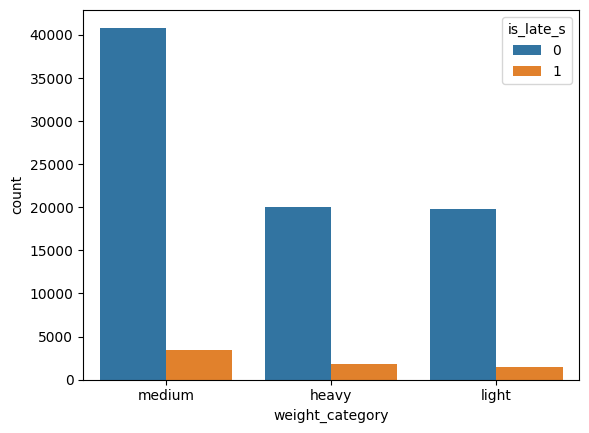

In [138]:
sns.countplot(x=tr_data['weight_category'], hue=tr_data['is_late_s'])

In [139]:
pw_late = tr_data[tr_data.is_late_s == 1]['weight_category'].value_counts().rename_axis('weight_category').reset_index(name='late_counts')
pw_all = tr_data['weight_category'].value_counts().rename_axis('weight_category').reset_index(name='all_counts')
pw_late['all_count'] = pw_late.weight_category.map(pw_all.set_index('weight_category')['all_counts'])
pw_late['late_prop'] =pw_late['late_counts'] / pw_late['all_count']
pw_list =pw_late['weight_category'].to_list()
pw_late

weight_category  late_counts  all_count  late_prop
0          medium         3392      44246   0.076662
1           heavy         1856      21880   0.084826
2           light         1490      21292   0.069979

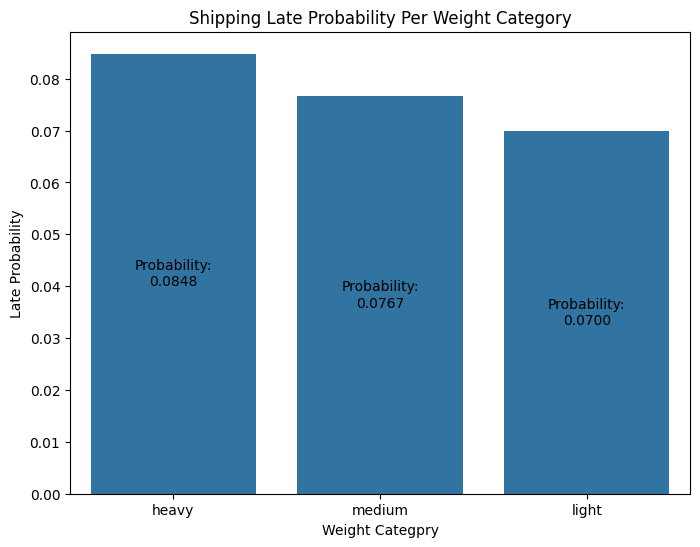

In [140]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(x='weight_category', y='late_prop', data=pw_late, capsize=0.2, ax=ax, order=pw_late.sort_values(by='late_prop', ascending=False).weight_category).set(title='Shipping Late Probability Per Weight Category')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Probability:\n%.4f', label_type='center')

ax.set(xlabel='Weight Categpry')
ax.set(ylabel='Late Probability')
plt.show()

In [141]:
#It is known that goods with the lowest weight have the smallest risk of delay



In [142]:
def pwLate(data):
    if(data in pw_list):
        return pw_late[pw_late.weight_category == data]['late_prop'].values[0]
    else:
        return 0

tr_data['pw_late_prop'] = tr_data['weight_category'].apply(pwLate)
tr_data


order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [143]:
ts_data['pw_late_prop'] = ts_data['weight_category'].apply(pwLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [144]:
tr_data['shipping_charges'].describe()


count    87418.000000
mean        44.243194
std         37.657388
min          0.000000
25%         20.040000
50%         35.010000
75%         57.140000
max        409.680000
Name: shipping_charges, dtype: float64

In [145]:
sectil = tr_data['shipping_charges'].quantile([0.25]).values[0]
thirtil = tr_data['shipping_charges'].quantile([0.75]).values[0]
tr_data['freight_category'] = tr_data['shipping_charges'].apply(lambda x:'expensive' if x>=thirtil else ('medium' if x>=sectil and x<thirtil else 'cheap'))
tr_data.head()

order_id   customer_id order_purchase_timestamp   order_approved_at  \
0  Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54 2017-10-22 19:14:13   
1  v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31 2018-06-20 22:20:20   
2  Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31 2018-02-17 16:15:35   
3  bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29 2018-08-18 18:15:16   
4  Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04 2017-12-22 17:31:31   

  order_delivered_timestamp order_estimated_delivery_date  \
0       2017-10-26 22:19:52                    2017-11-09   
1       2018-07-03 22:51:22                    2018-07-24   
2       2018-02-27 01:29:50                    2018-03-08   
3       2018-08-27 20:03:51                    2018-09-19   
4       2018-01-05 19:22:49                    2018-01-18   

   customer_zip_code_prefix       customer_city customer_state    product_id  \
0                     58125     varzea paulista             SP  90K0C1fIyQUf   
1                      3112  armacao dos buzios             RJ  qejhpMGGVcsl   
2                      4119             jandira             SP  qUS5d2pEAyxJ   
3                     18212          uberlandia             MG  639iGvMyv0De   
4                     88868            ilhabela             SP  1lycYGcsic2F   

      seller_id   price  shipping_charges  payment_sequential payment_type  \
0  ZWM05J9LcBSF  223.51             84.65                   1  credit_card   
1  IjlpYfhUbRQs  170.80             23.79                   1  credit_card   
2  77p2EYxcM9MD   64.40             17.38                   1  credit_card   
3  jWzS0ayv9TGf  264.50             30.72                   1  credit_card   
4  l1pYW6GBnPMr  779.90             30.66                   1  credit_card   

   payment_installments  payment_value     product_category_name  \
0                     1         259.14                      toys   
1                     8         382.39             watches_gifts   
2                     4         249.25  costruction_tools_garden   
3                     2          27.79                      toys   
4                     1          76.15                      toys   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             491.0               19.0               12.0              16.0   
1             440.0               18.0               14.0              17.0   
2            2200.0               16.0               16.0              16.0   
3            1450.0               68.0                3.0              48.0   
4             300.0               17.0                4.0              12.0   

   is_late_s  prod_vol vol_category  vol_late_prop  purchase_day_of_week  \
0          0    3648.0       medium        0.07457                     6   
1          0    4284.0       medium        0.07457                     2   
2          0    4096.0       medium        0.07457                     4   
3          0    9792.0       medium        0.07457                     5   
4          0     816.0        small        0.07616                     4   

   approved_day_of_week  pur_late_prop  app_late_prop  purchase_hour  \
0                     6       0.075346       0.072117             18   
1                     2       0.074620       0.079129             21   
2                     5       0.076462       0.072244             16   
3                     5       0.069131       0.072244             18   
4                     4       0.076462       0.082739             16   

   approved_hour  purh_late_prop  apph_late_prop  approved_min_purchase  \
0             19        0.080792        0.073792                      0   
1             22        0.086663        0.073651                      0   
2             16        0.078200        0.071649                     23   
3             18        0.080792        0.083032                      0   
4             17        0.078200        0.071161                      0 

In [146]:
ts_data['freight_category'] = ts_data['shipping_charges'].apply(lambda x:'expensive' if x>=thirtil else ('medium' if x>=sectil and x<thirtil else 'cheap'))
ts_data.head()

order_id   customer_id order_purchase_timestamp   order_approved_at  \
0  u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57 2017-11-18 12:46:08   
1  ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12 2018-06-02 20:12:23   
2  I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30 2018-01-09 07:24:03   
3  bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46 2017-03-10 10:24:46   
4  CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07 2017-12-05 04:13:30   

   customer_zip_code_prefix        customer_city customer_state    product_id  \
0                      6020              goiania             GO  1slxdgbgWFax   
1                     23020               viamao             RS  77PgsiElQLeB   
2                     75094             campinas             SP  QVlD26X1y7NI   
3                     89284  santana de parnaiba             SP  yWlFGkKYfrpa   
4                     39810             aripuana             MT  h6MCbrwh5kiC   

      seller_id    price  shipping_charges  payment_sequential payment_type  \
0  3jwvL6ihC45G    24.10             20.90                   1  credit_card   
1  GlLj704QXlDB    42.89             12.28                   1  credit_card   
2  V3iKL8r9W9NR    50.21             67.11                   1       wallet   
3  RNBdBKsXebna    89.10             62.05                   1  credit_card   
4  5Ja2lH0N2OZt  2139.99              9.41                   1       wallet   

   payment_installments  payment_value product_category_name  \
0                     2         155.77                  toys   
1                     1           4.07           electronics   
2                     1         381.59       furniture_decor   
3                     3          14.76                  toys   
4                     1         284.09                  toys   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0              50.0               16.0                5.0              11.0   
1             200.0               21.0                7.0              14.0   
2            1000.0              100.0                5.0              20.0   
3            8950.0               40.0               30.0              40.0   
4            2301.0               32.0               35.0              34.0   

   prod_vol vol_category  vol_late_prop  purchase_day_of_week  \
0     880.0        small       0.076160                     5   
1    2058.0        small       0.076160                     5   
2   10000.0       medium       0.074570                     0   
3   48000.0        large       0.083013                     4   
4   38080.0        large       0.083013                     5   

   approved_day_of_week  pur_late_prop  app_late_prop  purchase_hour  \
0                     5       0.069131       0.072244             12   
1                     5       0.069131       0.072244             17   
2                     1       0.087031       0.077687             11   
3                     4       0.076462       0.082739             10   
4                     1       0.069131       0.077687             10   

   approved_hour  purh_late_prop  apph_late_prop  approved_min_purchase  \
0             12        0.081045        0.080988                      0   
1             20        0.075763        0.075046                      2   
2              7        0.072013        0.081587                     20   
3             10        0.068538        0.068203                      0   
4              4        0.068538        0.070580                     66   

  apmpu_category  apmpu_late_prop price_category  price_late_prop  \
0           fast         0.072185          cheap         0.077597   
1           fast         0.072185          cheap         0.077597   
2           slow         0.091217          cheap         0.077597   
3           fast         0.072185     affordable         0.077921   
4           slow         0.091217      expensive         0.074933   

   install_late_prop  pt_l

<Axes: xlabel='freight_category', ylabel='count'>

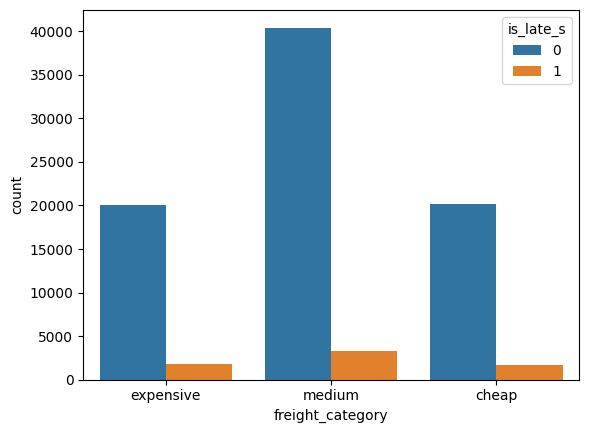

In [147]:
sns.countplot(x=tr_data['freight_category'], hue=tr_data['is_late_s'])


In [148]:
sc_late = tr_data[tr_data.is_late_s == 1]['freight_category'].value_counts().rename_axis('freight_category').reset_index(name='late_counts')
sc_all = tr_data['freight_category'].value_counts().rename_axis('freight_category').reset_index(name='all_counts')
sc_late['all_count'] = sc_late.freight_category.map(sc_all.set_index('freight_category')['all_counts'])
sc_late['late_prop'] =sc_late['late_counts'] / sc_late['all_count']
sc_list =sc_late['freight_category'].to_list()
sc_late

freight_category  late_counts  all_count  late_prop
0           medium         3249      43679   0.074384
1        expensive         1791      21886   0.081833
2            cheap         1698      21853   0.077701

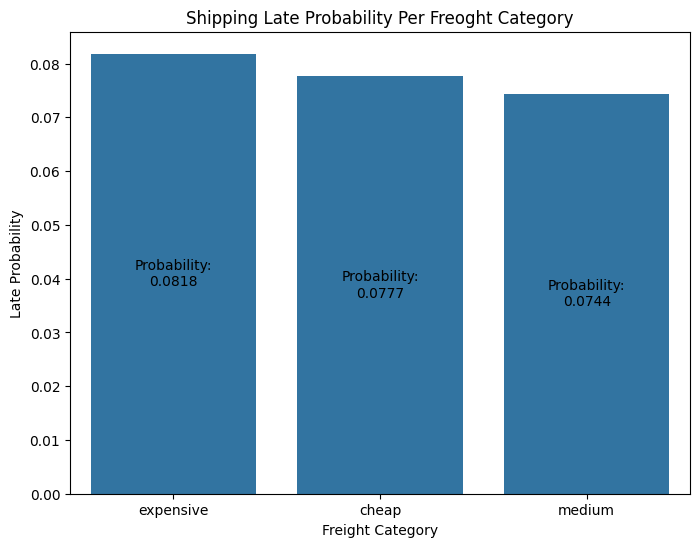

In [149]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(x='freight_category', y='late_prop', data=sc_late, capsize=0.2, ax=ax, order=sc_late.sort_values(by='late_prop', ascending=False).freight_category).set(title='Shipping Late Probability Per Freoght Category')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Probability:\n%.4f', label_type='center')

ax.set(xlabel='Freight Category')
ax.set(ylabel='Late Probability')
plt.show()


In [150]:
#It is known that expensive shipping costs have the highest risk of delays


In [151]:
def scLate(data):
    if(data in sc_list):
        return sc_late[sc_late.freight_category == data]['late_prop'].values[0]
    else:
        return 0

tr_data['sc_late_prop'] = tr_data['freight_category'].apply(scLate)
tr_data


order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [152]:
ts_data['sc_late_prop'] = ts_data['freight_category'].apply(scLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

<Axes: xlabel='payment_sequential', ylabel='count'>

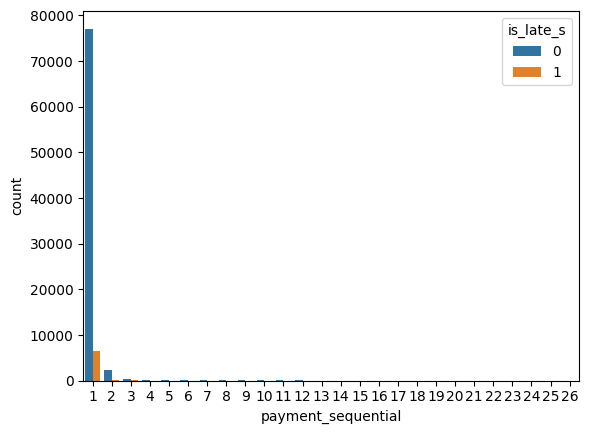

In [153]:
sns.countplot(x=tr_data['payment_sequential'], hue=tr_data['is_late_s'])


In [154]:
ps_late = tr_data[tr_data.is_late_s == 1]['payment_sequential'].value_counts().rename_axis('payment_sequential').reset_index(name='late_counts')
ps_all = tr_data['payment_sequential'].value_counts().rename_axis('payment_sequential').reset_index(name='all_counts')
ps_late['all_count'] = ps_late.payment_sequential.map(ps_all.set_index('payment_sequential')['all_counts'])
ps_late['late_prop'] =ps_late['late_counts'] / ps_late['all_count']
ps_list =ps_late['payment_sequential'].to_list()
# ps_list['seq'] = ps_list['payment_sequential'].map({1: '1', 2: '2', 3: '3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8',9:'9',10:'10',11:'11',12:'12',13:'13',14:'14',15:'15',16:'16',17:'17',18:'18',19:'19',20:'20',21:'21',22:'22',23:'23',24:'24'})
ps_late

payment_sequential  late_counts  all_count  late_prop
0                   1         6485      83593   0.077578
1                   2          185       2534   0.073007
2                   3           36        486   0.074074
3                   4           11        232   0.047414
4                   6            8         98   0.081633
5                   5            8        150   0.053333
6                   7            4         78   0.051282
7                   8            1         44   0.022727

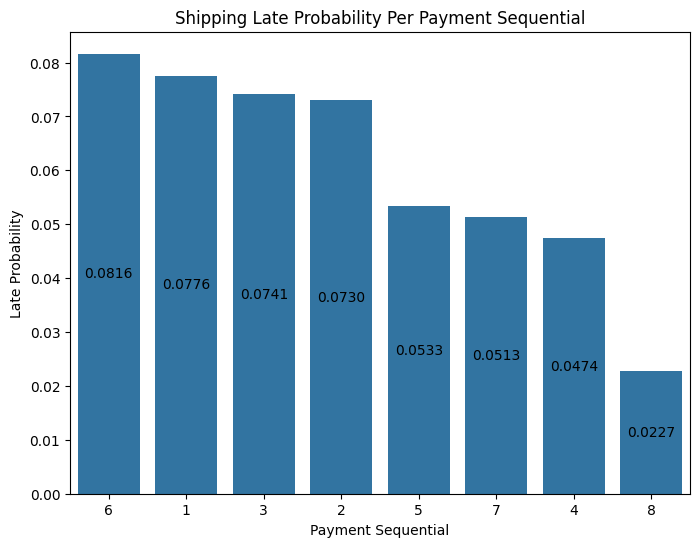

In [155]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(x='payment_sequential', y='late_prop', data=ps_late, capsize=0.2, ax=ax, order=ps_late.sort_values(by='late_prop', ascending=False).payment_sequential).set(title='Shipping Late Probability Per Payment Sequential')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='%.4f', label_type='center')

ax.set(xlabel='Payment Sequential')
ax.set(ylabel='Late Probability')
plt.show()

In [156]:
#It is known that the 5th installment has the highest risk of delay



In [157]:
def psLate(data):
    if(data in ps_list):
        return ps_late[ps_late.payment_sequential == data]['late_prop'].values[0]
    else:
        return 0

tr_data['ps_late_prop'] = tr_data['payment_sequential'].apply(psLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [158]:
ts_data['ps_late_prop'] = ts_data['payment_sequential'].apply(psLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [159]:
zip_late = tr_data[tr_data.is_late_s == 1]['customer_zip_code_prefix'].value_counts().rename_axis('zip_code_prefix').reset_index(name='late_counts')
zip_late

zip_code_prefix  late_counts
0               23028           30
1               62190           19
2               72880           18
3               44670           17
4                4068           16
...               ...          ...
3856             2233            1
3857            93225            1
3858             4437            1
3859             4171            1
3860             5453            1

[3861 rows x 2 columns]

In [160]:
sectil = zip_late['late_counts'].quantile([0.25]).values[0]
thirtil = zip_late['late_counts'].quantile([0.75]).values[0]

zip_late['dist_late'] = zip_late['late_counts'].apply(lambda x:'often' if x>=thirtil else ('moderate' if x>=sectil and x<thirtil else 'rare'))

zip_late

zip_code_prefix  late_counts dist_late
0               23028           30     often
1               62190           19     often
2               72880           18     often
3               44670           17     often
4                4068           16     often
...               ...          ...       ...
3856             2233            1  moderate
3857            93225            1  moderate
3858             4437            1  moderate
3859             4171            1  moderate
3860             5453            1  moderate

[3861 rows x 3 columns]

In [161]:
zip_all = tr_data['customer_zip_code_prefix'].value_counts().rename_axis('zip_code_prefix').reset_index(name='all_counts')
zip_late['all_count'] = zip_late.zip_code_prefix.map(zip_all.set_index('zip_code_prefix')['all_counts'])
zip_late

zip_code_prefix  late_counts dist_late  all_count
0               23028           30     often        100
1               62190           19     often        123
2               72880           18     often         23
3               44670           17     often         54
4                4068           16     often        118
...               ...          ...       ...        ...
3856             2233            1  moderate         16
3857            93225            1  moderate          4
3858             4437            1  moderate         12
3859             4171            1  moderate          2
3860             5453            1  moderate          5

[3861 rows x 4 columns]

In [162]:
zip_late['late_prop'] = zip_late['late_counts'] / zip_late['all_count']
zip_late['zip_code_prefix'] = zip_late['zip_code_prefix'].astype('category')
zip_late

zip_code_prefix  late_counts dist_late  all_count  late_prop
0              23028           30     often        100   0.300000
1              62190           19     often        123   0.154472
2              72880           18     often         23   0.782609
3              44670           17     often         54   0.314815
4               4068           16     often        118   0.135593
...              ...          ...       ...        ...        ...
3856            2233            1  moderate         16   0.062500
3857           93225            1  moderate          4   0.250000
3858            4437            1  moderate         12   0.083333
3859            4171            1  moderate          2   0.500000
3860            5453            1  moderate          5   0.200000

[3861 rows x 5 columns]

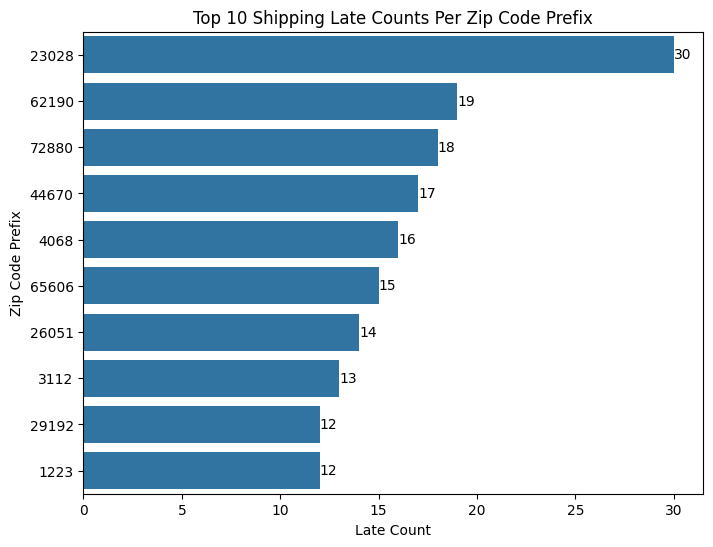

In [163]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(y='zip_code_prefix', x='late_counts', data=zip_late, capsize=0.2, ax=ax, order=zip_late[:10].sort_values(by='late_counts', ascending=False).zip_code_prefix).set(title='Top 10 Shipping Late Counts Per Zip Code Prefix')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='%.0f', label_type='edge')

ax.set(ylabel='Zip Code Prefix')
ax.set(xlabel='Late Count')
plt.show()

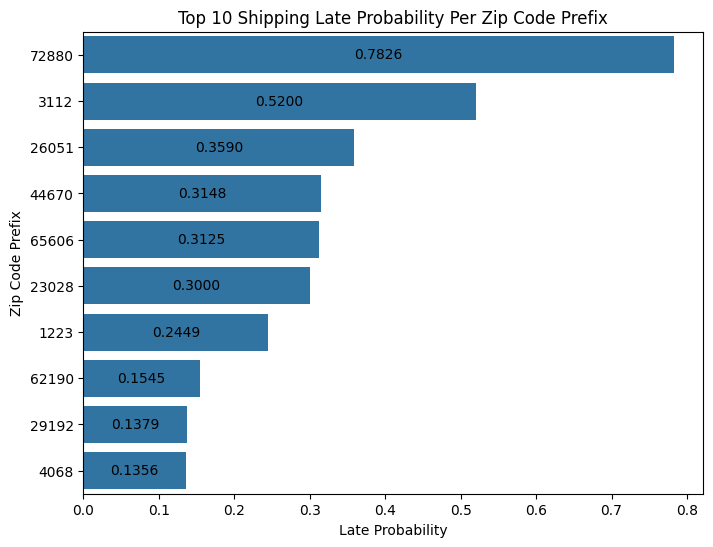

In [164]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(y='zip_code_prefix', x='late_prop', data=zip_late, capsize=0.2, ax=ax, order=zip_late[:10].sort_values(by='late_prop', ascending=False).zip_code_prefix).set(title='Top 10 Shipping Late Probability Per Zip Code Prefix')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='%.4f', label_type='center')

ax.set(ylabel='Zip Code Prefix')
ax.set(xlabel='Late Probability')
plt.show()

In [165]:
zip_list = zip_late['zip_code_prefix'].to_list()

def propZipLate(data):
    if(data in zip_list):
        return zip_late[zip_late.zip_code_prefix == data]['late_prop'].values[0]
    else:
        return 0

tr_data['zip_late_prop'] = tr_data['customer_zip_code_prefix'].apply(propZipLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [166]:
ts_data['zip_late_prop'] = ts_data['customer_zip_code_prefix'].apply(propZipLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [167]:
def countZipLate(data):
    if(data in zip_list):
        return zip_late[zip_late.zip_code_prefix == data]['late_counts'].values[0]
    else:
        return 0

tr_data['zip_late_count'] = tr_data['customer_zip_code_prefix'].apply(countZipLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [168]:
ts_data['zip_late_count'] = ts_data['customer_zip_code_prefix'].apply(countZipLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [169]:
often = zip_late[zip_late.dist_late == 'often']['zip_code_prefix'].to_list()
moderate = zip_late[zip_late.dist_late == 'moderate']['zip_code_prefix'].to_list()
rare = zip_late[zip_late.dist_late == 'rare']['zip_code_prefix'].to_list()

In [170]:
def zipLate(data):
    if(data in often):
        return 'often'
    elif(data in moderate):
        return 'moderate'
    elif(data in rare):
        return 'rare'
    else:
        return 'never'

tr_data['zip_late_freq'] = tr_data['customer_zip_code_prefix'].apply(zipLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [171]:
ts_data['zip_late_freq'] = ts_data['customer_zip_code_prefix'].apply(zipLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [172]:
def hasLate(data):
    if(data == 'never'):
        return 0
    else:
        return 1
tr_data['zip_ever_late'] = tr_data['zip_late_freq'].apply(hasLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [173]:
ts_data['zip_ever_late'] = ts_data['zip_late_freq'].apply(hasLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [174]:
city_late = tr_data[tr_data.is_late_s == 1]['customer_city'].value_counts().rename_axis('customer_city').reset_index(name='late_counts')
city_late

customer_city  late_counts
0          sao paulo          816
1     rio de janeiro          659
2           salvador          205
3     belo horizonte          147
4       porto alegre          147
...              ...          ...
1104     andrelandia            1
1105      maranguape            1
1106     jaboticabal            1
1107       mara rosa            1
1108        macaubas            1

[1109 rows x 2 columns]

In [175]:
city_all = tr_data['customer_city'].value_counts().rename_axis('customer_city').reset_index(name='all_counts')
city_late['all_count'] = city_late.customer_city.map(city_all.set_index('customer_city')['all_counts'])
city_late['late_prop'] = city_late['late_counts'] / city_late['all_count']
city_late

customer_city  late_counts  all_count  late_prop
0          sao paulo          816      14020   0.058203
1     rio de janeiro          659       6064   0.108674
2           salvador          205       1115   0.183857
3     belo horizonte          147       2380   0.061765
4       porto alegre          147       1290   0.113953
...              ...          ...        ...        ...
1104     andrelandia            1          4   0.250000
1105      maranguape            1          1   1.000000
1106     jaboticabal            1         44   0.022727
1107       mara rosa            1          2   0.500000
1108        macaubas            1         11   0.090909

[1109 rows x 4 columns]

In [176]:
city_late.describe()


late_counts     all_count    late_prop
count  1109.000000   1109.000000  1109.000000
mean      6.075744     69.039675     0.269280
std      33.970624    479.291720     0.292686
min       1.000000      1.000000     0.007874
25%       1.000000      4.000000     0.071429
50%       1.000000     12.000000     0.142857
75%       3.000000     41.000000     0.333333
max     816.000000  14020.000000     1.000000

In [177]:
sectil = city_late['late_counts'].quantile([0.25]).values[0]
thirtil = city_late['late_counts'].quantile([0.75]).values[0]
city_late['dist_late'] = city_late['late_counts'].apply(lambda x:'often' if x>=thirtil else ('moderate' if x>=sectil and x<thirtil else 'rare'))

city_late

customer_city  late_counts  all_count  late_prop dist_late
0          sao paulo          816      14020   0.058203     often
1     rio de janeiro          659       6064   0.108674     often
2           salvador          205       1115   0.183857     often
3     belo horizonte          147       2380   0.061765     often
4       porto alegre          147       1290   0.113953     often
...              ...          ...        ...        ...       ...
1104     andrelandia            1          4   0.250000  moderate
1105      maranguape            1          1   1.000000  moderate
1106     jaboticabal            1         44   0.022727  moderate
1107       mara rosa            1          2   0.500000  moderate
1108        macaubas            1         11   0.090909  moderate

[1109 rows x 5 columns]

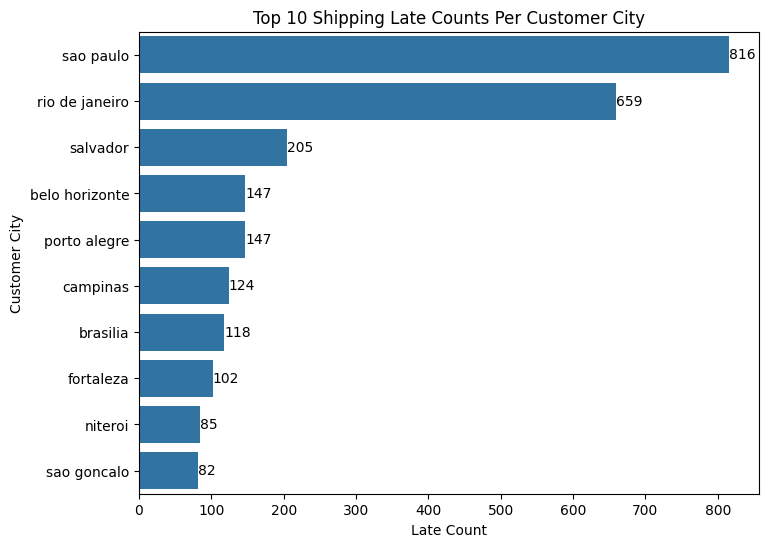

In [178]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(y='customer_city', x='late_counts', data=city_late, capsize=0.2, ax=ax, order=city_late[:10].sort_values(by='late_counts', ascending=False).customer_city).set(title='Top 10 Shipping Late Counts Per Customer City')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='%.0f', label_type='edge')

ax.set(ylabel='Customer City')
ax.set(xlabel='Late Count')
plt.show()

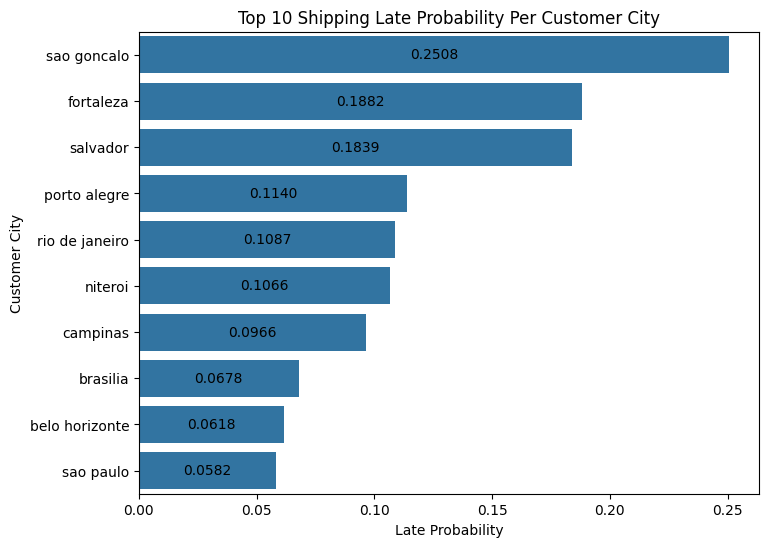

In [179]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(y='customer_city', x='late_prop', data=city_late, capsize=0.2, ax=ax, order=city_late[:10].sort_values(by='late_prop', ascending=False).customer_city).set(title='Top 10 Shipping Late Probability Per Customer City')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='%.4f', label_type='center')

ax.set(ylabel='Customer City')
ax.set(xlabel='Late Probability')
plt.show()

In [180]:
#It is known that the top 10 customer cities where deliveries are most at risk of being late

In [181]:
city_list = city_late['customer_city'].to_list()

def propCityLate(data):
    if(data in city_list):
        return city_late[city_late.customer_city == data]['late_prop'].values[0]
    else:
        return 0

tr_data['city_late_prop'] = tr_data['customer_city'].apply(propCityLate)
tr_data


order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [182]:
ts_data['city_late_prop'] = ts_data['customer_city'].apply(propCityLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [183]:
def countCityLate(data):
    if(data in city_list):
        return city_late[city_late.customer_city == data]['late_counts'].values[0]
    else:
        return 0

tr_data['city_late_count'] = tr_data['customer_city'].apply(countCityLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [184]:
ts_data['city_late_count'] = ts_data['customer_city'].apply(countCityLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [185]:
c_often = city_late[city_late.dist_late == 'often']['customer_city'].to_list()
c_moderate = city_late[city_late.dist_late == 'moderate']['customer_city'].to_list()
c_rare = city_late[city_late.dist_late == 'rare']['customer_city'].to_list()

def cityLate(data):
    if(data in c_often):
        return 'often'
    elif(data in c_moderate):
        return 'moderate'
    elif(data in c_rare):
        return 'rare'
    else:
        return 'never'

tr_data['city_late_freq'] = tr_data['customer_city'].apply(cityLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [186]:
ts_data['city_late_freq'] = ts_data['customer_city'].apply(cityLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [187]:
tr_data['city_ever_late'] = tr_data['city_late_freq'].apply(hasLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [188]:
ts_data['city_ever_late'] = ts_data['city_late_freq'].apply(hasLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [189]:
#State Focus

In [190]:
state_late = tr_data[tr_data.is_late_s == 1]['customer_state'].value_counts().rename_axis('customer_state').reset_index(name='late_counts')
state_late

customer_state  late_counts
0              SP         2054
1              RJ         1428
2              MG          549
3              BA          421
4              RS          321
5              SC          295
6              PR          211
7              ES          206
8              CE          167
9              PE          151
10             GO          142
11             MA          125
12             DF          118
13             PA           93
14             AL           79
15             PI           67
16             MS           63
17             PB           54
18             MT           50
19             SE           47
20             RN           41
21             TO           31
22             RO           11
23             AC            4
24             RR            4
25             AM            4
26             AP            2

In [191]:
state_all = tr_data['customer_state'].value_counts().rename_axis('customer_state').reset_index(name='all_counts')
state_late['all_count'] = state_late.customer_state.map(state_all.set_index('customer_state')['all_counts'])
state_late['late_prop'] = state_late['late_counts'] / state_late['all_count']
state_late

customer_state  late_counts  all_count  late_prop
0              SP         2054      37093   0.055374
1              RJ         1428      11250   0.126933
2              MG          549      10170   0.053982
3              BA          421       3014   0.139681
4              RS          321       4853   0.066145
5              SC          295       3161   0.093325
6              PR          211       4451   0.047405
7              ES          206       1777   0.115926
8              CE          167       1100   0.151818
9              PE          151       1445   0.104498
10             GO          142       1816   0.078194
11             MA          125        603   0.207297
12             DF          118       1755   0.067236
13             PA           93        799   0.116395
14             AL           79        325   0.243077
15             PI           67        409   0.163814
16             MS           63        631   0.099842
17             PB           54        480   0.112500
18             MT           50        816   0.061275
19             SE           47        297   0.158249
20             RN           41        377   0.108753
21             TO           31        243   0.127572
22             RO           11        237   0.046414
23             AC            4         74   0.054054
24             RR            4         37   0.108108
25             AM            4        138   0.028986
26             AP            2         67   0.029851

In [192]:
state_late.describe()


late_counts     all_count  late_prop
count    27.000000     27.000000  27.000000
mean    249.555556   3237.703704   0.102471
std     458.528192   7340.788303   0.052599
min       2.000000     37.000000   0.028986
25%      44.000000    311.000000   0.058324
50%      93.000000    799.000000   0.104498
75%     208.500000   2415.000000   0.127253
max    2054.000000  37093.000000   0.243077

In [193]:
sectil = state_late['late_counts'].quantile([0.25]).values[0]
thirtil = state_late['late_counts'].quantile([0.75]).values[0]
state_late['dist_late'] = state_late['late_counts'].apply(lambda x:'often' if x>=thirtil else ('moderate' if x>=sectil and x<thirtil else 'rare'))
state_late

customer_state  late_counts  all_count  late_prop dist_late
0              SP         2054      37093   0.055374     often
1              RJ         1428      11250   0.126933     often
2              MG          549      10170   0.053982     often
3              BA          421       3014   0.139681     often
4              RS          321       4853   0.066145     often
5              SC          295       3161   0.093325     often
6              PR          211       4451   0.047405     often
7              ES          206       1777   0.115926  moderate
8              CE          167       1100   0.151818  moderate
9              PE          151       1445   0.104498  moderate
10             GO          142       1816   0.078194  moderate
11             MA          125        603   0.207297  moderate
12             DF          118       1755   0.067236  moderate
13             PA           93        799   0.116395  moderate
14             AL           79        325   0.243077  moderate
15             PI           67        409   0.163814  moderate
16             MS           63        631   0.099842  moderate
17             PB           54        480   0.112500  moderate
18             MT           50        816   0.061275  moderate
19             SE           47        297   0.158249  moderate
20             RN           41        377   0.108753      rare
21             TO           31        243   0.127572      rare
22             RO           11        237   0.046414      rare
23             AC            4         74   0.054054      rare
24             RR            4         37   0.108108      rare
25             AM            4        138   0.028986      rare
26             AP            2         67   0.029851      rare

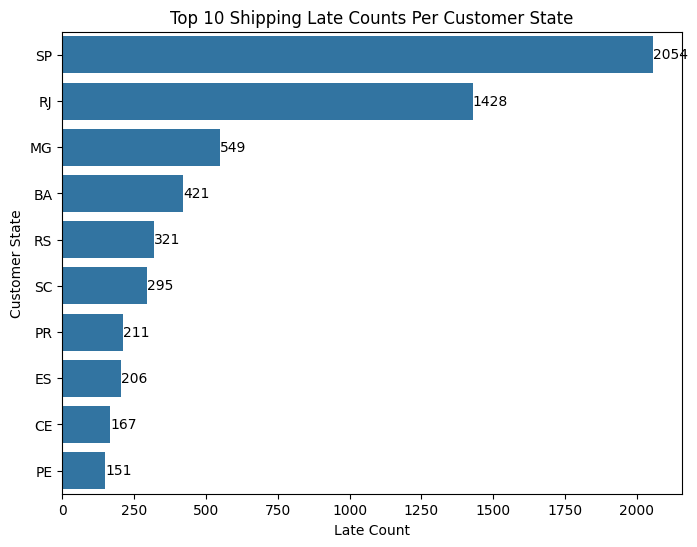

In [194]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(y='customer_state', x='late_counts', data=state_late, capsize=0.2, ax=ax, order=state_late[:10].sort_values(by='late_counts', ascending=False).customer_state).set(title='Top 10 Shipping Late Counts Per Customer State')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='%.0f', label_type='edge')

ax.set(ylabel='Customer State')
ax.set(xlabel='Late Count')
plt.show()


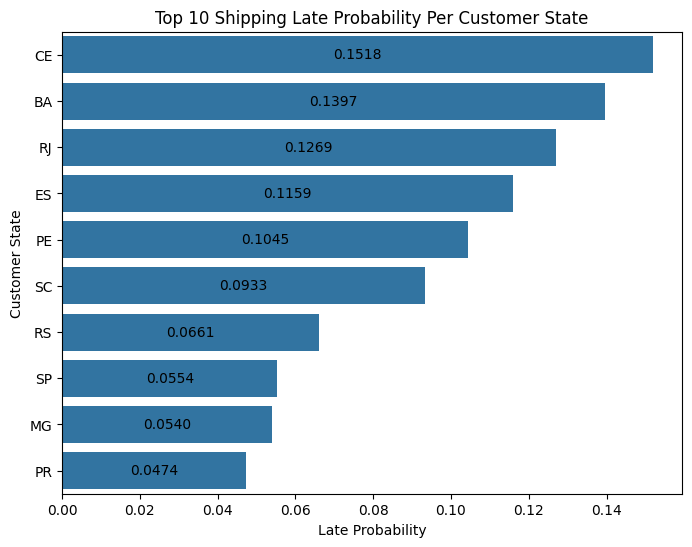

In [195]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(y='customer_state', x='late_prop', data=state_late, capsize=0.2, ax=ax, order=state_late[:10].sort_values(by='late_prop', ascending=False).customer_state).set(title='Top 10 Shipping Late Probability Per Customer State')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='%.4f', label_type='center')

ax.set(ylabel='Customer State')
ax.set(xlabel='Late Probability')
plt.show()

In [196]:
state_list = state_late['customer_state'].to_list()

def propStateLate(data):
    if(data in state_list):
        return state_late[state_late.customer_state == data]['late_prop'].values[0]
    else:
        return 0

tr_data['state_late_prop'] = tr_data['customer_state'].apply(propStateLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [197]:
ts_data['state_late_prop'] = ts_data['customer_state'].apply(propStateLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [198]:
def countStateLate(data):
    if(data in state_list):
        return state_late[state_late.customer_state == data]['late_counts'].values[0]
    else:
        return 0

tr_data['state_late_count'] = tr_data['customer_state'].apply(countStateLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [199]:
ts_data['state_late_count'] = ts_data['customer_state'].apply(countStateLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [203]:
s_often = state_late[state_late.dist_late == 'often']['customer_state'].to_list()
s_moderate = state_late[state_late.dist_late == 'moderate']['customer_state'].to_list()
s_rare = state_late[state_late.dist_late == 'rare']['customer_state'].to_list()

def stateLate(data):
    if(data in s_often):
        return 'often'
    elif(data in s_moderate):
        return 'moderate'
    elif(data in s_rare):
        return 'rare'
    else:
        return 'never'

tr_data['state_late_freq'] = tr_data['customer_state'].apply(stateLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [204]:
ts_data['state_late_freq'] = ts_data['customer_state'].apply(stateLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [205]:
tr_data['state_ever_late'] = tr_data['state_late_freq'].apply(hasLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [206]:
ts_data['state_ever_late'] = ts_data['state_late_freq'].apply(hasLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [207]:
tr_data[tr_data['state_ever_late'] == 0]


Empty DataFrame
Columns: [order_id, customer_id, order_purchase_timestamp, order_approved_at, order_delivered_timestamp, order_estimated_delivery_date, customer_zip_code_prefix, customer_city, customer_state, product_id, seller_id, price, shipping_charges, payment_sequential, payment_type, payment_installments, payment_value, product_category_name, product_weight_g, product_length_cm, product_height_cm, product_width_cm, is_late_s, prod_vol, vol_category, vol_late_prop, purchase_day_of_week, approved_day_of_week, pur_late_prop, app_late_prop, purchase_hour, approved_hour, purh_late_prop, apph_late_prop, approved_min_purchase, apmpu_category, apmpu_late_prop, price_category, price_late_prop, install_late_prop, pt_late_prop, weight_category, pw_late_prop, freight_category, sc_late_prop, ps_late_prop, zip_late_prop, zip_late_count, zip_late_freq, zip_ever_late, city_late_prop, city_late_count, city_late_freq, city_ever_late, state_late_prop, state_late_count, state_late_freq, state_ever_late]
Index: []

In [208]:
ts_data[ts_data['state_ever_late'] == 0]


Empty DataFrame
Columns: [order_id, customer_id, order_purchase_timestamp, order_approved_at, customer_zip_code_prefix, customer_city, customer_state, product_id, seller_id, price, shipping_charges, payment_sequential, payment_type, payment_installments, payment_value, product_category_name, product_weight_g, product_length_cm, product_height_cm, product_width_cm, prod_vol, vol_category, vol_late_prop, purchase_day_of_week, approved_day_of_week, pur_late_prop, app_late_prop, purchase_hour, approved_hour, purh_late_prop, apph_late_prop, approved_min_purchase, apmpu_category, apmpu_late_prop, price_category, price_late_prop, install_late_prop, pt_late_prop, weight_category, pw_late_prop, freight_category, sc_late_prop, ps_late_prop, zip_late_prop, zip_late_count, zip_late_freq, zip_ever_late, city_late_prop, city_late_count, city_late_freq, city_ever_late, state_late_prop, state_late_count, state_late_freq, state_ever_late]
Index: []

In [209]:
tr_data = tr_data.drop(['state_ever_late'], axis=1)
tr_data


order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [210]:
ts_data = ts_data.drop(['state_ever_late'], axis=1)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [211]:
seller_late = tr_data[tr_data.is_late_s == 1]['seller_id'].value_counts().rename_axis('seller_id').reset_index(name='late_counts')
seller_late

seller_id  late_counts
0     RKad98cTxhSb          168
1     r7VxefoTVHbb          147
2     coi9xkdo66JI          111
3     EGW4UK5bOeEZ          107
4     K0qPVGdA91KO           99
...            ...          ...
1211  XJ84yr38Bcnt            1
1212  q9r4WZ0jN1Tr            1
1213  Izazx5OLdwb0            1
1214  b4zcM4d4Yza7            1
1215  Xsu3cwPyXHsU            1

[1216 rows x 2 columns]

In [212]:
seller_all = tr_data['seller_id'].value_counts().rename_axis('seller_id').reset_index(name='all_counts')
seller_late['all_count'] = seller_late.seller_id.map(seller_all.set_index('seller_id')['all_counts'])
seller_late['late_prop'] = seller_late['late_counts'] / seller_late['all_count']
seller_late

seller_id  late_counts  all_count  late_prop
0     RKad98cTxhSb          168       1624   0.103448
1     r7VxefoTVHbb          147       1512   0.097222
2     coi9xkdo66JI          111        869   0.127733
3     EGW4UK5bOeEZ          107       1066   0.100375
4     K0qPVGdA91KO           99       1151   0.086012
...            ...          ...        ...        ...
1211  XJ84yr38Bcnt            1         12   0.083333
1212  q9r4WZ0jN1Tr            1         36   0.027778
1213  Izazx5OLdwb0            1         17   0.058824
1214  b4zcM4d4Yza7            1         19   0.052632
1215  Xsu3cwPyXHsU            1          4   0.250000

[1216 rows x 4 columns]

In [213]:
seller_late.describe()


late_counts    all_count    late_prop
count  1216.000000  1216.000000  1216.000000
mean      5.541118    63.450658     0.188379
std      12.091760   141.269089     0.221881
min       1.000000     1.000000     0.007463
25%       1.000000     9.000000     0.058824
50%       2.000000    23.000000     0.111111
75%       5.000000    62.000000     0.214286
max     168.000000  1624.000000     1.000000

In [214]:
# seller_late['dist_late'] = seller_late['late_counts'].apply(lambda x:'sering' if x>=40 else ('lumayan' if x>=2 and x<40 else 'jarang'))
sectil = seller_late['late_counts'].quantile([0.25]).values[0]
thirtil = seller_late['late_counts'].quantile([0.75]).values[0]
seller_late['dist_late'] = seller_late['late_counts'].apply(lambda x:'often' if x>=thirtil else ('moderate' if x>=sectil and x<thirtil else 'rare'))

seller_late

seller_id  late_counts  all_count  late_prop dist_late
0     RKad98cTxhSb          168       1624   0.103448     often
1     r7VxefoTVHbb          147       1512   0.097222     often
2     coi9xkdo66JI          111        869   0.127733     often
3     EGW4UK5bOeEZ          107       1066   0.100375     often
4     K0qPVGdA91KO           99       1151   0.086012     often
...            ...          ...        ...        ...       ...
1211  XJ84yr38Bcnt            1         12   0.083333  moderate
1212  q9r4WZ0jN1Tr            1         36   0.027778  moderate
1213  Izazx5OLdwb0            1         17   0.058824  moderate
1214  b4zcM4d4Yza7            1         19   0.052632  moderate
1215  Xsu3cwPyXHsU            1          4   0.250000  moderate

[1216 rows x 5 columns]

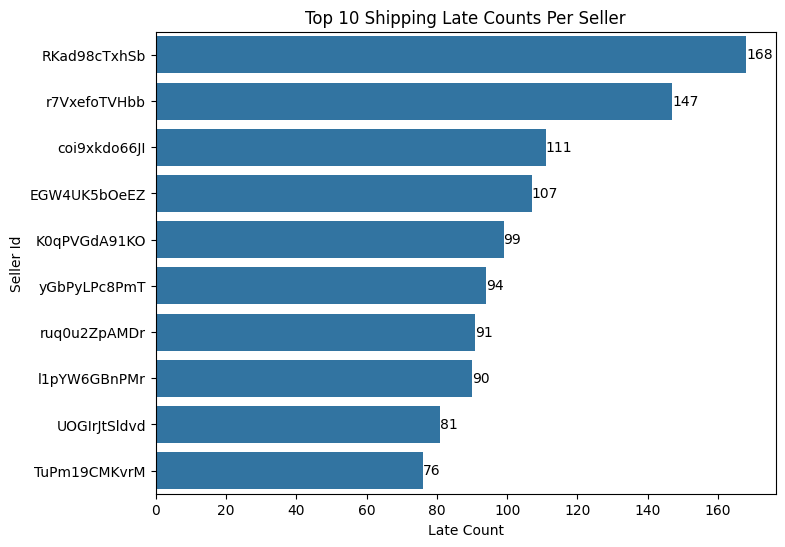

In [215]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(y='seller_id', x='late_counts', data=seller_late, capsize=0.2, ax=ax, order=seller_late[:10].sort_values(by='late_counts', ascending=False).seller_id).set(title='Top 10 Shipping Late Counts Per Seller')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='%.0f', label_type='edge')

ax.set(ylabel='Seller Id')
ax.set(xlabel='Late Count')
plt.show()

In [216]:
#The top 10 sellers with the highest number of delivery delays are known


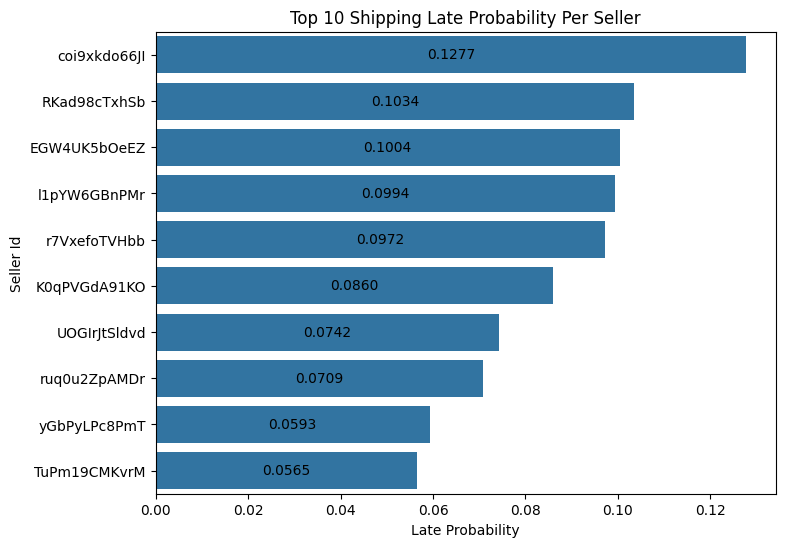

In [217]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(y='seller_id', x='late_prop', data=seller_late, capsize=0.2, ax=ax, order=seller_late[:10].sort_values(by='late_prop', ascending=False).seller_id).set(title='Top 10 Shipping Late Probability Per Seller')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='%.4f', label_type='center')

ax.set(ylabel='Seller Id')
ax.set(xlabel='Late Probability')
plt.show()


In [218]:
#The top 10 sellers with the highest probability of delay are known

In [219]:
seller_list = seller_late['seller_id'].to_list()

def propSellerLate(data):
    if(data in seller_list):
        return seller_late[seller_late.seller_id == data]['late_prop'].values[0]
    else:
        return 0

tr_data['seller_late_prop'] = tr_data['seller_id'].apply(propSellerLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [220]:
ts_data['seller_late_prop'] = ts_data['seller_id'].apply(propSellerLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [221]:
def countSellerLate(data):
    if(data in seller_list):
        return seller_late[seller_late.seller_id == data]['late_counts'].values[0]
    else:
        return 0

tr_data['seller_late_count'] = tr_data['seller_id'].apply(countSellerLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [222]:
ts_data['seller_late_count'] = ts_data['seller_id'].apply(countSellerLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [223]:
sel_often = seller_late[seller_late.dist_late == 'often']['seller_id'].to_list()
sel_moderate = seller_late[seller_late.dist_late == 'moderate']['seller_id'].to_list()
sel_rare = seller_late[seller_late.dist_late == 'rare']['seller_id'].to_list()

def sellerLate(data):
    if(data in sel_often):
        return 'often'
    elif(data in sel_moderate):
        return 'moderate'
    elif(data in sel_rare):
        return 'rare'
    else:
        return 'never'

tr_data['seller_late_freq'] = tr_data['seller_id'].apply(sellerLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [224]:
ts_data['seller_late_freq'] = ts_data['seller_id'].apply(sellerLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [225]:
#Let's analyze late products being delievered
prod_late = tr_data[tr_data.is_late_s == 1]['product_id'].value_counts().rename_axis('product_id').reset_index(name='late_counts')
prod_late

product_id  late_counts
0     9NwzO0Pm0fDM           48
1     SLTlrWtcYt1m           34
2     8IhgV2nH9kXE           30
3     ssZQDTdv1ISb           29
4     UgkSjxoiV9Ev           29
...            ...          ...
4032  OZy3xsEd7x0v            1
4033  SpK7ODDkkY4n            1
4034  nQQDzoEALbyL            1
4035  EOLwSS193KOV            1
4036  v7dpsoYq57yq            1

[4037 rows x 2 columns]

In [226]:
prod_all = tr_data['product_id'].value_counts().rename_axis('product_id').reset_index(name='all_counts')
prod_late['all_count'] = prod_late.product_id.map(prod_all.set_index('product_id')['all_counts'])
prod_late['late_prop'] = prod_late['late_counts'] / prod_late['all_count']
prod_late

product_id  late_counts  all_count  late_prop
0     9NwzO0Pm0fDM           48        383   0.125326
1     SLTlrWtcYt1m           34        319   0.106583
2     8IhgV2nH9kXE           30        106   0.283019
3     ssZQDTdv1ISb           29        150   0.193333
4     UgkSjxoiV9Ev           29        378   0.076720
...            ...          ...        ...        ...
4032  OZy3xsEd7x0v            1          5   0.200000
4033  SpK7ODDkkY4n            1          9   0.111111
4034  nQQDzoEALbyL            1          1   1.000000
4035  EOLwSS193KOV            1          2   0.500000
4036  v7dpsoYq57yq            1          4   0.250000

[4037 rows x 4 columns]

In [227]:
prod_late.describe()


late_counts    all_count    late_prop
count  4037.000000  4037.000000  4037.000000
mean      1.669061     8.893981     0.511138
std       2.092619    21.309756     0.366631
min       1.000000     1.000000     0.008621
25%       1.000000     1.000000     0.166667
50%       1.000000     3.000000     0.428571
75%       2.000000     8.000000     1.000000
max      48.000000   396.000000     1.000000

In [228]:
sectil = prod_late['late_counts'].quantile([0.25]).values[0]
thirtil = prod_late['late_counts'].quantile([0.75]).values[0]
prod_late['dist_late'] = prod_late['late_counts'].apply(lambda x:'often' if x>=thirtil else ('moderate' if x>=sectil and x<thirtil else 'rare'))

prod_late

product_id  late_counts  all_count  late_prop dist_late
0     9NwzO0Pm0fDM           48        383   0.125326     often
1     SLTlrWtcYt1m           34        319   0.106583     often
2     8IhgV2nH9kXE           30        106   0.283019     often
3     ssZQDTdv1ISb           29        150   0.193333     often
4     UgkSjxoiV9Ev           29        378   0.076720     often
...            ...          ...        ...        ...       ...
4032  OZy3xsEd7x0v            1          5   0.200000  moderate
4033  SpK7ODDkkY4n            1          9   0.111111  moderate
4034  nQQDzoEALbyL            1          1   1.000000  moderate
4035  EOLwSS193KOV            1          2   0.500000  moderate
4036  v7dpsoYq57yq            1          4   0.250000  moderate

[4037 rows x 5 columns]

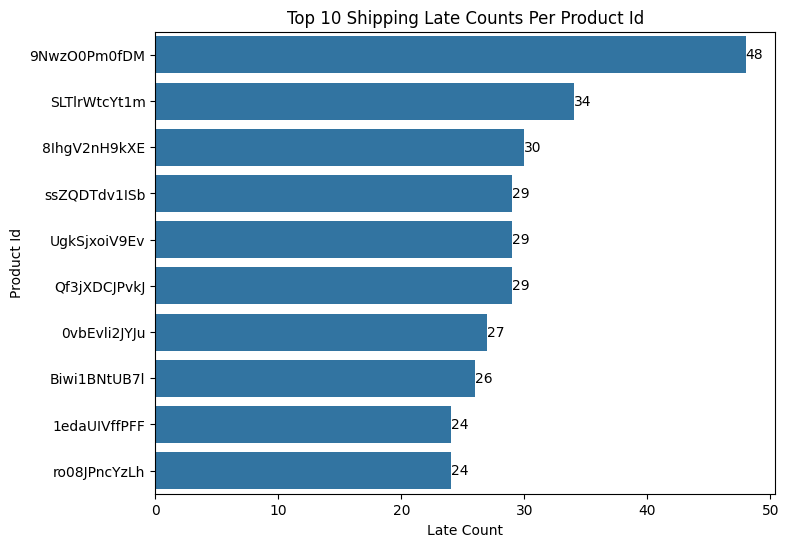

In [229]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(y='product_id', x='late_counts', data=prod_late, capsize=0.2, ax=ax, order=prod_late[:10].sort_values(by='late_counts', ascending=False).product_id).set(title='Top 10 Shipping Late Counts Per Product Id')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='%.0f', label_type='edge')

ax.set(ylabel='Product Id')
ax.set(xlabel='Late Count')
plt.show()


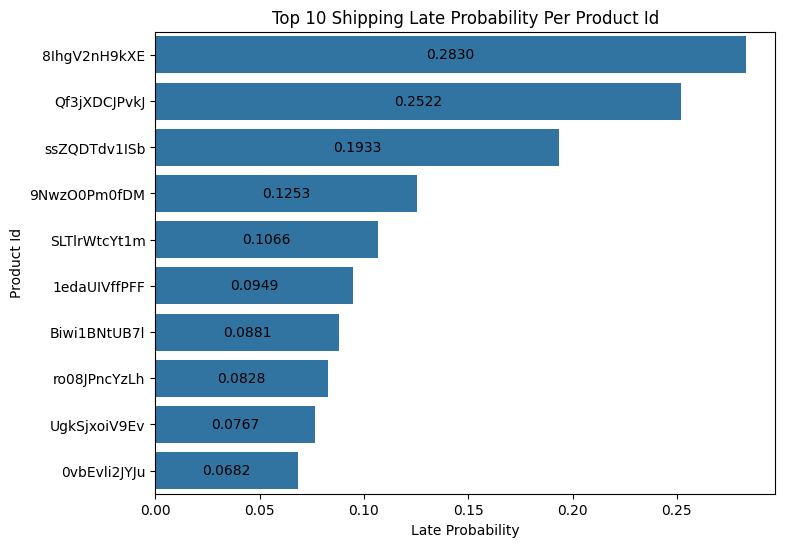

In [230]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(y='product_id', x='late_prop', data=prod_late, capsize=0.2, ax=ax, order=prod_late[:10].sort_values(by='late_prop', ascending=False).product_id).set(title='Top 10 Shipping Late Probability Per Product Id')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='%.4f', label_type='center')

ax.set(ylabel='Product Id')
ax.set(xlabel='Late Probability')
plt.show()

In [231]:
prod_list = prod_late['product_id'].to_list()

def propProductLate(data):
    if(data in prod_list):
        return prod_late[prod_late.product_id == data]['late_prop'].values[0]
    else:
        return 0
tr_data['product_late_prop'] = tr_data['product_id'].apply(propProductLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [232]:
ts_data['product_late_prop'] = ts_data['product_id'].apply(propProductLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [233]:
def countProductLate(data):
    if(data in prod_list):
        return prod_late[prod_late.product_id == data]['late_counts'].values[0]
    else:
        return 0

tr_data['product_late_count'] = tr_data['product_id'].apply(countProductLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [234]:
ts_data['product_late_count'] = ts_data['product_id'].apply(countProductLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [235]:
prod_often = prod_late[prod_late.dist_late == 'often']['product_id'].to_list()
prod_moderate = prod_late[prod_late.dist_late == 'moderate']['product_id'].to_list()
prod_rare = prod_late[prod_late.dist_late == 'rare']['product_id'].to_list()

def productLate(data):
    if(data in prod_often):
        return 'often'
    elif(data in prod_moderate):
        return 'moderate'
    elif(data in prod_rare):
        return 'rare'
    else:
        return 'never'

tr_data['product_late_freq'] = tr_data['product_id'].apply(productLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [236]:
ts_data['product_late_freq'] = ts_data['product_id'].apply(productLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [237]:
#Popularity categories of products

In [238]:
cat_name = tr_data['product_category_name'].value_counts().rename_axis('product_category_name').reset_index(name='counts')
cat_name

product_category_name  counts
0                                toys   65634
1                       health_beauty    2291
2                      bed_bath_table    2119
3                      sports_leisure    1799
4                     furniture_decor    1723
..                                ...     ...
65          fashion_childrens_clothes       2
66              security_and_services       1
67  furniture_mattress_and_upholstery       1
68                     home_comfort_2       1
69                diapers_and_hygiene       1

[70 rows x 2 columns]

In [239]:
cat_late = tr_data[tr_data.is_late_s == 1]['product_category_name'].value_counts().rename_axis('product_category_name').reset_index(name='count_late')
cat_late

product_category_name  count_late
0                                      toys        5084
1                             health_beauty         207
2                            bed_bath_table         170
3                           furniture_decor         133
4                     computers_accessories         133
5                            sports_leisure         121
6                             watches_gifts         102
7                                housewares          68
8                                 telephony          65
9                          office_furniture          63
10                                     auto          59
11                             garden_tools          56
12                              electronics          49
13                                     baby          48
14                                perfumery          46
15                               cool_stuff          42
16                               stationery          31
17                                 pet_shop          26
18                 fashion_bags_accessories          21
19                      musical_instruments          15
20          construction_tools_construction          15
21                        home_construction          12
22                          books_technical          12
23                           consoles_games          12
24                         small_appliances          12
25                          home_appliances          10
26                      luggage_accessories           9
27                   tablets_printing_image           8
28                                    audio           8
29                               food_drink           6
30                construction_tools_lights           6
31                                     food           6
32                 costruction_tools_garden           5
33           industry_commerce_and_business           4
34                                   drinks           4
35                   books_general_interest           4
36                    furniture_living_room           4
37                             market_place           4
38                    fashion_male_clothing           4
39                             home_confort           4
40  kitchen_dining_laundry_garden_furniture           3
41                                computers           3
42                         air_conditioning           3
43                          fixed_telephony           2
44                        home_appliances_2           2
45               agro_industry_and_commerce           2
46                           books_imported           1
47                  fashion_underwear_beach           1
48                                    music           1
49                       christmas_supplies           1

In [240]:
cat_late['all_count'] = cat_late.product_category_name.map(cat_name.set_index('product_category_name')['counts'])

In [241]:
cat_late['late_prop'] = cat_late['count_late'] / cat_late['all_count']
cat_late

product_category_name  count_late  all_count  late_prop
0                                      toys        5084      65634   0.077460
1                             health_beauty         207       2291   0.090354
2                            bed_bath_table         170       2119   0.080227
3                           furniture_decor         133       1723   0.077191
4                     computers_accessories         133       1672   0.079545
5                            sports_leisure         121       1799   0.067260
6                             watches_gifts         102       1175   0.086809
7                                housewares          68       1301   0.052267
8                                 telephony          65        891   0.072952
9                          office_furniture          63        528   0.119318
10                                     auto          59        813   0.072571
11                             garden_tools          56        777   0.072072
12                              electronics          49        538   0.091078
13                                     baby          48        599   0.080134
14                                perfumery          46        651   0.070661
15                               cool_stuff          42        703   0.059744
16                               stationery          31        456   0.067982
17                                 pet_shop          26        388   0.067010
18                 fashion_bags_accessories          21        397   0.052897
19                      musical_instruments          15        146   0.102740
20          construction_tools_construction          15        192   0.078125
21                        home_construction          12        130   0.092308
22                          books_technical          12         78   0.153846
23                           consoles_games          12        146   0.082192
24                         small_appliances          12        112   0.107143
25                          home_appliances          10        212   0.047170
26                      luggage_accessories           9        177   0.050847
27                   tablets_printing_image           8         64   0.125000
28                                    audio           8        105   0.076190
29                               food_drink           6         65   0.092308
30                construction_tools_lights           6         51   0.117647
31                                     food           6         58   0.103448
32                 costruction_tools_garden           5         79   0.063291
33           industry_commerce_and_business           4         48   0.083333
34                                   drinks           4         48   0.083333
35                   books_general_interest           4         78   0.051282
36                    furniture_living_room           4         80   0.050000
37                             market_place           4         79   0.050633
38                    fashion_male_clothing           4         19   0.210526
39                             home_confort           4         40   0.100000
40  kitchen_dining_laundry_garden_furniture           3         52   0.057692
41                                computers           3         53   0.056604
42                         air_conditioning           3         76   0.039474
43                          fixed_telephony           2         46   0.043478
44                        home_appliances_2           2         68   0.029412
45               agro_industry_and_commerce           2         65   0.030769
46                           books_imported           1         10   0.100000
47                  fashion_underwear_beach           1         15   0.066667
48                                    music           1          7   0.142857
49                       christmas_supplies           1         27   0.037037

In [242]:
cat_late.describe()


count_late   all_count  late_prop
count    50.00000     50.0000  50.000000
mean    134.14000   1737.6200   0.079258
std     715.87355   9239.8425   0.032923
min       1.00000      7.0000   0.029412
25%       4.00000     59.5000   0.056876
50%      11.00000    121.0000   0.076691
75%      48.75000    638.0000   0.092000
max    5084.00000  65634.0000   0.210526

In [243]:
sectil = cat_late['count_late'].quantile([0.25]).values[0]
thirtil = cat_late['count_late'].quantile([0.75]).values[0]
cat_late['dist_late'] = cat_late['count_late'].apply(lambda x:'often' if x>=thirtil else ('moderate' if x>=sectil and x<thirtil else 'rare'))
cat_late

product_category_name  count_late  all_count  late_prop  \
0                                      toys        5084      65634   0.077460   
1                             health_beauty         207       2291   0.090354   
2                            bed_bath_table         170       2119   0.080227   
3                           furniture_decor         133       1723   0.077191   
4                     computers_accessories         133       1672   0.079545   
5                            sports_leisure         121       1799   0.067260   
6                             watches_gifts         102       1175   0.086809   
7                                housewares          68       1301   0.052267   
8                                 telephony          65        891   0.072952   
9                          office_furniture          63        528   0.119318   
10                                     auto          59        813   0.072571   
11                             garden_tools          56        777   0.072072   
12                              electronics          49        538   0.091078   
13                                     baby          48        599   0.080134   
14                                perfumery          46        651   0.070661   
15                               cool_stuff          42        703   0.059744   
16                               stationery          31        456   0.067982   
17                                 pet_shop          26        388   0.067010   
18                 fashion_bags_accessories          21        397   0.052897   
19                      musical_instruments          15        146   0.102740   
20          construction_tools_construction          15        192   0.078125   
21                        home_construction          12        130   0.092308   
22                          books_technical          12         78   0.153846   
23                           consoles_games          12        146   0.082192   
24                         small_appliances          12        112   0.107143   
25                          home_appliances          10        212   0.047170   
26                      luggage_accessories           9        177   0.050847   
27                   tablets_printing_image           8         64   0.125000   
28                                    audio           8        105   0.076190   
29                               food_drink           6         65   0.092308   
30                construction_tools_lights           6         51   0.117647   
31                                     food           6         58   0.103448   
32                 costruction_tools_garden           5         79   0.063291   
33           industry_commerce_and_business           4         48   0.083333   
34                                   drinks           4         48   0.083333   
35                   books_general_interest           4         78   0.051282   
36                    furniture_living_room           4         80   0.050000   
37                             market_place           4         79   0.050633   
38                    fashion_male_clothing           4         19   0.210526   
39                             home_confort           4         40   0.100000   
40  kitchen_dining_laundry_garden_furniture           3         52   0.057692   
41                                computers           3         53   0.056604   
42                         air_conditioning           3         76   0.039474   
43                          fixed_telephony           2         46   0.043478   
44                        home_appliances_2           2         68   0.029412   
45               agro_industry_and_commerce           2         65   0.030769   
46                           books_imported           1         10   0.100000   
47                  fashion_underwear_beach           1         15   0.066667   
48                                    music          

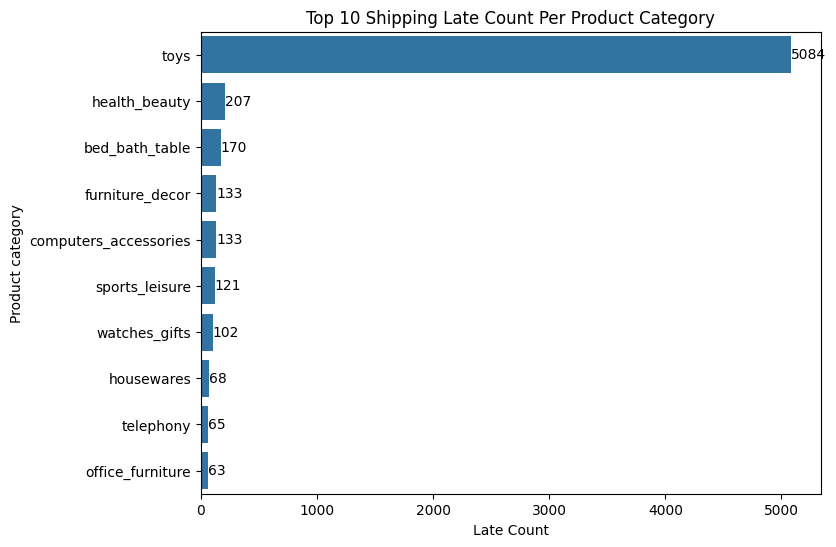

In [244]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(y='product_category_name', x='count_late', data=cat_late, capsize=0.2, ax=ax, order=cat_late[:10].sort_values(by='count_late', ascending=False).product_category_name).set(title='Top 10 Shipping Late Count Per Product Category')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='%.0f', label_type='edge')

ax.set(ylabel='Product category')
ax.set(xlabel='Late Count')
plt.show()


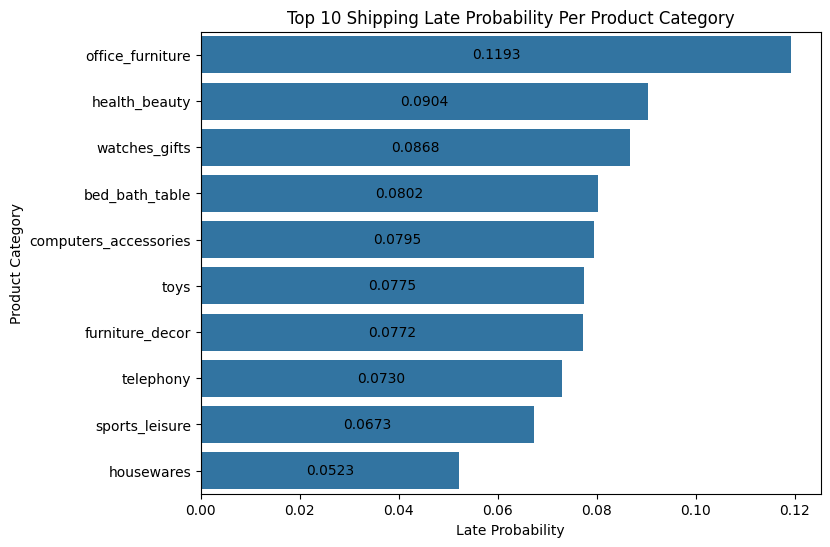

In [245]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(y='product_category_name', x='late_prop', data=cat_late, capsize=0.2, ax=ax, order=cat_late[:10].sort_values(by='late_prop', ascending=False).product_category_name).set(title='Top 10 Shipping Late Probability Per Product Category')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='%.4f', label_type='center')

ax.set(ylabel='Product Category')
ax.set(xlabel='Late Probability')
plt.show()

In [246]:
cat_list = cat_late['product_category_name'].to_list()

def propCatLate(data):
    if(data in cat_list):
        return cat_late[cat_late.product_category_name == data]['late_prop'].values[0]
    else:
        return 0

tr_data['cat_late_prop'] = tr_data['product_category_name'].apply(propCatLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [247]:
ts_data['cat_late_prop'] = ts_data['product_category_name'].apply(propCatLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [248]:
cat_often = cat_late[cat_late.dist_late == 'often']['product_category_name'].to_list()
cat_moderate = cat_late[cat_late.dist_late == 'moderate']['product_category_name'].to_list()
cat_rare = cat_late[cat_late.dist_late == 'rare']['product_category_name'].to_list()

def catLate(data):
    if(data in cat_often):
        return 'often'
    elif(data in cat_moderate):
        return 'moderate'
    elif(data in cat_rare):
        return 'rare'
    else:
        return 'never'

tr_data['prod_cat_late_freq'] = tr_data['product_category_name'].apply(catLate)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [249]:
ts_data['prod_cat_late_freq'] = ts_data['product_category_name'].apply(catLate)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [250]:
tr_data.isna().sum()


order_id                     0
customer_id                  0
order_purchase_timestamp     0
order_approved_at            0
order_delivered_timestamp    0
                            ..
product_late_prop            0
product_late_count           0
product_late_freq            0
cat_late_prop                0
prod_cat_late_freq           0
Length: 65, dtype: int64

In [251]:
ts_data.isna().sum()


order_id                    0
customer_id                 0
order_purchase_timestamp    0
order_approved_at           0
customer_zip_code_prefix    0
                           ..
product_late_prop           0
product_late_count          0
product_late_freq           0
cat_late_prop               0
prod_cat_late_freq          0
Length: 62, dtype: int64

In [252]:
tr_data.seller_id.unique()


array(['ZWM05J9LcBSF', 'IjlpYfhUbRQs', '77p2EYxcM9MD', ...,
       'IogS1BthBTFq', 'NLudVw0fmtlb', 'KPqZwHedqWY3'], dtype=object)

In [253]:
tr_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 87418 entries, 0 to 89315
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       87418 non-null  object        
 1   customer_id                    87418 non-null  object        
 2   order_purchase_timestamp       87418 non-null  datetime64[ns]
 3   order_approved_at              87418 non-null  datetime64[ns]
 4   order_delivered_timestamp      87418 non-null  datetime64[ns]
 5   order_estimated_delivery_date  87418 non-null  datetime64[ns]
 6   customer_zip_code_prefix       87418 non-null  int64         
 7   customer_city                  87418 non-null  object        
 8   customer_state                 87418 non-null  object        
 9   product_id                     87418 non-null  object        
 10  seller_id                      87418 non-null  object        
 11  price               

In [254]:
tr_data.product_id.nunique()


26849

In [255]:
tr_data.shape


(87418, 65)

In [256]:
tr_data.head()


order_id   customer_id order_purchase_timestamp   order_approved_at  \
0  Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54 2017-10-22 19:14:13   
1  v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31 2018-06-20 22:20:20   
2  Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31 2018-02-17 16:15:35   
3  bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29 2018-08-18 18:15:16   
4  Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04 2017-12-22 17:31:31   

  order_delivered_timestamp order_estimated_delivery_date  \
0       2017-10-26 22:19:52                    2017-11-09   
1       2018-07-03 22:51:22                    2018-07-24   
2       2018-02-27 01:29:50                    2018-03-08   
3       2018-08-27 20:03:51                    2018-09-19   
4       2018-01-05 19:22:49                    2018-01-18   

   customer_zip_code_prefix       customer_city customer_state    product_id  \
0                     58125     varzea paulista             SP  90K0C1fIyQUf   
1                      3112  armacao dos buzios             RJ  qejhpMGGVcsl   
2                      4119             jandira             SP  qUS5d2pEAyxJ   
3                     18212          uberlandia             MG  639iGvMyv0De   
4                     88868            ilhabela             SP  1lycYGcsic2F   

      seller_id   price  shipping_charges  payment_sequential payment_type  \
0  ZWM05J9LcBSF  223.51             84.65                   1  credit_card   
1  IjlpYfhUbRQs  170.80             23.79                   1  credit_card   
2  77p2EYxcM9MD   64.40             17.38                   1  credit_card   
3  jWzS0ayv9TGf  264.50             30.72                   1  credit_card   
4  l1pYW6GBnPMr  779.90             30.66                   1  credit_card   

   payment_installments  payment_value     product_category_name  \
0                     1         259.14                      toys   
1                     8         382.39             watches_gifts   
2                     4         249.25  costruction_tools_garden   
3                     2          27.79                      toys   
4                     1          76.15                      toys   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             491.0               19.0               12.0              16.0   
1             440.0               18.0               14.0              17.0   
2            2200.0               16.0               16.0              16.0   
3            1450.0               68.0                3.0              48.0   
4             300.0               17.0                4.0              12.0   

   is_late_s  prod_vol vol_category  vol_late_prop  purchase_day_of_week  \
0          0    3648.0       medium        0.07457                     6   
1          0    4284.0       medium        0.07457                     2   
2          0    4096.0       medium        0.07457                     4   
3          0    9792.0       medium        0.07457                     5   
4          0     816.0        small        0.07616                     4   

   approved_day_of_week  pur_late_prop  app_late_prop  purchase_hour  \
0                     6       0.075346       0.072117             18   
1                     2       0.074620       0.079129             21   
2                     5       0.076462       0.072244             16   
3                     5       0.069131       0.072244             18   
4                     4       0.076462       0.082739             16   

   approved_hour  purh_late_prop  apph_late_prop  approved_min_purchase  \
0             19        0.080792        0.073792                      0   
1             22        0.086663        0.073651                      0   
2             16        0.078200        0.071649                     23   
3             18        0.080792        0.083032                      0   
4             17        0.078200        0.071161                      0 

In [257]:
tr_data.to_csv('./raw-train-intel2.csv', index=False)


In [258]:
tr_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 87418 entries, 0 to 89315
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       87418 non-null  object        
 1   customer_id                    87418 non-null  object        
 2   order_purchase_timestamp       87418 non-null  datetime64[ns]
 3   order_approved_at              87418 non-null  datetime64[ns]
 4   order_delivered_timestamp      87418 non-null  datetime64[ns]
 5   order_estimated_delivery_date  87418 non-null  datetime64[ns]
 6   customer_zip_code_prefix       87418 non-null  int64         
 7   customer_city                  87418 non-null  object        
 8   customer_state                 87418 non-null  object        
 9   product_id                     87418 non-null  object        
 10  seller_id                      87418 non-null  object        
 11  price               

In [259]:
tr_data['prob_mean'] = tr_data[['vol_late_prop', 'pur_late_prop', 'app_late_prop',
                                'purh_late_prop', 'apph_late_prop', 'price_late_prop',
                                'install_late_prop', 'pt_late_prop', 'pw_late_prop',
                                'sc_late_prop', 'ps_late_prop', 'zip_late_prop',
                                'city_late_prop', 'state_late_prop', 'seller_late_prop', 
                                'product_late_prop', 'cat_late_prop', 'apmpu_late_prop']].mean(axis = 1, skipna = True)
tr_data

order_id   customer_id order_purchase_timestamp  \
0      Axfy13Hk4PIk  hCT0x9JiGXBQ      2017-10-22 18:57:54   
1      v6px92oS8cLG  PxA7fv9spyhx      2018-06-20 21:40:31   
2      Ulpf9skrhjfm  g3nXeJkGI0Qw      2018-02-16 16:19:31   
3      bwJVWupf2keN  EOEsCQ6QlpIg      2018-08-18 18:04:29   
4      Dd0QnrMk9Cj5  mVz5LO2Vd6cL      2017-12-22 16:44:04   
...             ...           ...                      ...   
89311  zlcLnXGgAabl  bfJtzkBGksdY      2018-08-19 17:25:36   
89312  IlTAoIkILwrq  4hjsCpj6FC7g      2017-12-15 11:20:27   
89313  uA6oXfftGVmT  DLn56oKHl9bv      2018-07-24 06:39:14   
89314  v3QtU6xlGDJp  auSfRYUQUOIq      2018-08-11 08:04:22   
89315  Xo1fqyXOC6CR  rhevVNXYJnEs      2018-06-09 21:46:58   

        order_approved_at order_delivered_timestamp  \
0     2017-10-22 19:14:13       2017-10-26 22:19:52   
1     2018-06-20 22:20:20       2018-07-03 22:51:22   
2     2018-02-17 16:15:35       2018-02-27 01:29:50   
3     2018-08-18 18:15:16       2018-08-27 20:03:51   
4     2017-12-22 17:31:31       2018-01-05 19:22:49   
...                   ...                       ...   
89311 2018-08-21 04:35:30       2018-08-30 14:47:46   
89312 2017-12-16 02:37:32       2017-12-20 19:23:40   
89313 2018-07-24 11:20:39       2018-07-27 01:41:40   
89314 2018-08-11 08:24:40       2018-08-14 21:43:51   
89315 2018-06-09 22:19:00       2018-06-14 15:03:46   

      order_estimated_delivery_date  customer_zip_code_prefix  \
0                        2017-11-09                     58125   
1                        2018-07-24                      3112   
2                        2018-03-08                      4119   
3                        2018-09-19                     18212   
4                        2018-01-18                     88868   
...                             ...                       ...   
89311                    2018-09-04                     94060   
89312                    2018-01-04                     99835   
89313                    2018-08-01                      2540   
89314                    2018-08-17                     12288   
89315                    2018-07-05                     93048   

            customer_city customer_state    product_id     seller_id    price  \
0         varzea paulista             SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51   
1      armacao dos buzios             RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80   
2                 jandira             SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40   
3              uberlandia             MG  639iGvMyv0De  jWzS0ayv9TGf   264.50   
4                ilhabela             SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90   
...                   ...            ...           ...           ...      ...   
89311              amparo             SP  W8vikEizUggJ  2QjevWskirjm    31.99   
89312             itapevi             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00   
89313           sao paulo             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10   
89314            paulinia             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00   
89315            brasilia             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88   

       shipping_charges  payment_sequential payment_type  \
0                 84.65                   1  credit_card   
1                 23.79                   1  credit_card   
2                 17.38                   1  credit_card   
3                 30.72                   1  credit_card   
4                 30.66                   1  credit_card   
...                 ...                 ...          ...   
89311            188.65                   1       wallet   
89312              1.64                   1       wallet   
89313              4.09                   1  credit_card   
89314            113.01                   1      voucher   
89315             70.06                   1  credit_card   

       payment_installments  payment_value     product_category_name  \
0                         1         259.14                

In [260]:
ts_data['prob_mean'] = ts_data[['vol_late_prop', 'pur_late_prop', 'app_late_prop',
                                'purh_late_prop', 'apph_late_prop', 'price_late_prop',
                                'install_late_prop', 'pt_late_prop', 'pw_late_prop',
                                'sc_late_prop', 'ps_late_prop', 'zip_late_prop',
                                'city_late_prop', 'state_late_prop', 'seller_late_prop', 
                                'product_late_prop', 'apmpu_late_prop','cat_late_prop']].mean(axis = 1, skipna = True)
ts_data

order_id   customer_id order_purchase_timestamp  \
0      u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57   
1      ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12   
2      I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30   
3      bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46   
4      CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07   
...             ...           ...                      ...   
38274  QKBW3XKevmfn  Dw3aCTFf4Q4G      2018-08-24 11:54:56   
38275  Tjiw9bj8HtLr  JmHJqJvpVcJs      2017-03-25 20:39:11   
38276  mCPofb7A1aTq  ro5DikwWCC3j      2018-08-16 13:39:30   
38277  scVuqN10zbgb  R25nE2rl77AU      2018-06-27 13:17:05   
38278  oLKXX8tqU6eQ  oOvkrmF7ZZbI      2017-09-08 09:22:24   

        order_approved_at  customer_zip_code_prefix        customer_city  \
0     2017-11-18 12:46:08                      6020              goiania   
1     2018-06-02 20:12:23                     23020               viamao   
2     2018-01-09 07:24:03                     75094             campinas   
3     2017-03-10 10:24:46                     89284  santana de parnaiba   
4     2017-12-05 04:13:30                     39810             aripuana   
...                   ...                       ...                  ...   
38274 2018-08-24 12:05:22                     26160            guarulhos   
38275 2017-03-25 20:50:17                     39628       rio de janeiro   
38276 2018-08-17 03:31:06                     89284  santana de parnaiba   
38277 2018-06-28 08:50:58                     60867            sao paulo   
38278 2017-09-08 09:35:20                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential payment_type  payment_installments  payment_value  \
0                       1  credit_card                     2         155.77   
1                       1  credit_card                     1           4.07   
2                       1       wallet                     1         381.59   
3                       1  credit_card                     3          14.76   
4                       1       wallet                     1         284.09   
...                   ...          ...                   ...            ...   
38274                   1  credit_card                     1         209.51   
38275                   1  credit_card                     2         323.31   
38276                   1       wallet                     1         170.71   
38277                   1  credit_card                    10         100.65   
38278                   1  credit_card                     4         984.20   

      product_category_name  product_weight_g  product_length_cm  \
0                      toys              50.0               16.0   
1               electronics             200.0               21.0   
2           furniture_decor            1000.0              100.0   
3                      toys            8950.0               40.0   
4                      toys            2301.0               32.0   
...                     ...               ...  

In [261]:
tr_fix = tr_data.drop(['customer_id', 'order_purchase_timestamp', 'order_approved_at', 
                             'order_delivered_timestamp', 'order_estimated_delivery_date',
                             'product_length_cm', 'product_height_cm', 'product_width_cm'
                               ], axis=1)


In [262]:
ts_fix = ts_data.drop(['customer_id', 'order_purchase_timestamp', 'order_approved_at', 
                       'product_length_cm', 'product_height_cm', 'product_width_cm',
                      ], axis=1)

In [263]:
tr_fix.isna().sum()


order_id                      0
customer_zip_code_prefix      0
customer_city                 0
customer_state                0
product_id                    0
seller_id                     0
price                         0
shipping_charges              0
payment_sequential            0
payment_type                  0
payment_installments          0
payment_value                 0
product_category_name       289
product_weight_g             15
is_late_s                     0
prod_vol                     15
vol_category                  0
vol_late_prop                 0
purchase_day_of_week          0
approved_day_of_week          0
pur_late_prop                 0
app_late_prop                 0
purchase_hour                 0
approved_hour                 0
purh_late_prop                0
apph_late_prop                0
approved_min_purchase         0
apmpu_category                0
apmpu_late_prop               0
price_category                0
price_late_prop               0
install_

In [264]:
ts_fix.isna().sum()


order_id                      0
customer_zip_code_prefix      0
customer_city                 0
customer_state                0
product_id                    0
seller_id                     0
price                         0
shipping_charges              0
payment_sequential            0
payment_type                  0
payment_installments          0
payment_value                 0
product_category_name       168
product_weight_g             10
prod_vol                     10
vol_category                  0
vol_late_prop                 0
purchase_day_of_week          0
approved_day_of_week          0
pur_late_prop                 0
app_late_prop                 0
purchase_hour                 0
approved_hour                 0
purh_late_prop                0
apph_late_prop                0
approved_min_purchase         0
apmpu_category                0
apmpu_late_prop               0
price_category                0
price_late_prop               0
install_late_prop             0
pt_late_

In [265]:
tr_fix['product_weight_g'] = tr_fix['product_weight_g'].fillna(tr_fix['product_weight_g'].mean())
tr_fix['prod_vol'] = tr_fix['prod_vol'].fillna(tr_fix['prod_vol'].mean())
tr_fix['product_category_name'] = tr_fix['product_category_name'].fillna(tr_fix['product_category_name'].mode()[0])

tr_fix.isna().sum()

order_id                    0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
product_id                  0
seller_id                   0
price                       0
shipping_charges            0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value               0
product_category_name       0
product_weight_g            0
is_late_s                   0
prod_vol                    0
vol_category                0
vol_late_prop               0
purchase_day_of_week        0
approved_day_of_week        0
pur_late_prop               0
app_late_prop               0
purchase_hour               0
approved_hour               0
purh_late_prop              0
apph_late_prop              0
approved_min_purchase       0
apmpu_category              0
apmpu_late_prop             0
price_category              0
price_late_prop             0
install_late_prop           0
pt_late_prop                0
weight_cat

In [266]:
ts_fix.isna().sum()


order_id                      0
customer_zip_code_prefix      0
customer_city                 0
customer_state                0
product_id                    0
seller_id                     0
price                         0
shipping_charges              0
payment_sequential            0
payment_type                  0
payment_installments          0
payment_value                 0
product_category_name       168
product_weight_g             10
prod_vol                     10
vol_category                  0
vol_late_prop                 0
purchase_day_of_week          0
approved_day_of_week          0
pur_late_prop                 0
app_late_prop                 0
purchase_hour                 0
approved_hour                 0
purh_late_prop                0
apph_late_prop                0
approved_min_purchase         0
apmpu_category                0
apmpu_late_prop               0
price_category                0
price_late_prop               0
install_late_prop             0
pt_late_

In [267]:
ts_fix['product_weight_g'] = ts_fix['product_weight_g'].fillna(tr_fix['product_weight_g'].mean())
ts_fix['prod_vol'] = ts_fix['prod_vol'].fillna(tr_fix['prod_vol'].mean())
ts_fix['product_category_name'] = ts_fix['product_category_name'].fillna(tr_fix['product_category_name'].mode()[0])
ts_fix['approved_day_of_week'] = ts_fix['approved_day_of_week'].fillna(tr_fix['approved_day_of_week'].mode()[0])

ts_fix.isna().sum()

order_id                    0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
product_id                  0
seller_id                   0
price                       0
shipping_charges            0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value               0
product_category_name       0
product_weight_g            0
prod_vol                    0
vol_category                0
vol_late_prop               0
purchase_day_of_week        0
approved_day_of_week        0
pur_late_prop               0
app_late_prop               0
purchase_hour               0
approved_hour               0
purh_late_prop              0
apph_late_prop              0
approved_min_purchase       0
apmpu_category              0
apmpu_late_prop             0
price_category              0
price_late_prop             0
install_late_prop           0
pt_late_prop                0
weight_category             0
pw_late_pr

In [268]:
ts_fix.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38279 entries, 0 to 38278
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  38279 non-null  object 
 1   customer_zip_code_prefix  38279 non-null  int64  
 2   customer_city             38279 non-null  object 
 3   customer_state            38279 non-null  object 
 4   product_id                38279 non-null  object 
 5   seller_id                 38279 non-null  object 
 6   price                     38279 non-null  float64
 7   shipping_charges          38279 non-null  float64
 8   payment_sequential        38279 non-null  int64  
 9   payment_type              38279 non-null  object 
 10  payment_installments      38279 non-null  int64  
 11  payment_value             38279 non-null  float64
 12  product_category_name     38279 non-null  object 
 13  product_weight_g          38279 non-null  float64
 14  prod_v

In [269]:
tr_fix.info()


<class 'pandas.core.frame.DataFrame'>
Index: 87418 entries, 0 to 89315
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  87418 non-null  object 
 1   customer_zip_code_prefix  87418 non-null  int64  
 2   customer_city             87418 non-null  object 
 3   customer_state            87418 non-null  object 
 4   product_id                87418 non-null  object 
 5   seller_id                 87418 non-null  object 
 6   price                     87418 non-null  float64
 7   shipping_charges          87418 non-null  float64
 8   payment_sequential        87418 non-null  int64  
 9   payment_type              87418 non-null  object 
 10  payment_installments      87418 non-null  int64  
 11  payment_value             87418 non-null  float64
 12  product_category_name     87418 non-null  object 
 13  product_weight_g          87418 non-null  float64
 14  is_late_s  

In [270]:
tr_fix.isna().sum()


order_id                    0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
product_id                  0
seller_id                   0
price                       0
shipping_charges            0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value               0
product_category_name       0
product_weight_g            0
is_late_s                   0
prod_vol                    0
vol_category                0
vol_late_prop               0
purchase_day_of_week        0
approved_day_of_week        0
pur_late_prop               0
app_late_prop               0
purchase_hour               0
approved_hour               0
purh_late_prop              0
apph_late_prop              0
approved_min_purchase       0
apmpu_category              0
apmpu_late_prop             0
price_category              0
price_late_prop             0
install_late_prop           0
pt_late_prop                0
weight_cat

In [271]:
tr_fix['approved_day_of_week'] = tr_fix['approved_day_of_week'].astype(int)
tr_fix['approved_hour'] = tr_fix['approved_hour'].astype(int)
tr_fix['approved_min_purchase'] = tr_fix['approved_min_purchase'].astype(float)
for col in tr_fix.select_dtypes(include=["object"]).columns:
    tr_fix[col] = tr_fix[col].astype('category')

tr_fix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87418 entries, 0 to 89315
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   order_id                  87418 non-null  category
 1   customer_zip_code_prefix  87418 non-null  int64   
 2   customer_city             87418 non-null  category
 3   customer_state            87418 non-null  category
 4   product_id                87418 non-null  category
 5   seller_id                 87418 non-null  category
 6   price                     87418 non-null  float64 
 7   shipping_charges          87418 non-null  float64 
 8   payment_sequential        87418 non-null  int64   
 9   payment_type              87418 non-null  category
 10  payment_installments      87418 non-null  int64   
 11  payment_value             87418 non-null  float64 
 12  product_category_name     87418 non-null  category
 13  product_weight_g          87418 non-null  float64 


In [272]:
ts_fix['approved_day_of_week'] = ts_fix['approved_day_of_week'].astype(int)
ts_fix['approved_hour'] = ts_fix['approved_hour'].astype(int)
ts_fix['approved_min_purchase'] = ts_fix['approved_min_purchase'].astype(float)
for col in ts_fix.select_dtypes(include=["object"]).columns:
    ts_fix[col] = ts_fix[col].astype('category')
    
ts_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38279 entries, 0 to 38278
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   order_id                  38279 non-null  category
 1   customer_zip_code_prefix  38279 non-null  int64   
 2   customer_city             38279 non-null  category
 3   customer_state            38279 non-null  category
 4   product_id                38279 non-null  category
 5   seller_id                 38279 non-null  category
 6   price                     38279 non-null  float64 
 7   shipping_charges          38279 non-null  float64 
 8   payment_sequential        38279 non-null  int64   
 9   payment_type              38279 non-null  category
 10  payment_installments      38279 non-null  int64   
 11  payment_value             38279 non-null  float64 
 12  product_category_name     38279 non-null  category
 13  product_weight_g          38279 non-null  floa

In [273]:
#Changed the datatypes


In [274]:
# ONE HOT ENCODING

In [275]:
ohe_tr = pd.get_dummies(tr_fix, columns = ['payment_type'])
ohe_tr


order_id  customer_zip_code_prefix       customer_city  \
0      Axfy13Hk4PIk                     58125     varzea paulista   
1      v6px92oS8cLG                      3112  armacao dos buzios   
2      Ulpf9skrhjfm                      4119             jandira   
3      bwJVWupf2keN                     18212          uberlandia   
4      Dd0QnrMk9Cj5                     88868            ilhabela   
...             ...                       ...                 ...   
89311  zlcLnXGgAabl                     94060              amparo   
89312  IlTAoIkILwrq                     99835             itapevi   
89313  uA6oXfftGVmT                      2540           sao paulo   
89314  v3QtU6xlGDJp                     12288            paulinia   
89315  Xo1fqyXOC6CR                     93048            brasilia   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 SP  90K0C1fIyQUf  ZWM05J9LcBSF   223.51             84.65   
1                 RJ  qejhpMGGVcsl  IjlpYfhUbRQs   170.80             23.79   
2                 SP  qUS5d2pEAyxJ  77p2EYxcM9MD    64.40             17.38   
3                 MG  639iGvMyv0De  jWzS0ayv9TGf   264.50             30.72   
4                 SP  1lycYGcsic2F  l1pYW6GBnPMr   779.90             30.66   
...              ...           ...           ...      ...               ...   
89311             SP  W8vikEizUggJ  2QjevWskirjm    31.99            188.65   
89312             SP  KXSbyJWtMMwZ  BFS9XJPapWv0   282.00              1.64   
89313             SP  EG4wDSpFyTth  TuPm19CMKvrM    58.10              4.09   
89314             SP  ZWyg4uNWPHjJ  yGbPyLPc8PmT  2899.00            113.01   
89315             DF  5pbzE0rDy61l  mkWN70fui2ro    37.88             70.06   

       payment_sequential  payment_installments  payment_value  \
0                       1                     1         259.14   
1                       1                     8         382.39   
2                       1                     4         249.25   
3                       1                     2          27.79   
4                       1                     1          76.15   
...                   ...                   ...            ...   
89311                   1                     1         128.00   
89312                   1                     1         106.86   
89313                   1                     1         376.39   
89314                   1                     1          48.05   
89315                   1                    10         211.93   

          product_category_name  product_weight_g  is_late_s  prod_vol  \
0                          toys             491.0          0    3648.0   
1                 watches_gifts             440.0          0    4284.0   
2      costruction_tools_garden            2200.0          0    4096.0   
3                          toys            1450.0          0    9792.0   
4                          toys             300.0          0     816.0   
...                         ...               ...        ...       ...   
89311                      toys             700.0          0    4116.0   
89312                      toys             600.0          0    4096.0   
89313             health_beauty             250.0          0    3960.0   
89314                      toys             250.0          0     352.0   
89315                      toys            1750.0          0   13824.0   

      vol_category  vol_late_prop  purchase_day_of_week  approved_day_of_week  \
0           medium        0.07457                     6                     6   
1           medium        0.07457                     2                     2   
2           medium        0.07457                     4                     5   
3           medium        0.07457                     5                     5   
4            small        0.07616                     4                     4   
...            ...            ...                   ...          

In [276]:
ohe_ts = pd.get_dummies(ts_fix, columns = ['payment_type'])
ohe_ts

order_id  customer_zip_code_prefix        customer_city  \
0      u6rPMRAYIGig                      6020              goiania   
1      ohY8f4FEbX19                     23020               viamao   
2      I28liQek73i2                     75094             campinas   
3      bBG1T89mlY8W                     89284  santana de parnaiba   
4      CYxJJSQS8Lbo                     39810             aripuana   
...             ...                       ...                  ...   
38274  QKBW3XKevmfn                     26160            guarulhos   
38275  Tjiw9bj8HtLr                     39628       rio de janeiro   
38276  mCPofb7A1aTq                     89284  santana de parnaiba   
38277  scVuqN10zbgb                     60867            sao paulo   
38278  oLKXX8tqU6eQ                     37740              diadema   

      customer_state    product_id     seller_id    price  shipping_charges  \
0                 GO  1slxdgbgWFax  3jwvL6ihC45G    24.10             20.90   
1                 RS  77PgsiElQLeB  GlLj704QXlDB    42.89             12.28   
2                 SP  QVlD26X1y7NI  V3iKL8r9W9NR    50.21             67.11   
3                 SP  yWlFGkKYfrpa  RNBdBKsXebna    89.10             62.05   
4                 MT  h6MCbrwh5kiC  5Ja2lH0N2OZt  2139.99              9.41   
...              ...           ...           ...      ...               ...   
38274             SP  wr6barwyoaIE  XURInBuULfIO    99.25             37.66   
38275             RJ  sPZVXBD9lf3e  wR4cqCClYDyY    86.32             40.98   
38276             SP  Th6SHMsyTOMH  Gp2lLacVPwug   104.45             30.24   
38277             SP  PyjlDSHRGdSt  al4fWZ5NFQzG   223.87             74.75   
38278             SP  UZQyp4CdjAIi  dHUHvmn8Gewy   692.00             52.93   

       payment_sequential  payment_installments  payment_value  \
0                       1                     2         155.77   
1                       1                     1           4.07   
2                       1                     1         381.59   
3                       1                     3          14.76   
4                       1                     1         284.09   
...                   ...                   ...            ...   
38274                   1                     1         209.51   
38275                   1                     2         323.31   
38276                   1                     1         170.71   
38277                   1                    10         100.65   
38278                   1                     4         984.20   

      product_category_name  product_weight_g  prod_vol vol_category  \
0                      toys              50.0     880.0        small   
1               electronics             200.0    2058.0        small   
2           furniture_decor            1000.0   10000.0       medium   
3                      toys            8950.0   48000.0        large   
4                      toys            2301.0   38080.0        large   
...                     ...               ...       ...          ...   
38274                  toys             200.0    4928.0       medium   
38275                  toys            5150.0    1452.0        small   
38276                  toys             430.0    3927.0       medium   
38277                  toys            1850.0   19872.0        large   
38278                  toys             200.0    1584.0        small   

       vol_late_prop  purchase_day_of_week  approved_day_of_week  \
0           0.076160                     5                     5   
1           0.076160                     5                     5   
2           0.074570                     0                     1   
3           0.083013                     4                     4   
4           0.083013                     5                     1   
...              ...                   ...                   ...   
38274       0.074570                     4                     4   
38275       0.07616

In [277]:
for col in ohe_tr.select_dtypes(include=["bool"]).columns:
    ohe_tr[col] = ohe_tr[col].astype('int')

In [278]:
for col in ohe_ts.select_dtypes(include=["bool"]).columns:
    ohe_ts[col] = ohe_ts[col].astype('int')

In [279]:
ohe_tr['customer_zip_code_prefix'] = ohe_tr['customer_zip_code_prefix'].astype('category')
ohe_ts['customer_zip_code_prefix'] = ohe_ts['customer_zip_code_prefix'].astype('category')
ohe_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87418 entries, 0 to 89315
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   order_id                  87418 non-null  category
 1   customer_zip_code_prefix  87418 non-null  category
 2   customer_city             87418 non-null  category
 3   customer_state            87418 non-null  category
 4   product_id                87418 non-null  category
 5   seller_id                 87418 non-null  category
 6   price                     87418 non-null  float64 
 7   shipping_charges          87418 non-null  float64 
 8   payment_sequential        87418 non-null  int64   
 9   payment_installments      87418 non-null  int64   
 10  payment_value             87418 non-null  float64 
 11  product_category_name     87418 non-null  category
 12  product_weight_g          87418 non-null  float64 
 13  is_late_s                 87418 non-null  int64   


In [280]:
label_encoder = preprocessing.LabelEncoder()

zip_code = pd.concat([ohe_tr['customer_zip_code_prefix'], ohe_ts['customer_zip_code_prefix']])
label_encoder.fit(zip_code)
ohe_tr['customer_zip_code_prefix']= label_encoder.transform(ohe_tr['customer_zip_code_prefix'])
ohe_ts['customer_zip_code_prefix']= label_encoder.transform(ohe_ts['customer_zip_code_prefix'])

custom_city = pd.concat([ohe_tr['customer_city'], ohe_ts['customer_city']])
label_encoder.fit(custom_city)
ohe_tr['customer_city']= label_encoder.transform(ohe_tr['customer_city'])
ohe_ts['customer_city']= label_encoder.transform(ohe_ts['customer_city'])

custom_state = pd.concat([ohe_tr['customer_state'], ohe_ts['customer_state']])
label_encoder.fit(custom_state)
ohe_tr['customer_state']= label_encoder.transform(ohe_tr['customer_state'])
ohe_ts['customer_state']= label_encoder.transform(ohe_ts['customer_state'])

prods_id = pd.concat([ohe_tr['product_id'], ohe_ts['product_id']])
label_encoder.fit(prods_id)
ohe_tr['product_id']= label_encoder.transform(ohe_tr['product_id'])
ohe_ts['product_id']= label_encoder.transform(ohe_ts['product_id'])

sell_id = pd.concat([ohe_tr['seller_id'], ohe_ts['seller_id']])
label_encoder.fit(sell_id)
ohe_tr['seller_id']= label_encoder.transform(ohe_tr['seller_id'])
ohe_ts['seller_id']= label_encoder.transform(ohe_ts['seller_id'])

cat_name = pd.concat([ohe_tr['product_category_name'], ohe_ts['product_category_name']])
label_encoder.fit(cat_name)
ohe_tr['product_category_name']= label_encoder.transform(ohe_tr['product_category_name'])
ohe_ts['product_category_name']= label_encoder.transform(ohe_ts['product_category_name'])

ohe_tr


order_id  customer_zip_code_prefix  customer_city  customer_state  \
0      Axfy13Hk4PIk                      9797           4000              25   
1      v6px92oS8cLG                       878            298              18   
2      Ulpf9skrhjfm                      1554           1909              25   
3      bwJVWupf2keN                      5330           3924              10   
4      Dd0QnrMk9Cj5                     13743           1635              25   
...             ...                       ...            ...             ...   
89311  zlcLnXGgAabl                     14292            156              25   
89312  IlTAoIkILwrq                     14901           1800              25   
89313  uA6oXfftGVmT                       587           3571              25   
89314  v3QtU6xlGDJp                      4090           2725              25   
89315  Xo1fqyXOC6CR                     14203            554               6   

       product_id  seller_id    price  shipping_charges  payment_sequential  \
0            4632       1738   223.51             84.65                   1   
1           27588        922   170.80             23.79                   1   
2           27498        328    64.40             17.38                   1   
3            3086       2243   264.50             30.72                   1   
4             922       2320   779.90             30.66                   1   
...           ...        ...      ...               ...                 ...   
89311       16744        117    31.99            188.65                   1   
89312       10705        548   282.00              1.64                   1   
89313        7380       1465    58.10              4.09                   1   
89314       18513       2958  2899.00            113.01                   1   
89315        2968       2402    37.88             70.06                   1   

       payment_installments  payment_value  product_category_name  \
0                         1         259.14                     68   
1                         8         382.39                     69   
2                         4         249.25                     20   
3                         2          27.79                     68   
4                         1          76.15                     68   
...                     ...            ...                    ...   
89311                     1         128.00                     68   
89312                     1         106.86                     68   
89313                     1         376.39                     42   
89314                     1          48.05                     68   
89315                    10         211.93                     68   

       product_weight_g  is_late_s  prod_vol vol_category  vol_late_prop  \
0                 491.0          0    3648.0       medium        0.07457   
1                 440.0          0    4284.0       medium        0.07457   
2                2200.0          0    4096.0       medium        0.07457   
3                1450.0          0    9792.0       medium        0.07457   
4                 300.0          0     816.0        small        0.07616   
...                 ...        ...       ...          ...            ...   
89311             700.0          0    4116.0       medium        0.07457   
89312             600.0          0    4096.0       medium        0.07457   
89313             250.0          0    3960.0       medium        0.07457   
89314             250.0          0     352.0        small        0.07616   
89315            1750.0          0   13824.0       medium        0.07457   

       purchase_day_of_week  approved_day_of_week  pur_late_prop  \
0                         6                     6       0.075346   
1                         2                     2       0.074620   
2                         4                     5       0.076462   
3                         5                     5       0.069131   
4                  

In [281]:
ohe_tr['price_category'].replace({'cheap': 0, 'affordable': 1, 'expensive': 2}, inplace=True)
ohe_tr['vol_category'].replace({'small': 0, 'medium': 1, 'large': 2}, inplace=True)
ohe_tr['weight_category'].replace({'light': 0, 'medium': 1, 'heavy': 2}, inplace=True)
ohe_tr['freight_category'].replace({'cheap': 0, 'medium': 1, 'expensive': 2}, inplace=True)
ohe_tr['zip_late_freq'].replace({'never': 0, 'rare': 1, 'moderate': 2, 'often': 3}, inplace=True)
ohe_tr['apmpu_category'].replace({'fast': 0, 'medium': 1, 'slow': 2}, inplace=True)
ohe_tr['city_late_freq'].replace({'never': 0, 'rare': 1, 'moderate': 2, 'often': 3}, inplace=True)
ohe_tr['state_late_freq'].replace({'never': 0, 'rare': 1, 'moderate': 2, 'often': 3}, inplace=True)
ohe_tr['seller_late_freq'].replace({'never': 0, 'rare': 1, 'moderate': 2, 'often': 3}, inplace=True)
ohe_tr['product_late_freq'].replace({'never': 0, 'rare': 1, 'moderate': 2, 'often': 3}, inplace=True)
ohe_tr['prod_cat_late_freq'].replace({'never': 0, 'rare': 1, 'moderate': 2, 'often': 3}, inplace=True)
ohe_tr



order_id  customer_zip_code_prefix  customer_city  customer_state  \
0      Axfy13Hk4PIk                      9797           4000              25   
1      v6px92oS8cLG                       878            298              18   
2      Ulpf9skrhjfm                      1554           1909              25   
3      bwJVWupf2keN                      5330           3924              10   
4      Dd0QnrMk9Cj5                     13743           1635              25   
...             ...                       ...            ...             ...   
89311  zlcLnXGgAabl                     14292            156              25   
89312  IlTAoIkILwrq                     14901           1800              25   
89313  uA6oXfftGVmT                       587           3571              25   
89314  v3QtU6xlGDJp                      4090           2725              25   
89315  Xo1fqyXOC6CR                     14203            554               6   

       product_id  seller_id    price  shipping_charges  payment_sequential  \
0            4632       1738   223.51             84.65                   1   
1           27588        922   170.80             23.79                   1   
2           27498        328    64.40             17.38                   1   
3            3086       2243   264.50             30.72                   1   
4             922       2320   779.90             30.66                   1   
...           ...        ...      ...               ...                 ...   
89311       16744        117    31.99            188.65                   1   
89312       10705        548   282.00              1.64                   1   
89313        7380       1465    58.10              4.09                   1   
89314       18513       2958  2899.00            113.01                   1   
89315        2968       2402    37.88             70.06                   1   

       payment_installments  payment_value  product_category_name  \
0                         1         259.14                     68   
1                         8         382.39                     69   
2                         4         249.25                     20   
3                         2          27.79                     68   
4                         1          76.15                     68   
...                     ...            ...                    ...   
89311                     1         128.00                     68   
89312                     1         106.86                     68   
89313                     1         376.39                     42   
89314                     1          48.05                     68   
89315                    10         211.93                     68   

       product_weight_g  is_late_s  prod_vol vol_category  vol_late_prop  \
0                 491.0          0    3648.0            1        0.07457   
1                 440.0          0    4284.0            1        0.07457   
2                2200.0          0    4096.0            1        0.07457   
3                1450.0          0    9792.0            1        0.07457   
4                 300.0          0     816.0            0        0.07616   
...                 ...        ...       ...          ...            ...   
89311             700.0          0    4116.0            1        0.07457   
89312             600.0          0    4096.0            1        0.07457   
89313             250.0          0    3960.0            1        0.07457   
89314             250.0          0     352.0            0        0.07616   
89315            1750.0          0   13824.0            1        0.07457   

       purchase_day_of_week  approved_day_of_week  pur_late_prop  \
0                         6                     6       0.075346   
1                         2                     2       0.074620   
2                         4                     5       0.076462   
3                         5                     5       0.069131   
4                  

In [282]:
ohe_ts['price_category'].replace({'cheap': 0, 'affordable': 1, 'expensive': 2}, inplace=True)
ohe_ts['vol_category'].replace({'small': 0, 'medium': 1, 'large': 2}, inplace=True)
ohe_ts['weight_category'].replace({'light': 0, 'medium': 1, 'heavy': 2}, inplace=True)
ohe_ts['freight_category'].replace({'cheap': 0, 'medium': 1, 'expensive': 2}, inplace=True)
ohe_ts['zip_late_freq'].replace({'never': 0, 'rare': 1, 'moderate': 2, 'often': 3}, inplace=True)
ohe_ts['apmpu_category'].replace({'fast': 0, 'medium': 1, 'slow': 2}, inplace=True)
ohe_ts['city_late_freq'].replace({'never': 0, 'rare': 1, 'moderate': 2, 'often': 3}, inplace=True)
ohe_ts['state_late_freq'].replace({'never': 0, 'rare': 1, 'moderate': 2, 'often': 3}, inplace=True)
ohe_ts['seller_late_freq'].replace({'never': 0, 'rare': 1, 'moderate': 2, 'often': 3}, inplace=True)
ohe_ts['product_late_freq'].replace({'never': 0, 'rare': 1, 'moderate': 2, 'often': 3}, inplace=True)
ohe_ts['prod_cat_late_freq'].replace({'never': 0, 'rare': 1, 'moderate': 2, 'often': 3}, inplace=True)
ohe_ts



order_id  customer_zip_code_prefix  customer_city  customer_state  \
0      u6rPMRAYIGig                      2718           1436               8   
1      ohY8f4FEbX19                      5860           4022              22   
2      I28liQek73i2                     11918            701              25   
3      bBG1T89mlY8W                     13910           3326              25   
4      CYxJJSQS8Lbo                      8313            295              12   
...             ...                       ...            ...             ...   
38274  QKBW3XKevmfn                      6345           1520              25   
38275  Tjiw9bj8HtLr                      8275           3131              18   
38276  mCPofb7A1aTq                     13910           3326              25   
38277  scVuqN10zbgb                     10233           3571              25   
38278  oLKXX8tqU6eQ                      7982           1165              25   

       product_id  seller_id    price  shipping_charges  payment_sequential  \
0             981        179    24.10             20.90                   1   
1            3675        834    42.89             12.28                   1   
2           13794       1507    50.21             67.11                   1   
3           31722       1329    89.10             62.05                   1   
4           22471        249  2139.99              9.41                   1   
...           ...        ...      ...               ...                 ...   
38274       30816       1638    99.25             37.66                   1   
38275       28489       2872    86.32             40.98                   1   
38276       15443        837   104.45             30.24                   1   
38277       13540       1801   223.87             74.75                   1   
38278       15889       1935   692.00             52.93                   1   

       payment_installments  payment_value  product_category_name  \
0                         2         155.77                     68   
1                         1           4.07                     25   
2                         1         381.59                     38   
3                         3          14.76                     68   
4                         1         284.09                     68   
...                     ...            ...                    ...   
38274                     1         209.51                     68   
38275                     2         323.31                     68   
38276                     1         170.71                     68   
38277                    10         100.65                     68   
38278                     4         984.20                     68   

       product_weight_g  prod_vol vol_category  vol_late_prop  \
0                  50.0     880.0            0       0.076160   
1                 200.0    2058.0            0       0.076160   
2                1000.0   10000.0            1       0.074570   
3                8950.0   48000.0            2       0.083013   
4                2301.0   38080.0            2       0.083013   
...                 ...       ...          ...            ...   
38274             200.0    4928.0            1       0.074570   
38275            5150.0    1452.0            0       0.076160   
38276             430.0    3927.0            1       0.074570   
38277            1850.0   19872.0            2       0.083013   
38278             200.0    1584.0            0       0.076160   

       purchase_day_of_week  approved_day_of_week  pur_late_prop  \
0                         5                     5       0.069131   
1                         5                     5       0.069131   
2                         0                     1       0.087031   
3                         4                     4       0.076462   
4                         5                     1       0.069131   
...                     ...                   ...            ...   
38274          

In [283]:
fix_data = ohe_tr.copy()
fix_data2 = ohe_ts.copy()

In [284]:
fix_data.to_csv('./intel-train-finn3.csv', index=False)
fix_data2.to_csv('./intel-test-finn3.csv', index=False)

In [285]:
# MODELING


In [286]:
roro = fix_data.drop(['order_id'], axis=1)
roro.corr()

customer_zip_code_prefix  customer_city  \
customer_zip_code_prefix                  1.000000      -0.004514   
customer_city                            -0.004514       1.000000   
customer_state                            0.024082       0.261796   
product_id                               -0.010570       0.000470   
seller_id                                -0.001833       0.004619   
price                                     0.006187      -0.002230   
shipping_charges                          0.002249      -0.011719   
payment_sequential                        0.013957       0.022393   
payment_installments                     -0.003746      -0.032529   
payment_value                            -0.002637      -0.000613   
product_category_name                    -0.001333       0.002244   
product_weight_g                         -0.004464      -0.013926   
is_late_s                                -0.004231       0.006127   
prod_vol                                 -0.004151      -0.011300   
vol_category                             -0.001203      -0.009069   
vol_late_prop                            -0.007220      -0.004943   
purchase_day_of_week                     -0.004693      -0.001287   
approved_day_of_week                      0.003599      -0.006699   
pur_late_prop                             0.001533      -0.001688   
app_late_prop                            -0.003861      -0.003729   
purchase_hour                            -0.000517      -0.010803   
approved_hour                            -0.007719       0.002407   
purh_late_prop                           -0.005224      -0.009026   
apph_late_prop                           -0.003569       0.000251   
approved_min_purchase                     0.005080      -0.016338   
apmpu_category                            0.005460      -0.016656   
apmpu_late_prop                           0.005460      -0.016656   
price_category                           -0.000923       0.000192   
price_late_prop                          -0.007091       0.003361   
install_late_prop                         0.002569       0.000094   
pt_late_prop                             -0.005368      -0.015397   
weight_category                          -0.000382      -0.012776   
pw_late_prop                             -0.001401      -0.013425   
freight_category                          0.004241       0.002264   
sc_late_prop                             -0.001036      -0.003578   
ps_late_prop                             -0.013942      -0.018792   
zip_late_prop                            -0.008493       0.012467   
zip_late_count                           -0.024932       0.049954   
zip_late_freq                             0.000030       0.017024   
zip_ever_late                             0.006066       0.004497   
city_late_prop                           -0.004954       0.022016   
city_late_count                           0.002853       0.474085   
city_late_freq                            0.023812       0.142966   
city_ever_late                            0.028415       0.115949   
state_late_prop                          -0.031621       0.020298   
state_late_count                          0.010371       0.321926   
state_late_freq                           0.004941       0.168995   
seller_late_prop                          0.005392       0.009524   
seller_late_count                        -0.005384      -0.006174   
seller_late_freq                          0.002370       0.001155   
product_late_prop                         0.001211       0.003591   
product_late_count                       -0.000692      -0.008667   
product_late_freq                         0.001919      -0.008628   
cat_late_prop                             0.004898      -0.004238   
prod_cat_late_freq                        0.004406      -0.003252   
prob_mean                                -0.006511       0.014616   
payment_type_credit_card                 -0.002838       0.003107   
payment_type_debit_card 

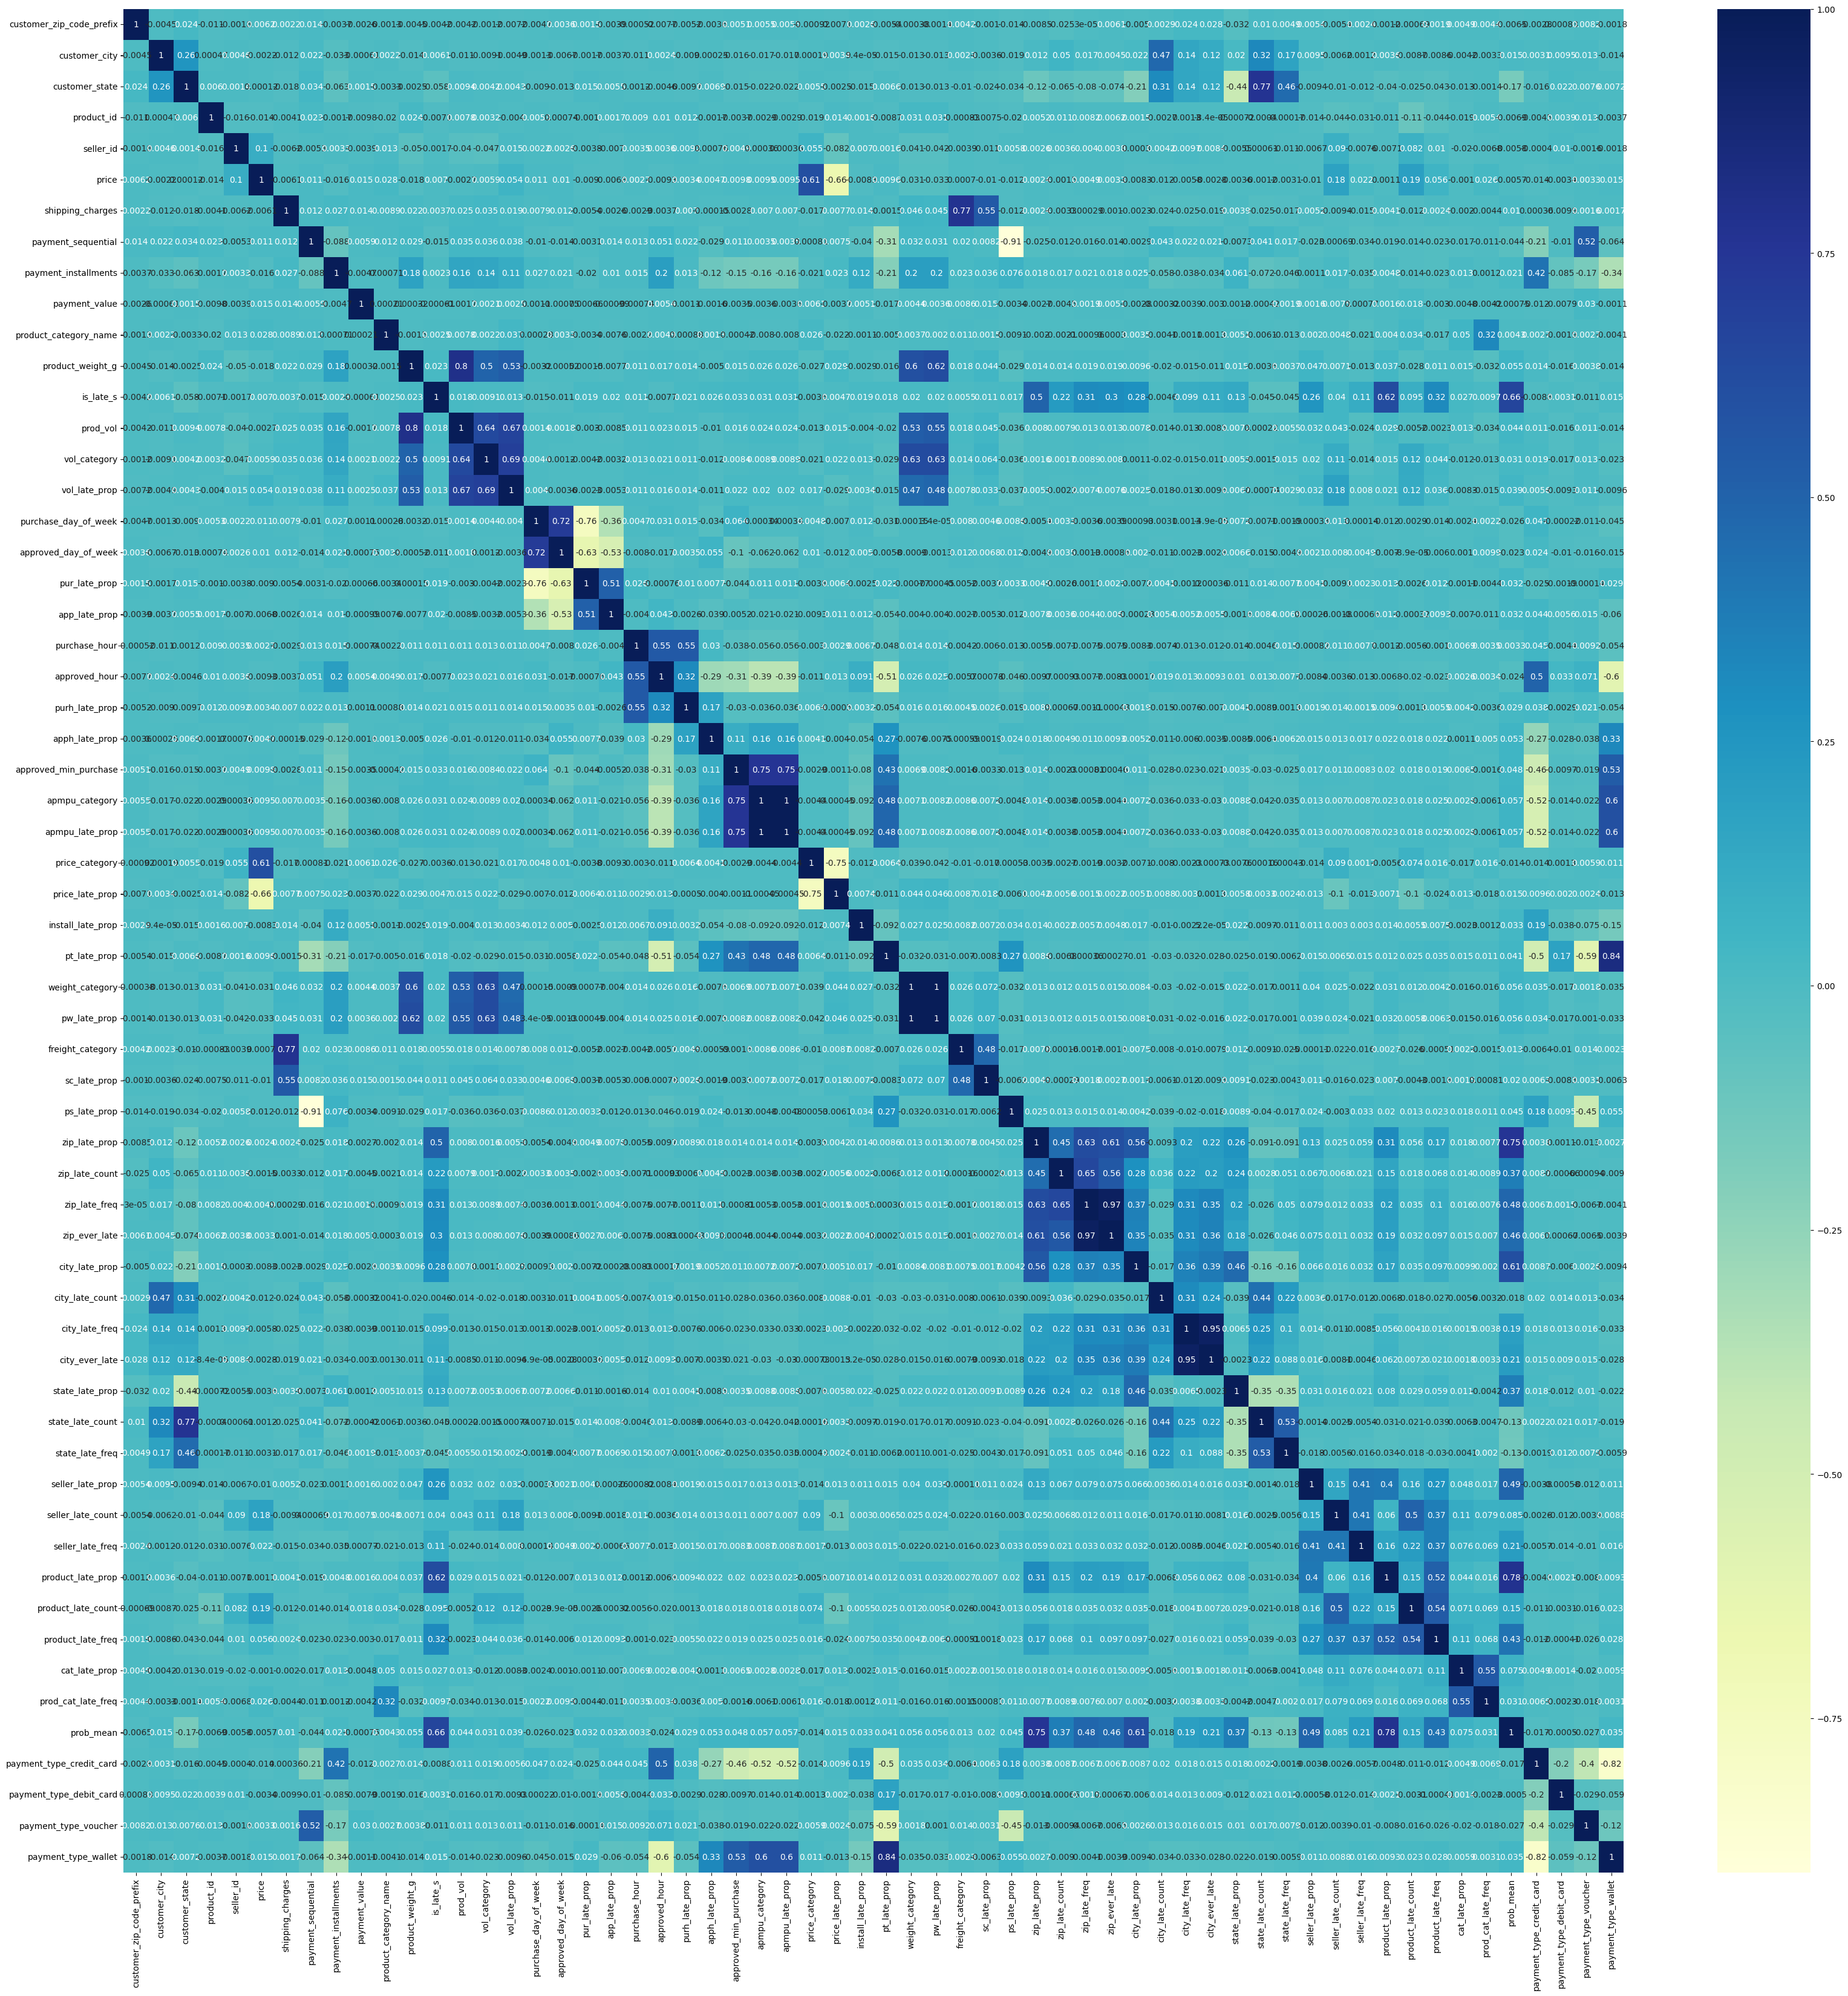

In [287]:
plt.figure(figsize=(40,40))
dataplot = sns.heatmap(roro.corr(), cmap="YlGnBu", annot=True)

In [288]:
# import numpy as np

# Create correlation matrix
corr_matrix = roro.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.5
to_use = [column for column in upper.columns if any(upper[column] > 0.5)]
to_use

['prod_vol',
 'vol_category',
 'vol_late_prop',
 'approved_day_of_week',
 'pur_late_prop',
 'app_late_prop',
 'approved_hour',
 'purh_late_prop',
 'apmpu_category',
 'apmpu_late_prop',
 'price_category',
 'price_late_prop',
 'pt_late_prop',
 'weight_category',
 'pw_late_prop',
 'freight_category',
 'sc_late_prop',
 'ps_late_prop',
 'zip_late_freq',
 'zip_ever_late',
 'city_late_prop',
 'city_ever_late',
 'state_late_count',
 'state_late_freq',
 'product_late_prop',
 'product_late_count',
 'product_late_freq',
 'prod_cat_late_freq',
 'prob_mean',
 'payment_type_credit_card',
 'payment_type_voucher',
 'payment_type_wallet']

In [289]:
X = fix_data.drop(['is_late_s', 'order_id'], axis=1)
y = fix_data['is_late_s']

In [290]:
X[X.select_dtypes(include=["category"]).columns] = X[X.select_dtypes(include=["category"]).columns].astype(int)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87418 entries, 0 to 89315
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_zip_code_prefix  87418 non-null  int64  
 1   customer_city             87418 non-null  int64  
 2   customer_state            87418 non-null  int64  
 3   product_id                87418 non-null  int64  
 4   seller_id                 87418 non-null  int64  
 5   price                     87418 non-null  float64
 6   shipping_charges          87418 non-null  float64
 7   payment_sequential        87418 non-null  int64  
 8   payment_installments      87418 non-null  int64  
 9   payment_value             87418 non-null  float64
 10  product_category_name     87418 non-null  int64  
 11  product_weight_g          87418 non-null  float64
 12  prod_vol                  87418 non-null  float64
 13  vol_category              87418 non-null  int64  
 14  vol_late_pr

In [291]:
X_br = X[to_use]
y_br = fix_data['is_late_s']

In [292]:
X_ts = fix_data2.drop(['order_id'], axis=1)

In [293]:
X_ts[X_ts.select_dtypes(include=["category"]).columns] = X_ts[X_ts.select_dtypes(include=["category"]).columns].astype(int)
X_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38279 entries, 0 to 38278
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_zip_code_prefix  38279 non-null  int64  
 1   customer_city             38279 non-null  int64  
 2   customer_state            38279 non-null  int64  
 3   product_id                38279 non-null  int64  
 4   seller_id                 38279 non-null  int64  
 5   price                     38279 non-null  float64
 6   shipping_charges          38279 non-null  float64
 7   payment_sequential        38279 non-null  int64  
 8   payment_installments      38279 non-null  int64  
 9   payment_value             38279 non-null  float64
 10  product_category_name     38279 non-null  int64  
 11  product_weight_g          38279 non-null  float64
 12  prod_vol                  38279 non-null  float64
 13  vol_category              38279 non-null  int64  
 14  vol_la

In [294]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_br, y_br, test_size=0.2, random_state=42)

print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (69934, 32)
Shape of X_test (17484, 32)
Shape of y_train (69934,)
Shape of y_test (17484,)


In [295]:
X_ts = X_ts[X_test.columns]
X_ts

prod_vol  vol_category  vol_late_prop  approved_day_of_week  \
0         880.0             0       0.076160                     5   
1        2058.0             0       0.076160                     5   
2       10000.0             1       0.074570                     1   
3       48000.0             2       0.083013                     4   
4       38080.0             2       0.083013                     1   
...         ...           ...            ...                   ...   
38274    4928.0             1       0.074570                     4   
38275    1452.0             0       0.076160                     5   
38276    3927.0             1       0.074570                     4   
38277   19872.0             2       0.083013                     3   
38278    1584.0             0       0.076160                     4   

       pur_late_prop  app_late_prop  approved_hour  purh_late_prop  \
0           0.069131       0.072244             12        0.081045   
1           0.069131       0.072244             20        0.075763   
2           0.087031       0.077687              7        0.072013   
3           0.076462       0.082739             10        0.068538   
4           0.069131       0.077687              4        0.068538   
...              ...            ...            ...             ...   
38274       0.076462       0.082739             12        0.072013   
38275       0.069131       0.072244             20        0.081226   
38276       0.073942       0.082739              3        0.075863   
38277       0.074620       0.068938              8        0.075863   
38278       0.076462       0.082739              9        0.074530   

       apmpu_category  apmpu_late_prop  price_category  price_late_prop  \
0                   0         0.072185               0         0.077597   
1                   0         0.072185               0         0.077597   
2                   2         0.091217               0         0.077597   
3                   0         0.072185               1         0.077921   
4                   2         0.091217               2         0.074933   
...               ...              ...             ...              ...   
38274               0         0.072185               1         0.077921   
38275               0         0.072185               1         0.077921   
38276               0         0.072185               1         0.077921   
38277               2         0.091217               1         0.077921   
38278               0         0.072185               2         0.074933   

       pt_late_prop  weight_category  pw_late_prop  freight_category  \
0          0.075673                0      0.069979                 1   
1          0.075673                0      0.069979                 0   
2          0.085233                1      0.076662                 2   
3          0.075673                2      0.084826                 2   
4          0.085233                2      0.084826                 0   
...             ...              ...           ...               ...   
38274      0.075673                0      0.069979                 1   
38275      0.075673                2      0.084826                 1   
38276      0.085233                1      0.076662                 1   
38277      0.075673                2      0.084826                 2   
38278      0.075673                0      0.069979                 1   

       sc_late_prop  ps_late_prop  zip_late_freq  zip_ever_late  \
0          0.074384      0.077578              0              0   
1          0.077701      0.077578              0              0   
2          0.081833      0.077578              0              0   
3          0.081833      0.077578              0              0   
4          0.077701      0.077578              2              1   
...             ...           ...            ...            ...   
38274      0.074384      0.077578              2              1   
38275      0.074384    

In [296]:
eval_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])
eval_df

Empty DataFrame
Columns: [Model, Accuracy, Precision, Recall, F1-Score, ROC-AUC]
Index: []

In [297]:
import pickle

In [298]:
# instantiate the model (using the default parameters)
lr = LogisticRegression(random_state=16)
# fit the model with data
lr.fit(X_train, y_train)
y_predLR = lr.predict(X_test)

model = 'Logistic Regression'
# classification report
report = classification_report(y_test, y_predLR)
print('Classification Report:\n', report)

# calculate and print model accuracy
lr_acc = accuracy_score(y_test, y_predLR)
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_predLR))

# calculate and print model precision
lr_prc = precision_score(y_test, y_predLR)
print("Logistic Regression Model Precision:", precision_score(y_test, y_predLR))

# calculate and print model recall
lr_rcl = recall_score(y_test, y_predLR)
print("Logistic Regression Model Recall:", recall_score(y_test, y_predLR))

# calculate and print model f1-score
lr_f1s = f1_score(y_test, y_predLR)
print("Logistic Regression Model F1-Score:", f1_score(y_test, y_predLR))

# calculate and print model roc-auc
lr_rau = roc_auc_score(y_test, y_predLR)
print("Logistic Regression Model ROC-AUC:", roc_auc_score(y_test, y_predLR))

new_eval = {'Model': model, 'Accuracy': lr_acc, 'Precision': lr_prc, 'Recall': lr_rcl, 'F1-Score': lr_f1s, 'ROC-AUC': lr_rau}
eval_df.loc[len(eval_df)] = new_eval

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     16172
           1       0.44      0.29      0.35      1312

    accuracy                           0.92     17484
   macro avg       0.69      0.63      0.65     17484
weighted avg       0.91      0.92      0.91     17484

Logistic Regression Model Accuracy: 0.9194120338595287
Logistic Regression Model Precision: 0.44287396937573614
Logistic Regression Model Recall: 0.2865853658536585
Logistic Regression Model F1-Score: 0.34798704303563166
Logistic Regression Model ROC-AUC: 0.6286686413735273


In [299]:
y_pred_lr = lr.predict(X_ts)
y_id = fix_data2[['order_id']]
label = pd.DataFrame(y_pred_lr, columns=['is_late'])
submissionLR = pd.concat([y_id, label], axis=1)
submissionLR.to_csv('./subsfix-LR.csv', index=False)

In [300]:
# saving model
Pkl_LR = "LR-dup-v2.pkl"

with open(Pkl_LR, 'wb') as file:
    pickle.dump(lr, file)

In [301]:
#Logistic Regression is perfomed above

In [302]:
#KNN


In [303]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_predKNN = knn.predict(X_test)

model = 'KNN'
# classification report
report = classification_report(y_test, y_predKNN)
print('Classification Report:\n', report)

# calculate and print model accuracy
knn_acc = accuracy_score(y_test, y_predKNN)
print("KNN Model Accuracy:", accuracy_score(y_test, y_predKNN))

# calculate and print model precision
knn_prc = precision_score(y_test, y_predKNN)
print("KNN Model Precision:", precision_score(y_test, y_predKNN))

# calculate and print model recall
knn_rcl = recall_score(y_test, y_predKNN)
print("KNN Model Recall:", recall_score(y_test, y_predKNN))

# calculate and print model f1-score
knn_f1s = f1_score(y_test, y_predKNN)
print("KNN Model F1-Score:", f1_score(y_test, y_predKNN))

# calculate and print model roc-auc
knn_rau = roc_auc_score(y_test, y_predKNN)
print("KNN Model ROC-AUC:", roc_auc_score(y_test, y_predKNN))

new_eval = {'Model': model, 'Accuracy': knn_acc, 'Precision': knn_prc, 'Recall': knn_rcl, 'F1-Score': knn_f1s, 'ROC-AUC': knn_rau}
eval_df.loc[len(eval_df)] = new_eval


Python(94213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     16172
           1       0.38      0.17      0.23      1312

    accuracy                           0.92     17484
   macro avg       0.66      0.57      0.59     17484
weighted avg       0.89      0.92      0.90     17484

KNN Model Accuracy: 0.9170670327156257
KNN Model Precision: 0.3793706293706294
KNN Model Recall: 0.16539634146341464
KNN Model F1-Score: 0.23036093418259024
KNN Model ROC-AUC: 0.5717224101578761


In [304]:
y_pred_knn = knn.predict(X_ts)
y_id = fix_data2[['order_id']]
label = pd.DataFrame(y_pred_knn, columns=['is_late'])
submissionKNN = pd.concat([y_id, label], axis=1)
submissionKNN.to_csv('./subsfix-KNN.csv', index=False)

In [305]:
# saving model
Pkl_KNN = "KNN-dup-v2.pkl"

with open(Pkl_KNN, 'wb') as file:
    pickle.dump(knn, file)

In [306]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_predDT = dt.predict(X_test)

model = 'Decision Tree'
# classification report
report = classification_report(y_test, y_predDT)
print('Classification Report:\n', report)

# calculate and print model accuracy
dt_acc = accuracy_score(y_test, y_predDT)
print("DT Model Accuracy:", accuracy_score(y_test, y_predDT))

# calculate and print model precision
dt_prc = precision_score(y_test, y_predDT)
print("DT Model Precision:", precision_score(y_test, y_predDT))

# calculate and print model recall
dt_rcl = recall_score(y_test, y_predDT)
print("DT Model Recall:", recall_score(y_test, y_predDT))

# calculate and print model f1-score
dt_f1s = f1_score(y_test, y_predDT)
print("DT Model F1-Score:", f1_score(y_test, y_predDT))

# calculate and print model roc-auc
dt_rau = roc_auc_score(y_test, y_predDT)
print("DT Model ROC-AUC:", roc_auc_score(y_test, y_predDT))

new_eval = {'Model': model, 'Accuracy': dt_acc, 'Precision': dt_prc, 'Recall': dt_rcl, 'F1-Score': dt_f1s, 'ROC-AUC': dt_rau}
eval_df.loc[len(eval_df)] = new_eval

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     16172
           1       0.64      0.68      0.66      1312

    accuracy                           0.95     17484
   macro avg       0.81      0.82      0.81     17484
weighted avg       0.95      0.95      0.95     17484

DT Model Accuracy: 0.9472660718371082
DT Model Precision: 0.6406926406926406
DT Model Recall: 0.676829268292683
DT Model F1-Score: 0.6582653817642699
DT Model ROC-AUC: 0.8230176517075584


In [307]:
y_pred_dt = dt.predict(X_ts)
y_id = fix_data2[['order_id']]
label = pd.DataFrame(y_pred_dt, columns=['is_late'])
submissionDT = pd.concat([y_id, label], axis=1)
submissionDT.to_csv('./subsfix-DT.csv', index=False)

In [308]:
Pkl_DT = "DT-dup-v2.pkl"

with open(Pkl_DT, 'wb') as file:
    pickle.dump(dt, file)

In [309]:
#XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_predXGB = xgb.predict(X_test)

model = 'XGBoost'
# classification report
report = classification_report(y_test, y_predXGB)
print('Classification Report:\n', report)

# calculate and print model accuracy
xgb_acc = accuracy_score(y_test, y_predXGB)
print("XGB Model Accuracy:", accuracy_score(y_test, y_predXGB))

# calculate and print model precision
xgb_prc = precision_score(y_test, y_predXGB)
print("XGB Model Precision:", precision_score(y_test, y_predXGB))

# calculate and print model recall
xgb_rcl = recall_score(y_test, y_predXGB)
print("XGB Model Recall:", recall_score(y_test, y_predXGB))

# calculate and print model f1-score
xgb_f1s = f1_score(y_test, y_predXGB)
print("XGB Model F1-Score:", f1_score(y_test, y_predXGB))

# calculate and print model roc-auc
xgb_rau = roc_auc_score(y_test, y_predXGB)
print("XGB Model ROC-AUC:", roc_auc_score(y_test, y_predXGB))

new_eval = {'Model': model, 'Accuracy': xgb_acc, 'Precision': xgb_prc, 'Recall': xgb_rcl, 'F1-Score': xgb_f1s, 'ROC-AUC': xgb_rau}
eval_df.loc[len(eval_df)] = new_eval

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     16172
           1       0.78      0.65      0.71      1312

    accuracy                           0.96     17484
   macro avg       0.88      0.82      0.84     17484
weighted avg       0.96      0.96      0.96     17484

XGB Model Accuracy: 0.9597918096545413
XGB Model Precision: 0.7801287948482061
XGB Model Recall: 0.6463414634146342
XGB Model F1-Score: 0.7069612338474365
XGB Model ROC-AUC: 0.815781416842118


In [310]:
y_pred_xgb = xgb.predict(X_ts)
y_id = fix_data2[['order_id']]
label = pd.DataFrame(y_pred_xgb, columns=['is_late'])
submissionXGB = pd.concat([y_id, label], axis=1)
submissionXGB.to_csv('./subsfix-XGB.csv', index=False)

In [311]:
# saving model
Pkl_XGB = "XGB-dup-v2.pkl"

with open(Pkl_XGB, 'wb') as file:
    pickle.dump(xgb, file)

In [312]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import pickle

# Initialize and fit the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions
y_predRF = rf.predict(X_test)

model = 'Random Forest'

# Classification report
report = classification_report(y_test, y_predRF)
print('Classification Report:\n', report)

# Calculate and print model accuracy
rf_acc = accuracy_score(y_test, y_predRF)
print("RF Model Accuracy:", rf_acc)

# Calculate and print model precision
rf_prc = precision_score(y_test, y_predRF)
print("RF Model Precision:", rf_prc)

# Calculate and print model recall
rf_rcl = recall_score(y_test, y_predRF)
print("RF Model Recall:", rf_rcl)

# Calculate and print model f1-score
rf_f1s = f1_score(y_test, y_predRF)
print("RF Model F1-Score:", rf_f1s)

# Calculate and print model roc-auc
rf_rau = roc_auc_score(y_test, y_predRF)
print("RF Model ROC-AUC:", rf_rau)

# Update evaluation DataFrame
new_eval = {
    'Model': model,
    'Accuracy': rf_acc,
    'Precision': rf_prc,
    'Recall': rf_rcl,
    'F1-Score': rf_f1s,
    'ROC-AUC': rf_rau
}
eval_df.loc[len(eval_df)] = new_eval

# Make predictions on test set for submission
y_pred_rf = rf.predict(X_ts)
y_id = fix_data2[['order_id']]
label = pd.DataFrame(y_pred_rf, columns=['is_late'])
submissionRF = pd.concat([y_id, label], axis=1)
submissionRF.to_csv('./subsfix-RF.csv', index=False)

# Save the model
Pkl_RF = "RF-dup-v2.pkl"
with open(Pkl_RF, 'wb') as file:
    pickle.dump(rf, file)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     16172
           1       0.82      0.65      0.73      1312

    accuracy                           0.96     17484
   macro avg       0.90      0.82      0.85     17484
weighted avg       0.96      0.96      0.96     17484

RF Model Accuracy: 0.9631663234957676
RF Model Precision: 0.8187022900763359
RF Model Recall: 0.6539634146341463
RF Model F1-Score: 0.7271186440677966
RF Model ROC-AUC: 0.8211073565874168


In [313]:
#Comparison 

In [314]:
eval_df.sort_values(by=['Accuracy'], ascending=False)


Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
4        Random Forest  0.963166   0.818702  0.653963  0.727119  0.821107
3              XGBoost  0.959792   0.780129  0.646341  0.706961  0.815781
2        Decision Tree  0.947266   0.640693  0.676829  0.658265  0.823018
0  Logistic Regression  0.919412   0.442874  0.286585  0.347987  0.628669
1                  KNN  0.917067   0.379371  0.165396  0.230361  0.571722

In [315]:
eval_df.to_csv('./evl-df.csv', index=False)


In [316]:
#KBest Feature
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                       Specs         Score
12                  prod_vol  1.017072e+06
11          product_weight_g  3.094869e+05
44          state_late_count  1.039110e+05
3                 product_id  2.473151e+04
36            zip_late_count  2.003079e+04
51         product_late_freq  1.479346e+04
37             zip_late_freq  1.214067e+04
49         product_late_prop  1.213847e+04
50        product_late_count  1.211606e+04
47         seller_late_count  7.577612e+03
35             zip_late_prop  4.966495e+03
38             zip_ever_late  4.185474e+03
23     approved_min_purchase  4.030643e+03
5                      price  3.932907e+03
0   customer_zip_code_prefix  3.855653e+03
1              customer_city  1.994856e+03
40           city_late_count  9.167132e+02
2             customer_state  7.748265e+02
39            city_late_prop  4.840378e+02
48          seller_late_freq  3.865825e+02


In [317]:
#Extra Tree Classifier 

[0.01215175 0.01048329 0.00838441 0.01137988 0.0113022  0.01145157
 0.01117881 0.00096125 0.0089838  0.01176963 0.00701389 0.01024751
 0.01039858 0.00688914 0.00674553 0.00950002 0.00958885 0.00956855
 0.0099823  0.01170166 0.01126809 0.01158182 0.011566   0.0079174
 0.00289606 0.00283475 0.00806961 0.00761815 0.00882102 0.00336892
 0.00672089 0.00669428 0.00779288 0.00789869 0.00089312 0.07291497
 0.01434943 0.04507129 0.03620582 0.01870986 0.01092391 0.00599666
 0.00243461 0.00973988 0.00854723 0.00450682 0.02049258 0.01176238
 0.00768072 0.16713488 0.02375361 0.07731911 0.00704925 0.00295174
 0.14827005 0.00312758 0.00122394 0.0014331  0.00277627]


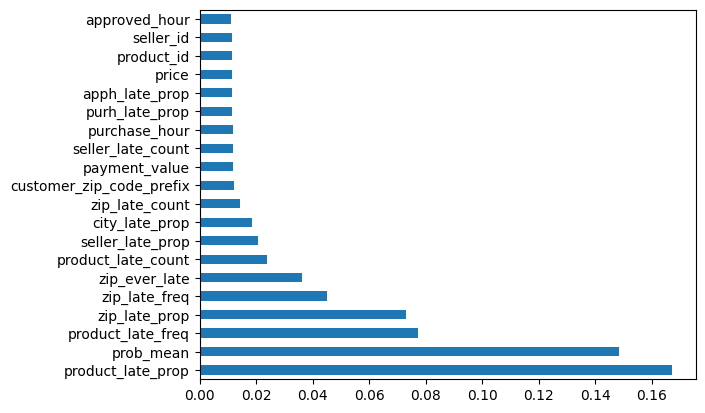

In [318]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()
